# Data mining projet 

Ce projet réalisé par:
OUBELKAS Fatima, 
EL AMRI Oualid,
LABAALLI Mahjouba

## Getting started



1.  ***L'importation des modules*** 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib
import missingno as msno #Missing data visualization module for Python
import datetime as dt


2. ***L'affichage du DataSet*** 



In [2]:
data = pd.read_csv('/content/sample_data/wandaloo_cars.csv')

In [3]:
data

Brand           Model        Version                           Price  \
0     MERCEDES   Classe C 2014          220 d                      228.000 DH   
1     MERCEDES   Classe C 2003        220 CDI                       79.000 DH   
2     MERCEDES   Classe B 2013    180 d Urban                      150.000 DH   
3     MERCEDES   Classe E 2006  Autre version                      135.000 DH   
4     MERCEDES  CLA Coupé 2014        220 CDI                      240.000 DH   
...        ...             ...            ...                             ...   
3124     VOLVO            XC90            NaN    630.000 DH *   * Prix public   
3125     VOLVO            XC90            NaN    730.000 DH *   * Prix public   
3126     VOLVO            XC90            NaN    850.000 DH *   * Prix public   
3127     VOLVO            XC90            NaN  1.000.000 DH *   * Prix public   
3128     VOLVO            XC90            NaN  1.100.000 DH *   * Prix public   

      Modèle     Main Kilométrage Carburant  Transmision Puissance fiscale  \
0     2014.0  Seconde  144.500 km    Diesel  Automatique              8 cv   
1     2003.0  Seconde  350.000 km    Diesel     Manuelle              8 cv   
2     2013.0  Seconde  144.000 km    Diesel     Manuelle              8 cv   
3     2006.0  Seconde  248.000 km    Diesel  Automatique              9 cv   
4     2014.0  Seconde  103.000 km    Diesel  Automatique              9 cv   
...      ...      ...         ...       ...          ...               ...   
3124     NaN      NaN         NaN       NaN          NaN              8 cv   
3125     NaN      NaN         NaN       NaN          NaN              8 cv   
3126     NaN      NaN         NaN       NaN          NaN              8 cv   
3127     NaN      NaN         NaN       NaN          NaN             11 cv   
3128     NaN      NaN         NaN       NaN          NaN             11 cv   

      ... Airbags  ABS  ESP Antipatinage Architecture  Cylindrée  \
0     ...     oui  oui  oui          oui          NaN        NaN   
1     ...     oui  oui  oui          oui          NaN        NaN   
2     ...     oui  oui  oui          oui          NaN        NaN   
3     ...     oui  oui  oui          oui          NaN        NaN   
4     ...     oui  oui  oui          oui          NaN        NaN   
...   ...     ...  ...  ...          ...          ...        ...   
3124  ...     7.0  oui  oui          oui  4 cylindres  1.969 cm³   
3125  ...     7.0  oui  oui          oui  4 cylindres  1.969 cm³   
3126  ...     7.0  oui  oui          oui  4 cylindres  1.969 cm³   
3127  ...     7.0  oui  oui          oui  4 cylindres  1.969 cm³   
3128  ...     7.0  oui  oui          oui  4 cylindres  1.969 cm³   

      Conso. ville  Conso. route Vitesse maxi. Volume du réservoir  
0              NaN           NaN           NaN                 NaN  
1              NaN           NaN           NaN                 NaN  
2              NaN           NaN           NaN                 NaN  
3              NaN           NaN           NaN                 NaN  
4              NaN           NaN           NaN                 NaN  
...            ...           ...           ...                 ...  
3124  6,3 l/100 km  5,4 l/100 km      220 km/h            71 litre  
3125  6,3 l/100 km  5,4 l/100 km      220 km/h            71 litre  
3126  6,3 l/100 km  5,4 l/100 km      220 km/h            71 litre  
3127    - l/100 km    - l/100 km      230 km/h            71 litre  
3128    - l/100 km    - l/100 km      230 km/h            71 litre  

[3129 rows x 43 columns]

**3**. **Les problèmes**

en examinant simplement les données, nous pouvons déjà diagnostiquer une série de problèmes  sur toute les lignes, tels que : 

*   ***Problème-1***: Le premier problème concerne l'attribut 'price', qui doit être exprimé en tant que nombre décimal (float), et les chaînes de caractères "DH Prix public" et "DH" doivent être supprimées.
*   ***Problème-2***: Le deuxième problème concerne l'attribut 'Modèle', qui doit être exprimé en tant que datetime (année).
*   ***Problème-3***: Le troisième problème concerne l'attribut 'Kilométrage', qui doit être exprimé en tant que nombre décimal (float) et la chaîne de caractères "km" doit être supprimée.
*   ***Problème-4***: Le quatrième problème concerne l'attribut 'Puissance fiscale', qui doit être exprimé en tant que nombre entier (integer) et la chaîne de caractères "cv" doit être supprimée.
*   ***Problème-5***: Le cinquième problème concerne les attributs 'Model' et 'Modèle', qui contiennent des informations redondantes telles que l'année. Il convient donc de supprimer le mot "Classe" ainsi que l'année dans la colonne 'Modèle'.
*   ***Problème-6***: Il y'a plusieurs colonnes contiennent des valeurs nulles.





In [4]:
# affichant l'entite de notre data
data.head()

Brand           Model        Version       Price  Modèle     Main  \
0  MERCEDES   Classe C 2014          220 d  228.000 DH  2014.0  Seconde   
1  MERCEDES   Classe C 2003        220 CDI   79.000 DH  2003.0  Seconde   
2  MERCEDES   Classe B 2013    180 d Urban  150.000 DH  2013.0  Seconde   
3  MERCEDES   Classe E 2006  Autre version  135.000 DH  2006.0  Seconde   
4  MERCEDES  CLA Coupé 2014        220 CDI  240.000 DH  2014.0  Seconde   

  Kilométrage Carburant  Transmision Puissance fiscale  ... Airbags  ABS  ESP  \
0  144.500 km    Diesel  Automatique              8 cv  ...     oui  oui  oui   
1  350.000 km    Diesel     Manuelle              8 cv  ...     oui  oui  oui   
2  144.000 km    Diesel     Manuelle              8 cv  ...     oui  oui  oui   
3  248.000 km    Diesel  Automatique              9 cv  ...     oui  oui  oui   
4  103.000 km    Diesel  Automatique              9 cv  ...     oui  oui  oui   

  Antipatinage Architecture Cylindrée Conso. ville Conso. route Vitesse maxi.  \
0          oui          NaN       NaN          NaN          NaN           NaN   
1          oui          NaN       NaN          NaN          NaN           NaN   
2          oui          NaN       NaN          NaN          NaN           NaN   
3          oui          NaN       NaN          NaN          NaN           NaN   
4          oui          NaN       NaN          NaN          NaN           NaN   

  Volume du réservoir  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 43 columns]

In [5]:
# affichant les types de notre données
data.dtypes

Brand                                    object
Model                                    object
Version                                  object
Price                                    object
Modèle                                  float64
Main                                     object
Kilométrage                              object
Carburant                                object
Transmision                              object
Puissance fiscale                        object
Couleur extérieure                       object
Etat du véhicule                         object
Climatisation                            object
Vitres électriques                       object
Sièges électriques                       object
Ordinateur de bord                       object
Start & Stop                             object
Régulateur de vitesse                    object
Allumage auto. des feux                  object
Détecteur de pluie                       object
Commandes au volant                     

L'impression des types de données confirme que les coordonnées et le prix doivent être convertis en nombres flottants, et que les colonnes de date doivent être converties en format datetime (problèmes 1, 2, 3 et 4).

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Brand                                 3063 non-null   object 
 1   Model                                 3063 non-null   object 
 2   Version                               2180 non-null   object 
 3   Price                                 3063 non-null   object 
 4   Modèle                                2180 non-null   float64
 5   Main                                  2180 non-null   object 
 6   Kilométrage                           2180 non-null   object 
 7   Carburant                             2166 non-null   object 
 8   Transmision                           2180 non-null   object 
 9   Puissance fiscale                     3048 non-null   object 
 10  Couleur extérieure                    2180 non-null   object 
 11  Etat du véhicule 

Il est observé que toutes les colonnes contiennent des valeurs nulles, ce qui confirme la présence de données manquantes signalée précédemment. (**Problème 6**)

In [7]:
# récuperant le nombre des vatleurs monquées
data.isna().sum()

Brand                                     66
Model                                     66
Version                                  949
Price                                     66
Modèle                                   949
Main                                     949
Kilométrage                              949
Carburant                                963
Transmision                              949
Puissance fiscale                         81
Couleur extérieure                       949
Etat du véhicule                         949
Climatisation                             81
Vitres électriques                        81
Sièges électriques                       101
Ordinateur de bord                        81
Start & Stop                              81
Régulateur de vitesse                     81
Allumage auto. des feux                   81
Détecteur de pluie                        81
Commandes au volant                       81
Ecran tactile                             81
Rétroviseu

Tout d'abord, nous avons beaucoup de données manquantes, environ 2284/3129 = 0.73 = 73% des données n'ont pas de valeur pour de nombreuses colonnes.

Il existe plusieurs façons de traiter les données manquantes qui dépendent du type de manque ainsi que des hypothèses métier derrière nos données. 

Voici nos options :

    

*   Supprimer les données manquantes (si la suppression de ces données n'affecte pas ou ne biaise pas nos données) 
*   Définir les valeurs manquantes et les remplacer par des mesures statistiques (médiane, moyenne, mode...)
*    Remplacer les valeurs manquantes en se basant sur les hypothèses métier de nos données."

In [8]:
data.describe()

Modèle
count  2180.000000
mean   2012.002294
std       5.407446
min    1984.000000
25%    2009.000000
50%    2013.000000
75%    2016.000000
max    2022.000000

La méthode de description n'est pas significative à ce niveau de nettoyage, car il n'y a pas de caractéristiques numériques. Cette caractéristique est censée être une colonne datetime.



## Data Cleaning

###### Notre choses à faire



1️⃣ Tâche 1 : Problèmes de type de données : Retirer "DH" et "DH Prix public" du prix et le convertir en nombre flottant et le même chose pour la puissanse fiscale.

2️⃣ Tâche 2 : Supprimer les colonnes ayant un taux élevé de valeurs manquantes

3️⃣ Tâche 3 : Supprimer les lignes sans données ou celles qui sont répétées

4️⃣ Tâche 4 : Remplir certaines valeurs manquantes telles que "Modèle" pour les voitures neuves et "Kilomètrage = Millieage"...





###### Problèmes de type de données :


**1)** **Convertir l'attribut 'Price'  en nombre flottant**  </br>
Pour ce faire nous allons afficher tous les valeurs que la colone Price peut contenir pour les retirer 



In [9]:
data['Price'].unique()

array(['228.000 DH', '79.000 DH', '150.000 DH', ...,
       '730.000 DH *   * Prix public', '1.000.000 DH *   * Prix public',
       '1.100.000 DH *   * Prix public'], dtype=object)

Il est clair qu'il faut retirer 'DH', 'Prix public', 'DH *   * Prix public', 'DH VENDUE', 'DH * promo'

In [10]:
data['Price'] = data['Price'].str.strip("DH")
data['Price'] = data['Price'].str.strip("DH *   * Prix public")
data['Price'] = data['Price'].str.strip("DH VENDUE")
data['Price'] = data['Price'].str.strip("DH * promo")


En constatons que le problème ne sera pas resolu a cause d'existence des points . 
</br> 


In [11]:
data['Price'] = data['Price'].str.replace(".","")

<ipython-input-11-667c3a454ce1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace(".","")


In [12]:
data['Price'] = data['Price'].astype('float')

In [13]:
data['Price']

0        228000.0
1         79000.0
2        150000.0
3        135000.0
4        240000.0
          ...    
3124     630000.0
3125     730000.0
3126     850000.0
3127    1000000.0
3128    1100000.0
Name: Price, Length: 3129, dtype: float64

**2)  Convertir l'attribut Puissance fiscale**




In [14]:
data["Puissance fiscale"]

0        8 cv
1        8 cv
2        8 cv
3        9 cv
4        9 cv
        ...  
3124     8 cv
3125     8 cv
3126     8 cv
3127    11 cv
3128    11 cv
Name: Puissance fiscale, Length: 3129, dtype: object

In [15]:
data["Puissance fiscale"].unique()

array(['8 cv', '9 cv', '6 cv', '12 cv', '11 cv', '10 cv', '7 cv', '13 cv',
       nan, '-', '17 cv', '4 cv', '5 cv', '06 cv', '14 cv', '2 cv',
       '85 cv', '1 cv', '07 cv', '95 cv', '75 cv', '73 cv', '- cv',
       '16 cv', '21 cv', '47 cv', '15 cv', '23 cv', '22 cv', '26 cv',
       '29 cv', '70 cv', '81 cv', '3 cv', '19 cv', '18 cv', '08 cv',
       '24 cv', '25 cv', 'cv', '20 cv', '37 cv', '27 cv'], dtype=object)

* Remplaçant les valeurs ' - cv', 'cv', '-', '- ' et '' par '7 cv'

In [16]:
# remplaçant "-", "cv" et "- cv" par  7 cv
def ConvertPuissance(puissance):
    if puissance=="- cv" or puissance=="-" or puissance=="- " or puissance=="cv" or puissance=="":
        return "7 cv"
    else: 
        return puissance
data.loc[data["Puissance fiscale"].notnull(), 'Puissance fiscale']=data["Puissance fiscale"].apply(ConvertPuissance)


- Ecrasant la valeur cv 

In [17]:
data['Puissance fiscale'] = data['Puissance fiscale'].str.strip("cv")

- Convertant le type de cet attribut en float

In [18]:
data['Puissance fiscale'] = data['Puissance fiscale'].astype('float')

###### La supprission des colonnes ayant un taux élevé de valeurs manquantes:

***L'affichage des valeurs manquantes***

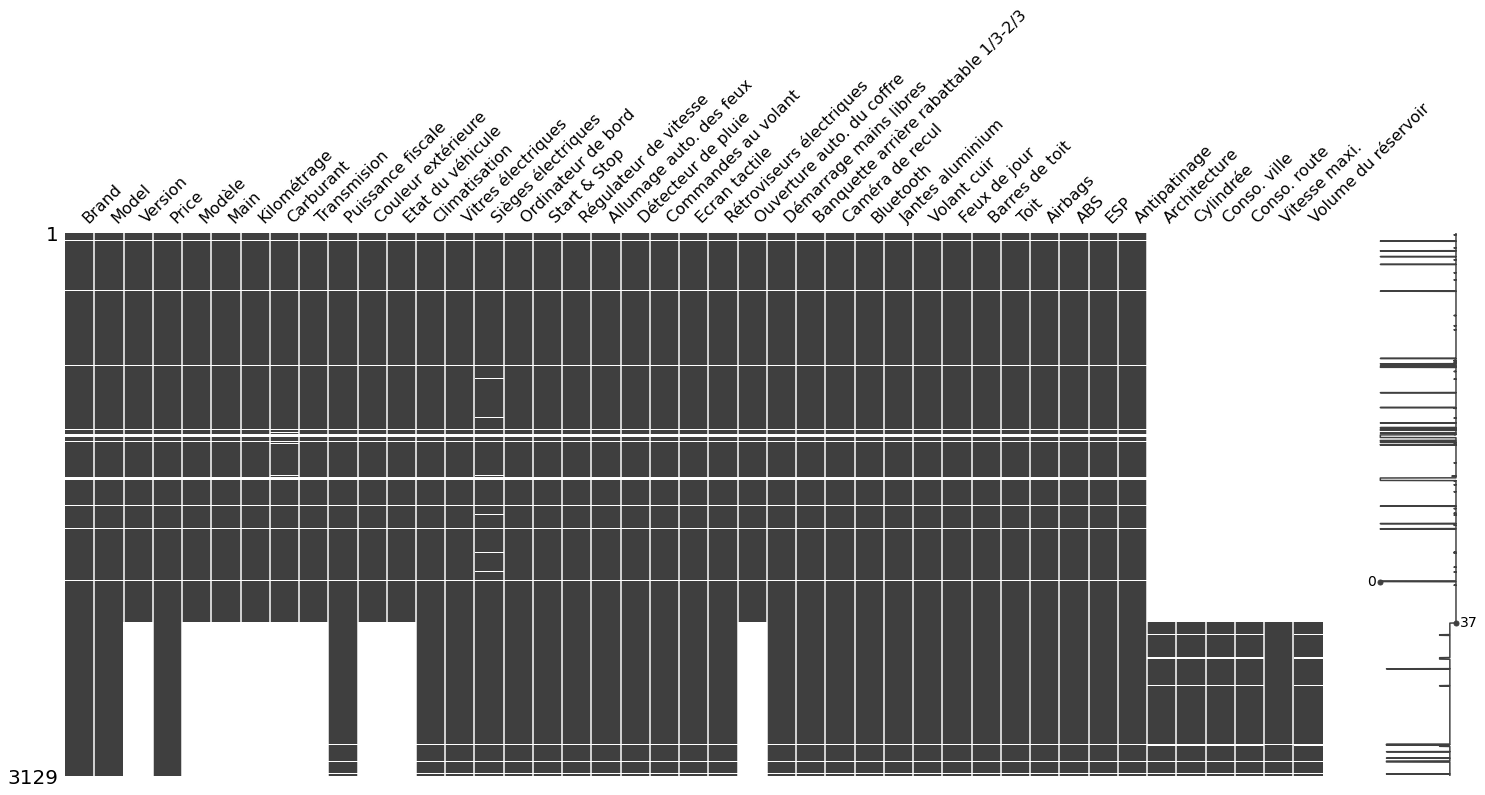

In [19]:
msno.matrix(data)
plt.show()

***La supprission les colonns ayant des valeurs manquantes***

Nous avons choisi de supprimer les colonnes **Architecture, Cylindrée, Conso. ville, Conso. route, Vitesse maxi. et Volume du réservoir** car elles ne sont disponibles pas pour toutes les voitures. Si nous les définissons à 0 pour d'autres voitures, cela perturberait l'apprentissage automatique car les ces voitures ont également ces caractéristiques en réalité. Il est donc préférable de les supprimer.

Pour effectuer cette tâche, nous utiliserons la méthode suivante 
**.df.drop()**  qui prend le nom de la colonne/la liste de colonnes à supprimer et les supprime.

Commençons par obtenir les noms et les valeurs des colonnes : "

In [20]:
list(data.columns)

['Brand',
 'Model',
 'Version',
 'Price',
 'Modèle',
 'Main',
 'Kilométrage',
 'Carburant',
 'Transmision',
 'Puissance fiscale',
 'Couleur extérieure',
 'Etat du véhicule',
 'Climatisation',
 'Vitres électriques',
 'Sièges électriques',
 'Ordinateur de bord',
 'Start & Stop',
 'Régulateur de vitesse',
 'Allumage auto. des feux',
 'Détecteur de pluie',
 'Commandes au volant',
 'Ecran tactile',
 'Rétroviseurs électriques',
 'Ouverture auto. du coffre',
 'Démarrage mains libres',
 'Banquette arrière rabattable 1/3-2/3',
 'Caméra de recul',
 'Bluetooth',
 'Jantes aluminium',
 'Volant cuir',
 'Feux de jour',
 'Barres de toit',
 'Toit',
 'Airbags',
 'ABS',
 'ESP',
 'Antipatinage',
 'Architecture',
 'Cylindrée',
 'Conso. ville',
 'Conso. route',
 'Vitesse maxi.',
 'Volume du réservoir']

In [21]:
# Obtenir les noms des colonnes dont le ratio de NaN/total est supérieur à 70% 
columns_to_drop = data.columns[data.isna().sum()>(0.70*len(data))]
print("{} colonnes à supprimer:\n".format(len(list(columns_to_drop))),list(columns_to_drop))

6 colonnes à supprimer:
 ['Architecture', 'Cylindrée', 'Conso. ville', 'Conso. route', 'Vitesse maxi.', 'Volume du réservoir']


In [22]:
# La supprission des colonnes
data.drop(columns_to_drop, axis = 1, inplace = True)

# Vérifiant la forme de notre nouveau DataFrame
data.shape

(3129, 37)

###### La supprission des lignes contenant des NaN et les doublons :

***L'affichage des lignes vides***

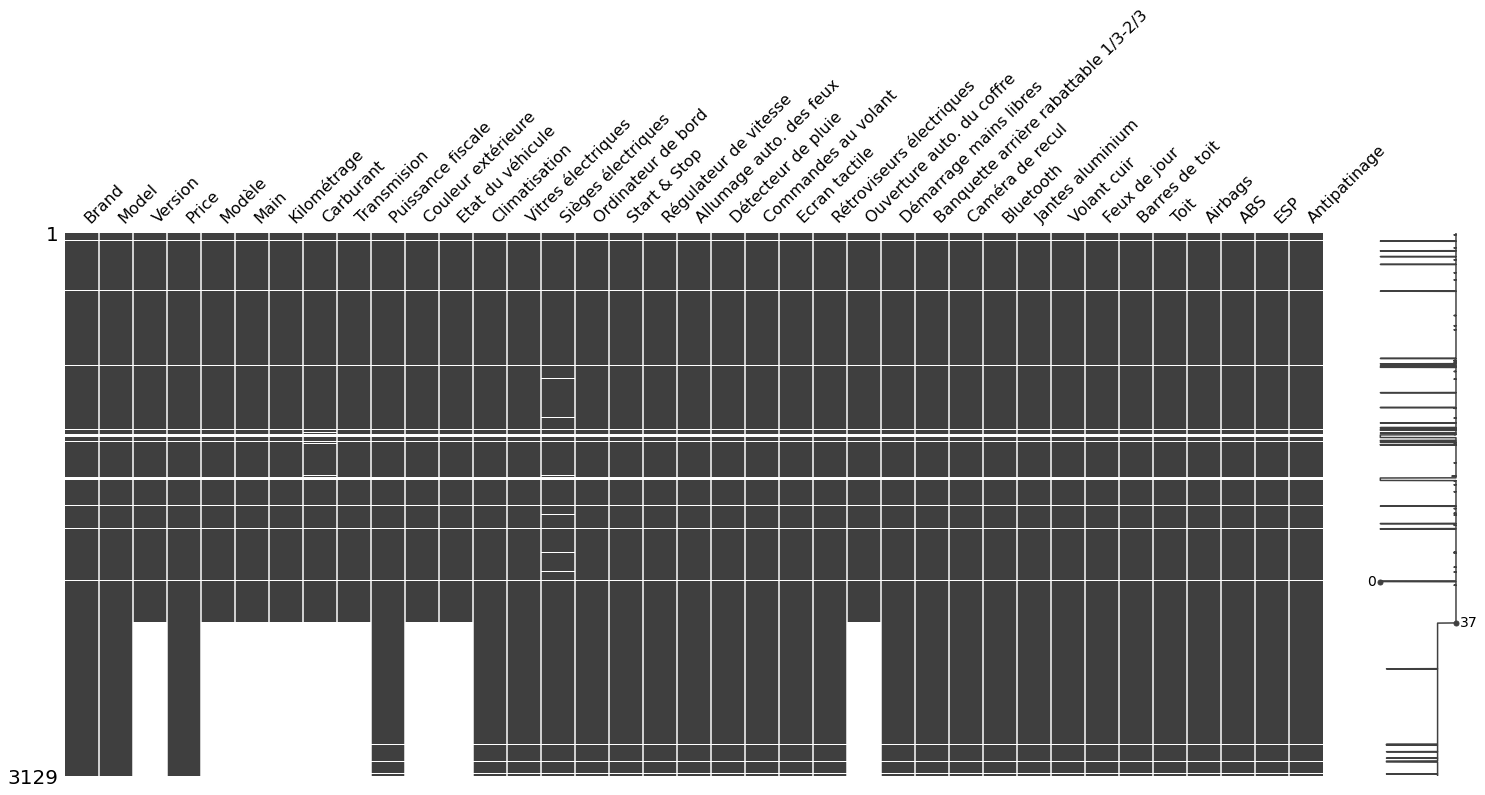

In [23]:
msno.matrix(data)
plt.show()

***La supprission des lignes vides et les lignes dupliquées***



In [24]:
# supprimant les lignes vides
data.dropna(how='all',inplace=True)
# supprimant les ligne dupliquées
data.drop_duplicates(inplace=True)
# récupérant les forme de notre nouveau DataFrame
data.shape

(3036, 37)

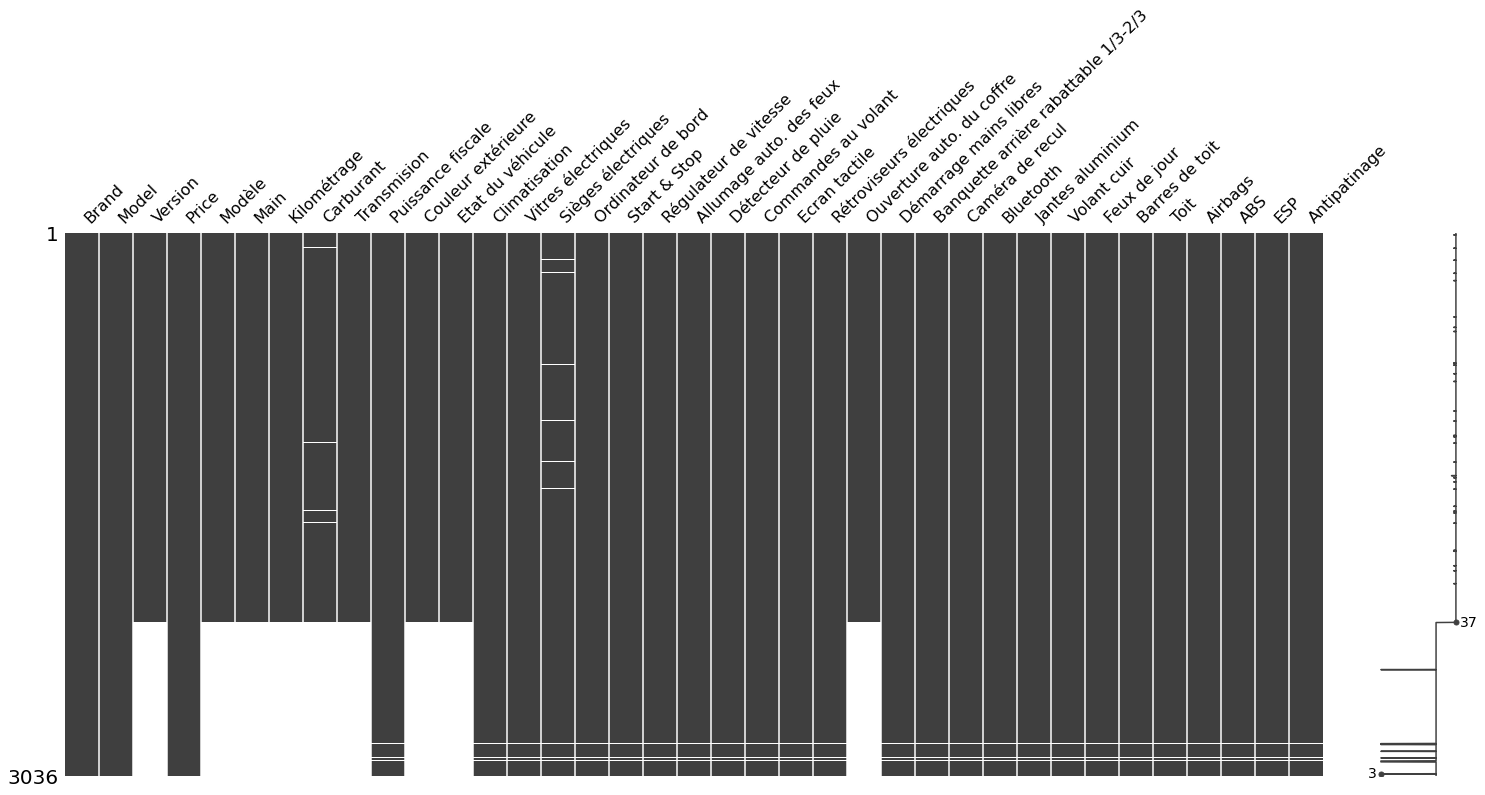

In [25]:
# affichant de nouveau de notre data en utlisant msno
msno.matrix(data)
plt.show()

###### Le remplissages des autres valeurs manquées

***La récupération de nombres autres valeurs manquées***

Nous affichons de nouveau les colonnes qui ont des valeurs manquées.

In [26]:
data.isna().sum()

Brand                                     0
Model                                     0
Version                                 860
Price                                     0
Modèle                                  860
Main                                    860
Kilométrage                             860
Carburant                               874
Transmision                             860
Puissance fiscale                        15
Couleur extérieure                      860
Etat du véhicule                        860
Climatisation                            15
Vitres électriques                       15
Sièges électriques                       35
Ordinateur de bord                       15
Start & Stop                             15
Régulateur de vitesse                    15
Allumage auto. des feux                  15
Détecteur de pluie                       15
Commandes au volant                      15
Ecran tactile                            15
Rétroviseurs électriques        

Il est observé que certaines colonnes présentent plus de 800 valeurs manquées. En tentant tout d'abord de récupérer les noms de ces colonnes.

In [27]:
# Obtenir les noms des colonnes dont le ratio de NaN/total est supérieur à 20% 
columns_to_fill = data.columns[data.isna().sum()>(0.20*len(data))]
print("{} colonnes à remplir:\n".format(len(list(columns_to_fill))),list(columns_to_fill))

9 colonnes à remplir:
 ['Version', 'Modèle', 'Main', 'Kilométrage', 'Carburant', 'Transmision', 'Couleur extérieure', 'Etat du véhicule', 'Ouverture auto. du coffre']


***Analyse et remplissage de ces données***

Eassayant de comprendre le DataFrame avec des valeurs manquées dans les attributs 'Version', 'Modèle', 'Main', 'Kilométrage', 'Carburant', 'Transmision', 'Couleur extérieure', 'Etat du véhicule' et 'Ouverture auto. du coffre'.




1.   Gérer la fonctionnalité de la version de la voiture (**Version**).

---



In [28]:
# affichant le nombre des valeurs manquantes pour cet attribut
data['Version'].isna().sum()

860

In [29]:
# récupérant les valeurs pour cet attribut est leurs fréquence
data['Version'].value_counts()

Autre version                  372
1.7 CDTi Cosmo                  32
1.5 dCi Authentique             27
220 CDI                         24
1.6 HDi Active                  16
                              ... 
1.6 dCi L2H1                     1
1.5 dCi Exception                1
1.5 dCi Privilege                1
1.5 dCi Storm                    1
2.0 D4 190 Momentum Confort      1
Name: Version, Length: 733, dtype: int64

Il a été remarqué que certaines voitures peuvent avoir **"Autre version"** comme valeur pour l'attribut **"Version"**. Dans ce cas, il est possible de remplir les valeurs manquantes de cette colonne par la valeur **"Autre version"**. En plus, la valeur **"Autre version"** est la valeurs la plus fréquante dans ce cas.

In [30]:
# remplaçant les valeurs manquantes par "Autre version" la valeur la plus fréquante
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data['Version'] = imputer.fit_transform(data['Version'].to_numpy().reshape(-1,1))
# affichant le nouveau nombre des valeurs manquantes pour cet attribut
data['Version'].isna().sum()

0

In [31]:
# récupérant de nouveau les valeurs pour cet attribut est leurs fréquence
data['Version'].value_counts()

Autre version                  1232
1.7 CDTi Cosmo                   32
1.5 dCi Authentique              27
220 CDI                          24
1.6 HDi Active                   16
                               ... 
1.6 dCi L2H1                      1
1.5 dCi Exception                 1
1.5 dCi Privilege                 1
1.5 dCi Storm                     1
2.0 D4 190 Momentum Confort       1
Name: Version, Length: 733, dtype: int64



2.   Gérer la fonctionnalité du modèle de la voiture (**Modèle**).

---

On constate d'après l'affichage de notre data en utlisant msno que si le Modèle , le Kilométrage et le Main ont manquées pour les même voitures alors nous pouvons déduire que ces voitures sont neuves. Et pour cela le modèle de ses voiture soit être plutôt 2022.


In [32]:
# affichant le nombre des valeurs manquantes pour cet attribut
data['Modèle'].isna().sum()

860

In [33]:
# récupérant les valeurs pour cet attribut est leurs fréquence
data['Modèle'].value_counts()

2018.0    188
2012.0    186
2017.0    174
2016.0    172
2013.0    166
2014.0    164
2015.0    155
2010.0    143
2011.0    131
2009.0    103
2008.0     99
2007.0     73
2006.0     72
2019.0     47
2020.0     44
2005.0     35
2003.0     35
2002.0     34
2004.0     28
2001.0     24
2021.0     23
2000.0     20
1997.0     13
1999.0     10
1998.0      9
1996.0      7
1993.0      5
1995.0      4
1984.0      2
1991.0      2
1992.0      2
1990.0      2
1988.0      1
1987.0      1
1986.0      1
2022.0      1
Name: Modèle, dtype: int64

In [34]:
# récupérant le type de l'attribut "Modèle"
dict(data.dtypes)['Modèle']

dtype('float64')

In [35]:
# en conservant uniquement l'année
data.loc[:, 'Modèle']=data["Modèle"].apply(lambda x: str(x).split(".")[0])

# Convertir le type du 'Modèle' en Datetime
data['Modèle'] = pd.to_datetime(data['Modèle'], format="%Y-%m-%d")

# vérifiant le type de l'attribut "Modèle"
dict(data.dtypes)['Modèle']

dtype('<M8[ns]')

In [36]:
data['Modèle'] = data['Modèle'].fillna(pd.to_datetime("2022-01-01"))

In [37]:
data['Modèle'].value_counts()

2022-01-01    861
2018-01-01    188
2012-01-01    186
2017-01-01    174
2016-01-01    172
2013-01-01    166
2014-01-01    164
2015-01-01    155
2010-01-01    143
2011-01-01    131
2009-01-01    103
2008-01-01     99
2007-01-01     73
2006-01-01     72
2019-01-01     47
2020-01-01     44
2003-01-01     35
2005-01-01     35
2002-01-01     34
2004-01-01     28
2001-01-01     24
2021-01-01     23
2000-01-01     20
1997-01-01     13
1999-01-01     10
1998-01-01      9
1996-01-01      7
1993-01-01      5
1995-01-01      4
1990-01-01      2
1991-01-01      2
1992-01-01      2
1984-01-01      2
1987-01-01      1
1986-01-01      1
1988-01-01      1
Name: Modèle, dtype: int64


3.   Gérer la fonctionnalité de l'attribut (**Main**).

---

Le **Main** attribut représente l'utilisation, est-ce que la voiture a été utilisée par une personne, deux ou trois...

In [38]:
# affichant le nombre des valeurs manquantes pour cet attribut
data['Main'].isna().sum()

860

In [39]:
# récupérant les valeurs pour cet attribut est leurs fréquence
data['Main'].value_counts()

Seconde     1125
Première    1051
Name: Main, dtype: int64

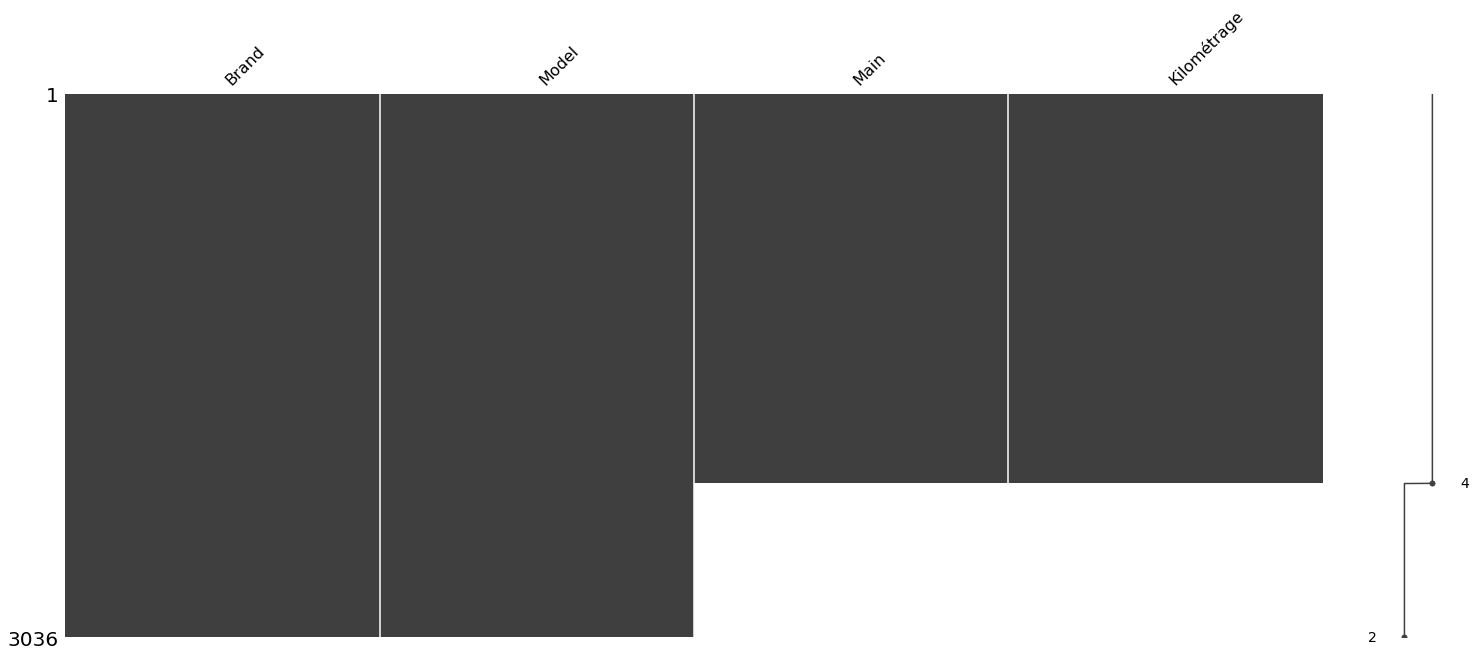

In [40]:
# visulisant les valeurs manquées triées par le "Kilométrage"
msno.matrix(data[['Brand','Model','Main','Kilométrage']].sort_values(by = 'Kilométrage'))
plt.show()

Nous pouvons constater que les lignes sans kilométrage n'ont pas de valeur dans la colonne "Main", ce qui signifie qu'elles sont neuves. Nous allons donc remplir les valeurs manquantes avec **"Nouveau"**.

In [41]:
# Remplir les valeurs manquantes ave "Nouveau".
data.Main.fillna("Nouveau", inplace=True)

In [42]:
# récupérant de nouveau les valeurs pour cet attribut est leurs fréquence
data['Main'].value_counts()

Seconde     1125
Première    1051
Nouveau      860
Name: Main, dtype: int64


4.   Gérer la fonctionnalité de l'attribut (**Kilométrage**).

---

Le Kilométrage (Milleage) représente le nombre de kilomètres parcourus par la voiture.

In [43]:
# affichant le nombre des valeurs manquantes pour cet attribut
data['Kilométrage'].isna().sum()

860

In [44]:
# récupérant les valeurs pour cet attribut est leurs fréquence
data['Kilométrage'].value_counts()

200.000 km    46
150.000 km    44
100.000 km    39
140.000 km    36
300.000 km    31
              ..
44.300 km      1
198.900 km     1
81.985 km      1
89.500 km      1
100.100 km     1
Name: Kilométrage, Length: 632, dtype: int64

Lorsque les valeurs de l'attribut "Kilométrage" sont manquantes, nous considérons qu'elles ont une valeur de 0. En d'autres termes, les voitures ayant une valeur de Kilométrage égale à 0 sont considérées comme neuves.

In [45]:
# remplir les valeurs manquantes avec une valeur de 0
data.Kilométrage.fillna(0, inplace=True)
# compter les valeurs nulles après avoir rempli les valeurs manquantes
data['Kilométrage'].isna().sum()

0

In [46]:
# vérifier le type de cette fonctionnalité ; elle doit être de type float
dict(data.dtypes)['Kilométrage']

dtype('O')

Alors, nous avons besoin de convertir le type d'attribut **Kilométrage** en float.

In [47]:
def ConvertKilométrage(Kilométrage):
    Kilo=str(Kilométrage).split()[0] ## en retirant les lettres "km" et en conservant seulement la valeur numérique.
    Kilo=Kilo.replace(".","") ## en remplaçant le point "." par une chaîne vide ""
    return int(Kilo)

# en appliquant cette fonction à l'attribut "Kilométrage".
data.loc[data["Kilométrage"].notnull(), 'Kilométrage']=data["Kilométrage"].apply(ConvertKilométrage)

# revérifier le type de cet attribut
dict(data.dtypes)['Kilométrage']

dtype('int64')

In [48]:
# convertir le type de Kilométrage en float
data['Kilométrage'] = data['Kilométrage'].astype(float)

dict(data.dtypes)['Kilométrage']

dtype('float64')

5.   Gérer la fonctionnalité de l'attribut (**Carburant**).

---

Le carburant représente le type de carburant utilisé, diesel, essence ou hybride.

In [49]:
# affichant le nombre des valeurs manquantes pour cet attribut
data['Carburant'].isna().sum()

874

In [50]:
# récupérant les valeurs pour cet attribut est leurs fréquence
data['Carburant'].value_counts()

Diesel        1898
Essence        256
Hybride          7
Electrique       1
Name: Carburant, dtype: int64

Nous allons remplacer les valeurs manquantes de cet attribut par la valeur la plus courante.

In [51]:
# remplaçant les valeurs manquantes par la valeur la plus fréquante
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data['Carburant'] = imputer.fit_transform(data['Carburant'].to_numpy().reshape(-1,1))
# affichant le nouveau nombre des valeurs manquantes pour cet attribut
data['Carburant'].isna().sum()

0

6.   Gérer la fonctionnalité de l'attribut (**Transmision**).

---

La transmission peut être manuelle, semi-automatique ou automatique.

In [52]:
# affichant le nombre des valeurs manquantes pour cet attribut
data['Transmision'].isna().sum()

860

In [53]:
# récupérant les valeurs pour cet attribut est leurs fréquence
data['Transmision'].value_counts()

Manuelle       1145
Automatique    1031
Name: Transmision, dtype: int64

Nous allons supprimer également cet attribut.

In [54]:
# la supprission de la colonne "Transmision"
data.drop('Transmision', axis = 1, inplace = True)

7.   Gérer la fonctionnalité de l'attribut (**Couleur extérieure**).

---

In [55]:
# affichant le nombre des valeurs manquantes pour cet attribut
data['Couleur extérieure'].isna().sum()

860

In [56]:
# récupérant les valeurs pour cet attribut est leurs fréquence
data['Couleur extérieure'].value_counts()

Noir             617
Blanc            279
Gris foncé       224
Gris             221
-                217
Gris clair       155
Bleu foncé        87
Autre couleur     67
Marron            50
Bleu              49
Rouge             47
Beige             31
Blanc cassé       24
Bleu ciel         23
Bordeau           21
Marron clair      17
Vert foncé        13
Jaune d'or        10
Violet             9
Vert               9
Orange             2
Jaune              2
Rose               2
Name: Couleur extérieure, dtype: int64

En ce qui concerne cet attribut, il est possible de remplacer les valeurs manquantes par **"Noir"** puisqu'elle est la couleur la plus fréquante.
Nous pouvons également changer la valeur **"-"** par **"Autre couleur"**.

In [57]:
# remplacer les valeurs manquantes par les couleurs les plus fréquentes.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data['Couleur extérieure'] = imputer.fit_transform(data['Couleur extérieure'].to_numpy().reshape(-1,1))
# affichant de nouveau le nombre des valeurs manquantes pour cet attribut
data['Couleur extérieure'].isna().sum()

0

Remplaçons maintenant les voitures sans fonctionnalité de couleur par la valeur "Autre couleur" en tant que fonctionnalité.

In [58]:
def FillColor(color):
    if color=="-":
        return "Autre Couleur"
    else:
        return color

data.loc[data["Couleur extérieure"].notnull(), 'Couleur extérieure']=data["Couleur extérieure"].apply(FillColor)

# récupérant de nouveau les valeurs pour cet attribut est leurs fréquence
data['Couleur extérieure'].value_counts()

Noir             1477
Blanc             279
Gris foncé        224
Gris              221
Autre Couleur     217
Gris clair        155
Bleu foncé         87
Autre couleur      67
Marron             50
Bleu               49
Rouge              47
Beige              31
Blanc cassé        24
Bleu ciel          23
Bordeau            21
Marron clair       17
Vert foncé         13
Jaune d'or         10
Violet              9
Vert                9
Orange              2
Jaune               2
Rose                2
Name: Couleur extérieure, dtype: int64

8.   Gérer la fonctionnalité de l'attribut (**Etat du véhicule**).

---

Cet attribut est lié au Kilométrage et à la valeur de Main. Comme ces attributs ont des valeurs nulles pour les mêmes voitures, et que nous avons indiqué que si la valeur de Kilométrage est nulle, la voiture est considérée comme neuve, nous pouvons considérer "Neuve" comme valeur pour les voitures ayant une valeur nulle dans l'attribut "Etat de véhicule".

In [59]:
# affichant le nombre des valeurs manquantes pour cet attribut
data['Etat du véhicule'].isna().sum()

860

In [60]:
# récupérant les valeurs pour cet attribut est leurs fréquence
data['Etat du véhicule'].value_counts()

Excellent      738
Très bon       549
Comme neuve    519
-              219
Bon            132
Correct         19
Name: Etat du véhicule, dtype: int64

Pour cet attribut, il est envisageable de remplacer les valeurs manquantes par **"Neuve"** et aussi il est possible de remplacer la valeur **"-"** par **"bon"**.

In [61]:
def FillState(state): # pour remplacer la valeur "-" par une valeur accéptable
    if state=="-":
        return "Bon"
    else:
        return state
def FillNan(state): # pour remplir uniquement les valeurs qui sont manquées
    return "Neuve"
        
data.loc[:, 'Etat du véhicule']=data["Etat du véhicule"].apply(FillState)
data.loc[data["Etat du véhicule"].isna(), 'Etat du véhicule']=data["Etat du véhicule"].apply(FillNan)
# print the value count for Etat du véhicule feature:
data['Etat du véhicule'].value_counts()

Neuve          860
Excellent      738
Très bon       549
Comme neuve    519
Bon            351
Correct         19
Name: Etat du véhicule, dtype: int64

9.   Gérer la fonctionnalité de l'attribut (**Ouverture auto. du coffre**).

---

In [62]:
# affichant le nombre des valeurs manquantes pour cet attribut
data['Ouverture auto. du coffre'].isna().sum()

860

In [63]:
# récupérant les valeurs pour cet attribut est leurs fréquence
data['Ouverture auto. du coffre'].value_counts()

non    1770
oui     406
Name: Ouverture auto. du coffre, dtype: int64

Puisque nous constatons que cet attribut est inutile, nous avons décidé de le supprimer.

In [64]:
# la supprission de la colonne "Ouverture auto. du coffre"
data.drop('Ouverture auto. du coffre', axis = 1, inplace = True)

###### Remplissage d'autre colonnes

***Affichage des données manquées***

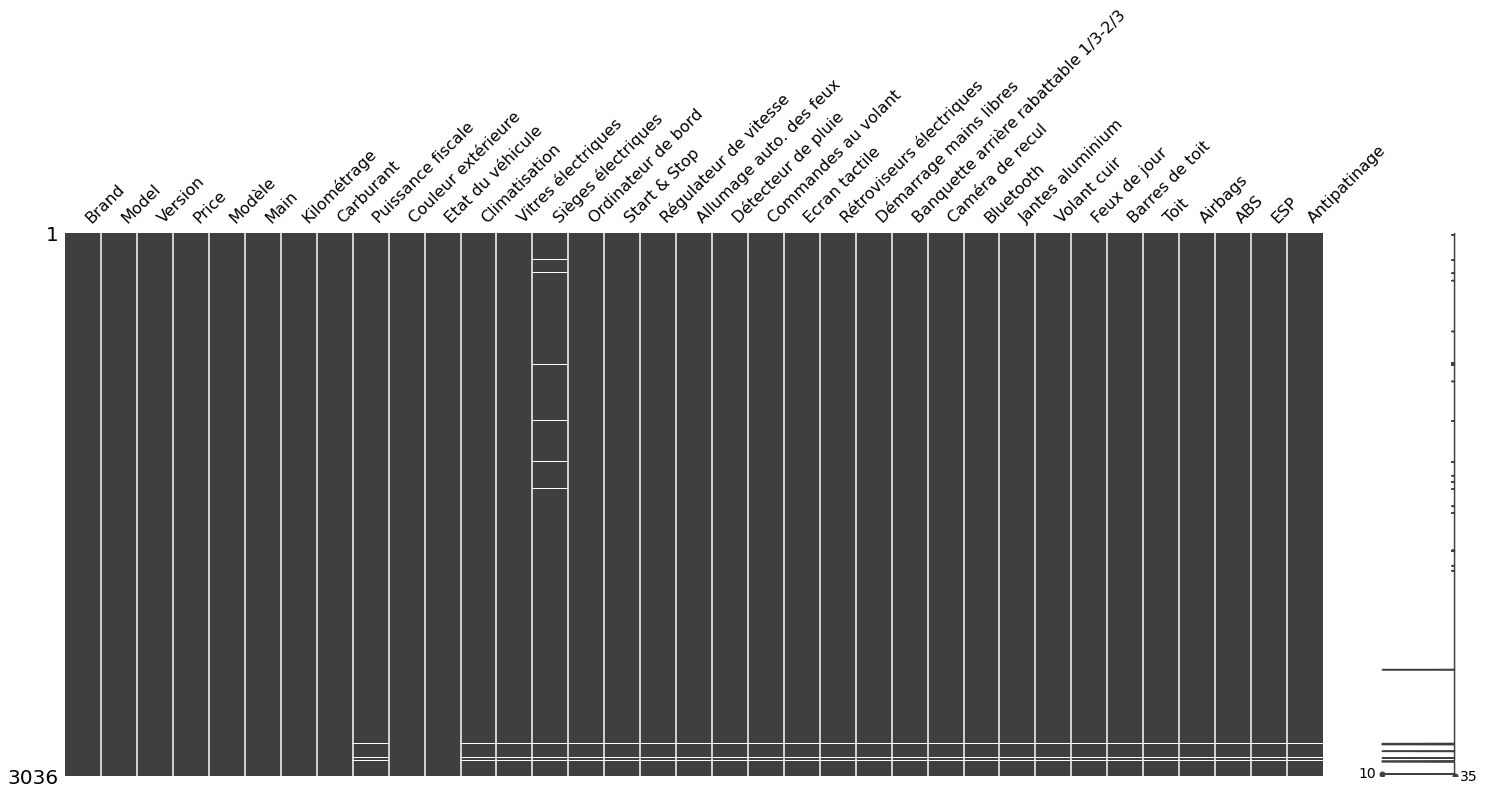

In [65]:
# affichant de nouveau notre data en utilisant msno
msno.matrix(data)
plt.show()

In [66]:
# affichant le nombre des valeurs manquées pour chaque attribut
data.isna().sum()

Brand                                    0
Model                                    0
Version                                  0
Price                                    0
Modèle                                   0
Main                                     0
Kilométrage                              0
Carburant                                0
Puissance fiscale                       15
Couleur extérieure                       0
Etat du véhicule                         0
Climatisation                           15
Vitres électriques                      15
Sièges électriques                      35
Ordinateur de bord                      15
Start & Stop                            15
Régulateur de vitesse                   15
Allumage auto. des feux                 15
Détecteur de pluie                      15
Commandes au volant                     15
Ecran tactile                           15
Rétroviseurs électriques                15
Démarrage mains libres                  15
Banquette a

In [67]:
# affichant les types de notre data 
data.dtypes

Brand                                           object
Model                                           object
Version                                         object
Price                                          float64
Modèle                                  datetime64[ns]
Main                                            object
Kilométrage                                    float64
Carburant                                       object
Puissance fiscale                              float64
Couleur extérieure                              object
Etat du véhicule                                object
Climatisation                                   object
Vitres électriques                              object
Sièges électriques                              object
Ordinateur de bord                              object
Start & Stop                                    object
Régulateur de vitesse                           object
Allumage auto. des feux                         object
Détecteur 

Tous les types ont été définis.

***Remplissage des valeurs manquantes restantes***

Il est envisageable de remplir les valeurs manquantes des colonnes restantes par la valeur la plus fréquente, car elles ont un nombre de valeurs manquantes très faible par rapport à la quantité de données que nous avons.

In [68]:
# remplaçant les valeurs manquantes par les plus fréquentes 
data = data.fillna(data.mode().iloc[0])

***Le résultat du cleaning***

In [69]:
# affichant le nombre des valeurs manquées pour chaque attribut
data.isna().sum()

Brand                                   0
Model                                   0
Version                                 0
Price                                   0
Modèle                                  0
Main                                    0
Kilométrage                             0
Carburant                               0
Puissance fiscale                       0
Couleur extérieure                      0
Etat du véhicule                        0
Climatisation                           0
Vitres électriques                      0
Sièges électriques                      0
Ordinateur de bord                      0
Start & Stop                            0
Régulateur de vitesse                   0
Allumage auto. des feux                 0
Détecteur de pluie                      0
Commandes au volant                     0
Ecran tactile                           0
Rétroviseurs électriques                0
Démarrage mains libres                  0
Banquette arrière rabattable 1/3-2

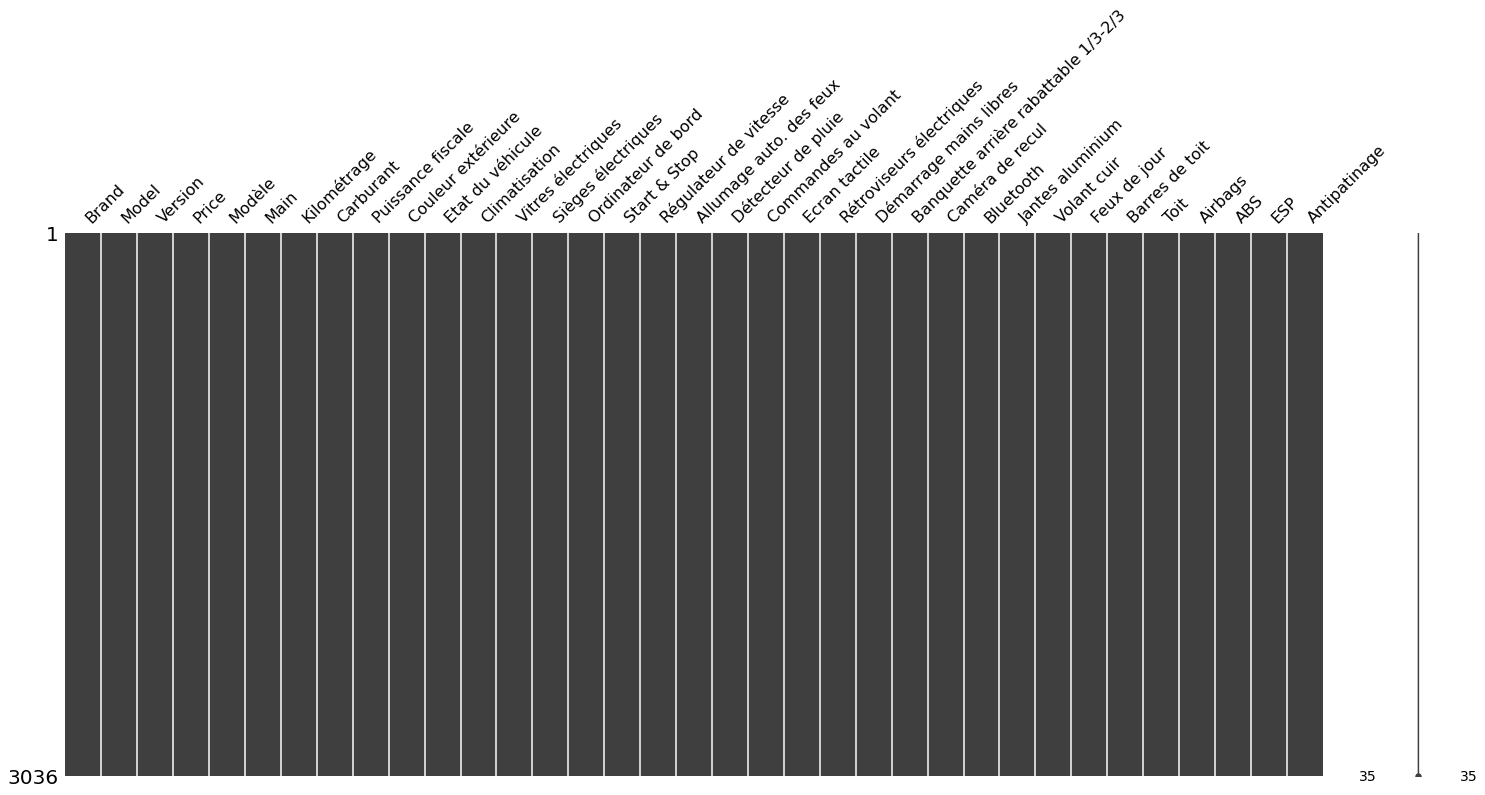

In [70]:
# affichant de nouveau notre data en utilisant msno
msno.matrix(data)
plt.show()

In [71]:
data.dtypes

Brand                                           object
Model                                           object
Version                                         object
Price                                          float64
Modèle                                  datetime64[ns]
Main                                            object
Kilométrage                                    float64
Carburant                                       object
Puissance fiscale                              float64
Couleur extérieure                              object
Etat du véhicule                                object
Climatisation                                   object
Vitres électriques                              object
Sièges électriques                              object
Ordinateur de bord                              object
Start & Stop                                    object
Régulateur de vitesse                           object
Allumage auto. des feux                         object
Détecteur 

## Data Visualisation

### L'importation des librairies nécessaires

In [72]:
import numpy as np
import pandas as pd
# import plotly.express as px
import matplotlib.pyplot as plt
# render figures directly in the notebook :
%matplotlib inline
# render higher resolution images :
%config InlineBackend.figure_format = 'retina'

# Seaborn is a Python data visualization library based on matplotlib :
import seaborn as sns 

### La visualisation de la distribution des prix

(0.0, 1000000.0)

<Figure size 1440x7200 with 0 Axes>

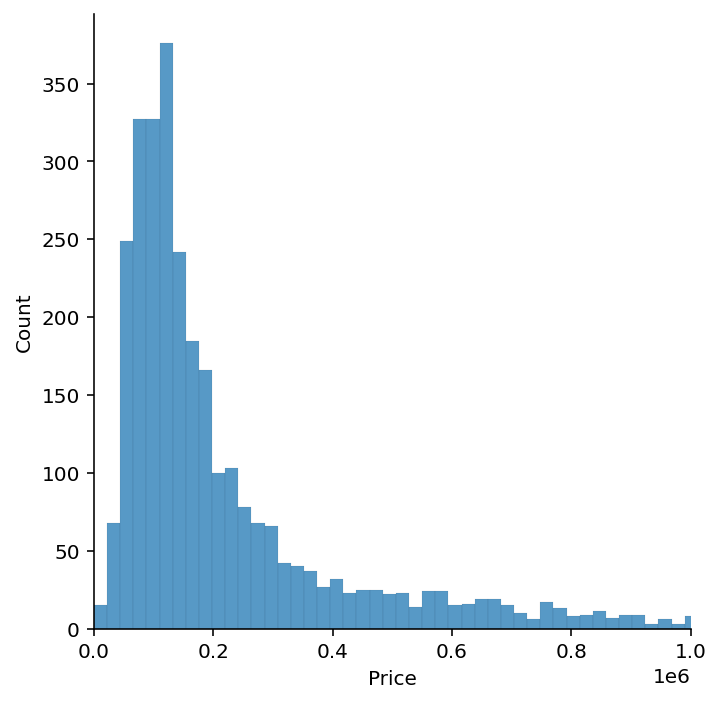

In [73]:
# Visualiser la distribution des prix
plt.figure(figsize=(20,100))
sns.displot(data['Price'],bins=1000)
plt.xlim(0, 1000000)

In [74]:
data.describe()

Price   Kilométrage  Puissance fiscale
count  3.036000e+03  3.036000e+03        3036.000000
mean   2.668272e+05  1.066469e+05           8.147892
std    5.130530e+05  3.399448e+05           4.618586
min    0.000000e+00  0.000000e+00           1.000000
25%    9.500000e+04  0.000000e+00           6.000000
50%    1.450000e+05  7.990000e+04           7.000000
75%    2.731250e+05  1.550500e+05           8.000000
max    2.200000e+07  1.678000e+07          95.000000

Ces statistiques permettent de mieux comprendre la distribution et les caractéristiques des données numériques. Par exemple, pour la variable Price, on peut voir que la moyenne est d'environ 266 827 DHs, avec une grande dispersion des valeurs autour de la moyenne (l'écart type est de 513 053 DHs). Le prix minimum est de 0 DH, ce qui pourrait être une valeur manquante ou une anomalie, tandis que le prix maximum est de 22 000 000 DHs, ce qui suggère qu'il y a des valeurs extrêmes dans les données. Les quartiles indiquent que 25% des voitures ont un prix inférieur à 95 000 DHs, 50% ont un prix inférieur à 145 000 DHs et 75% ont un prix inférieur à 273 125 DHs.


In [75]:
mean=data['Price'].mean() # claculant la valeur moyenne des prix
median=data['Price'].median() # claculant la valeur médiane des prix 
print('La valeur moyenne des prix: {}'.format(mean))
print('La valeur médiane des prix:  {}'.format(median))

if mean>median:
    print("c'est une distribution asymétrique à droite")
elif mean< median:
    print("c'est une distribution asymétrique à gauche")
else:
    print("c'est une distribution normale")

La valeur moyenne des prix: 266827.2028985507
La valeur médiane des prix:  145000.0
c'est une distribution asymétrique à droite


La moyenne **(mean())** représente la somme de toutes les valeurs divisée par le nombre total d'observations. 

La médiane **(median())** représente la valeur du point central de la distribution, c'est-à-dire la valeur qui sépare la distribution en deux parties égales.

### La visualisation de la distribution de kilometrage


In [76]:
mean=data['Kilométrage'].mean() # claculant la valeur moyenne des prix
median=data['Kilométrage'].median() # claculant la valeur médiane des prix

print('La valeur moyenne des prix: {}'.format(mean))
print('La valeur médiane des prix:  {}'.format(median))
if mean>median:
    print("c'est une distribution asymétrique à droite")
elif mean< median:
    print("c'est une distribution asymétrique à gauche")
else:
    print("c'est une distribution normale")

La valeur moyenne des prix: 106646.8521080369
La valeur médiane des prix:  79900.0
c'est une distribution asymétrique à droite


### La visualisation de la distribution de puissance fiscale

In [77]:
mean=data['Puissance fiscale'].mean() # claculant la valeur moyenne des prix
median=data['Puissance fiscale'].median() # claculant la valeur médiane des prix

print('La valeur moyenne des prix: {}'.format(mean))
print('La valeur médiane des prix:  {}'.format(median))
if mean>median:
    print("c'est une distribution asymétrique à droite")
elif mean< median:
    print("c'est une distribution asymétrique à gauche")
else:
    print("c'est une distribution normale")

La valeur moyenne des prix: 8.147891963109354
La valeur médiane des prix:  7.0
c'est une distribution asymétrique à droite


- La distribution de la variabe Price est asymetrique a droite qui est une distribution statistique dans laquelle les valeurs sont principalement concentrées sur le côté gauche de la courbe, mais avec quelques valeurs extrêmes (valeurs élevées) qui s'étendent sur le côté droit de la courbe.

### La visualisation du boxplot


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'MERCEDES'),
  Text(1, 0, 'MINI'),
  Text(2, 0, 'MITSUBISHI'),
  Text(3, 0, 'NISSAN'),
  Text(4, 0, 'OPEL'),
  Text(5, 0, 'PEUGEOT'),
  Text(6, 0, 'PORSCHE'),
  Text(7, 0, 'RENAULT'),
  Text(8, 0, 'SEAT'),
  Text(9, 0, 'SKODA'),
  Text(10, 0, 'SSANGYONG'),
  Text(11, 0, 'SUZUKI'),
  Text(12, 0, 'TOYOTA'),
  Text(13, 0, 'VOLKSWAGEN'),
  Text(14, 0, 'VOLVO'),
  Text(15, 0, 'ALFA'),
  Text(16, 0, 'AUDI'),
  Text(17, 0, 'BMW'),
  Text(18, 0, 'CITROEN'),
  Text(19, 0, 'DACIA'),
  Text(20, 0, 'DFSK'),
  Text(21, 0, 'DS'),
  Text(22, 0, 'FIAT'),
  Text(23, 0, 'FORD'),
  Text(24, 0, 'HONDA'),
  Text(25, 0, 'HYUNDAI'),
  Text(26, 0, 'JAGUAR'),
  Text(27, 0, 'JEEP'),
  Text(28, 0, 'KIA'),
  Text(29, 0, 'LAND'),
  Text(30, 0, 'LEXUS'),
  Text(31, 0, 'MAHINDRA'),
  Text(32, 0, 'MAZDA')])

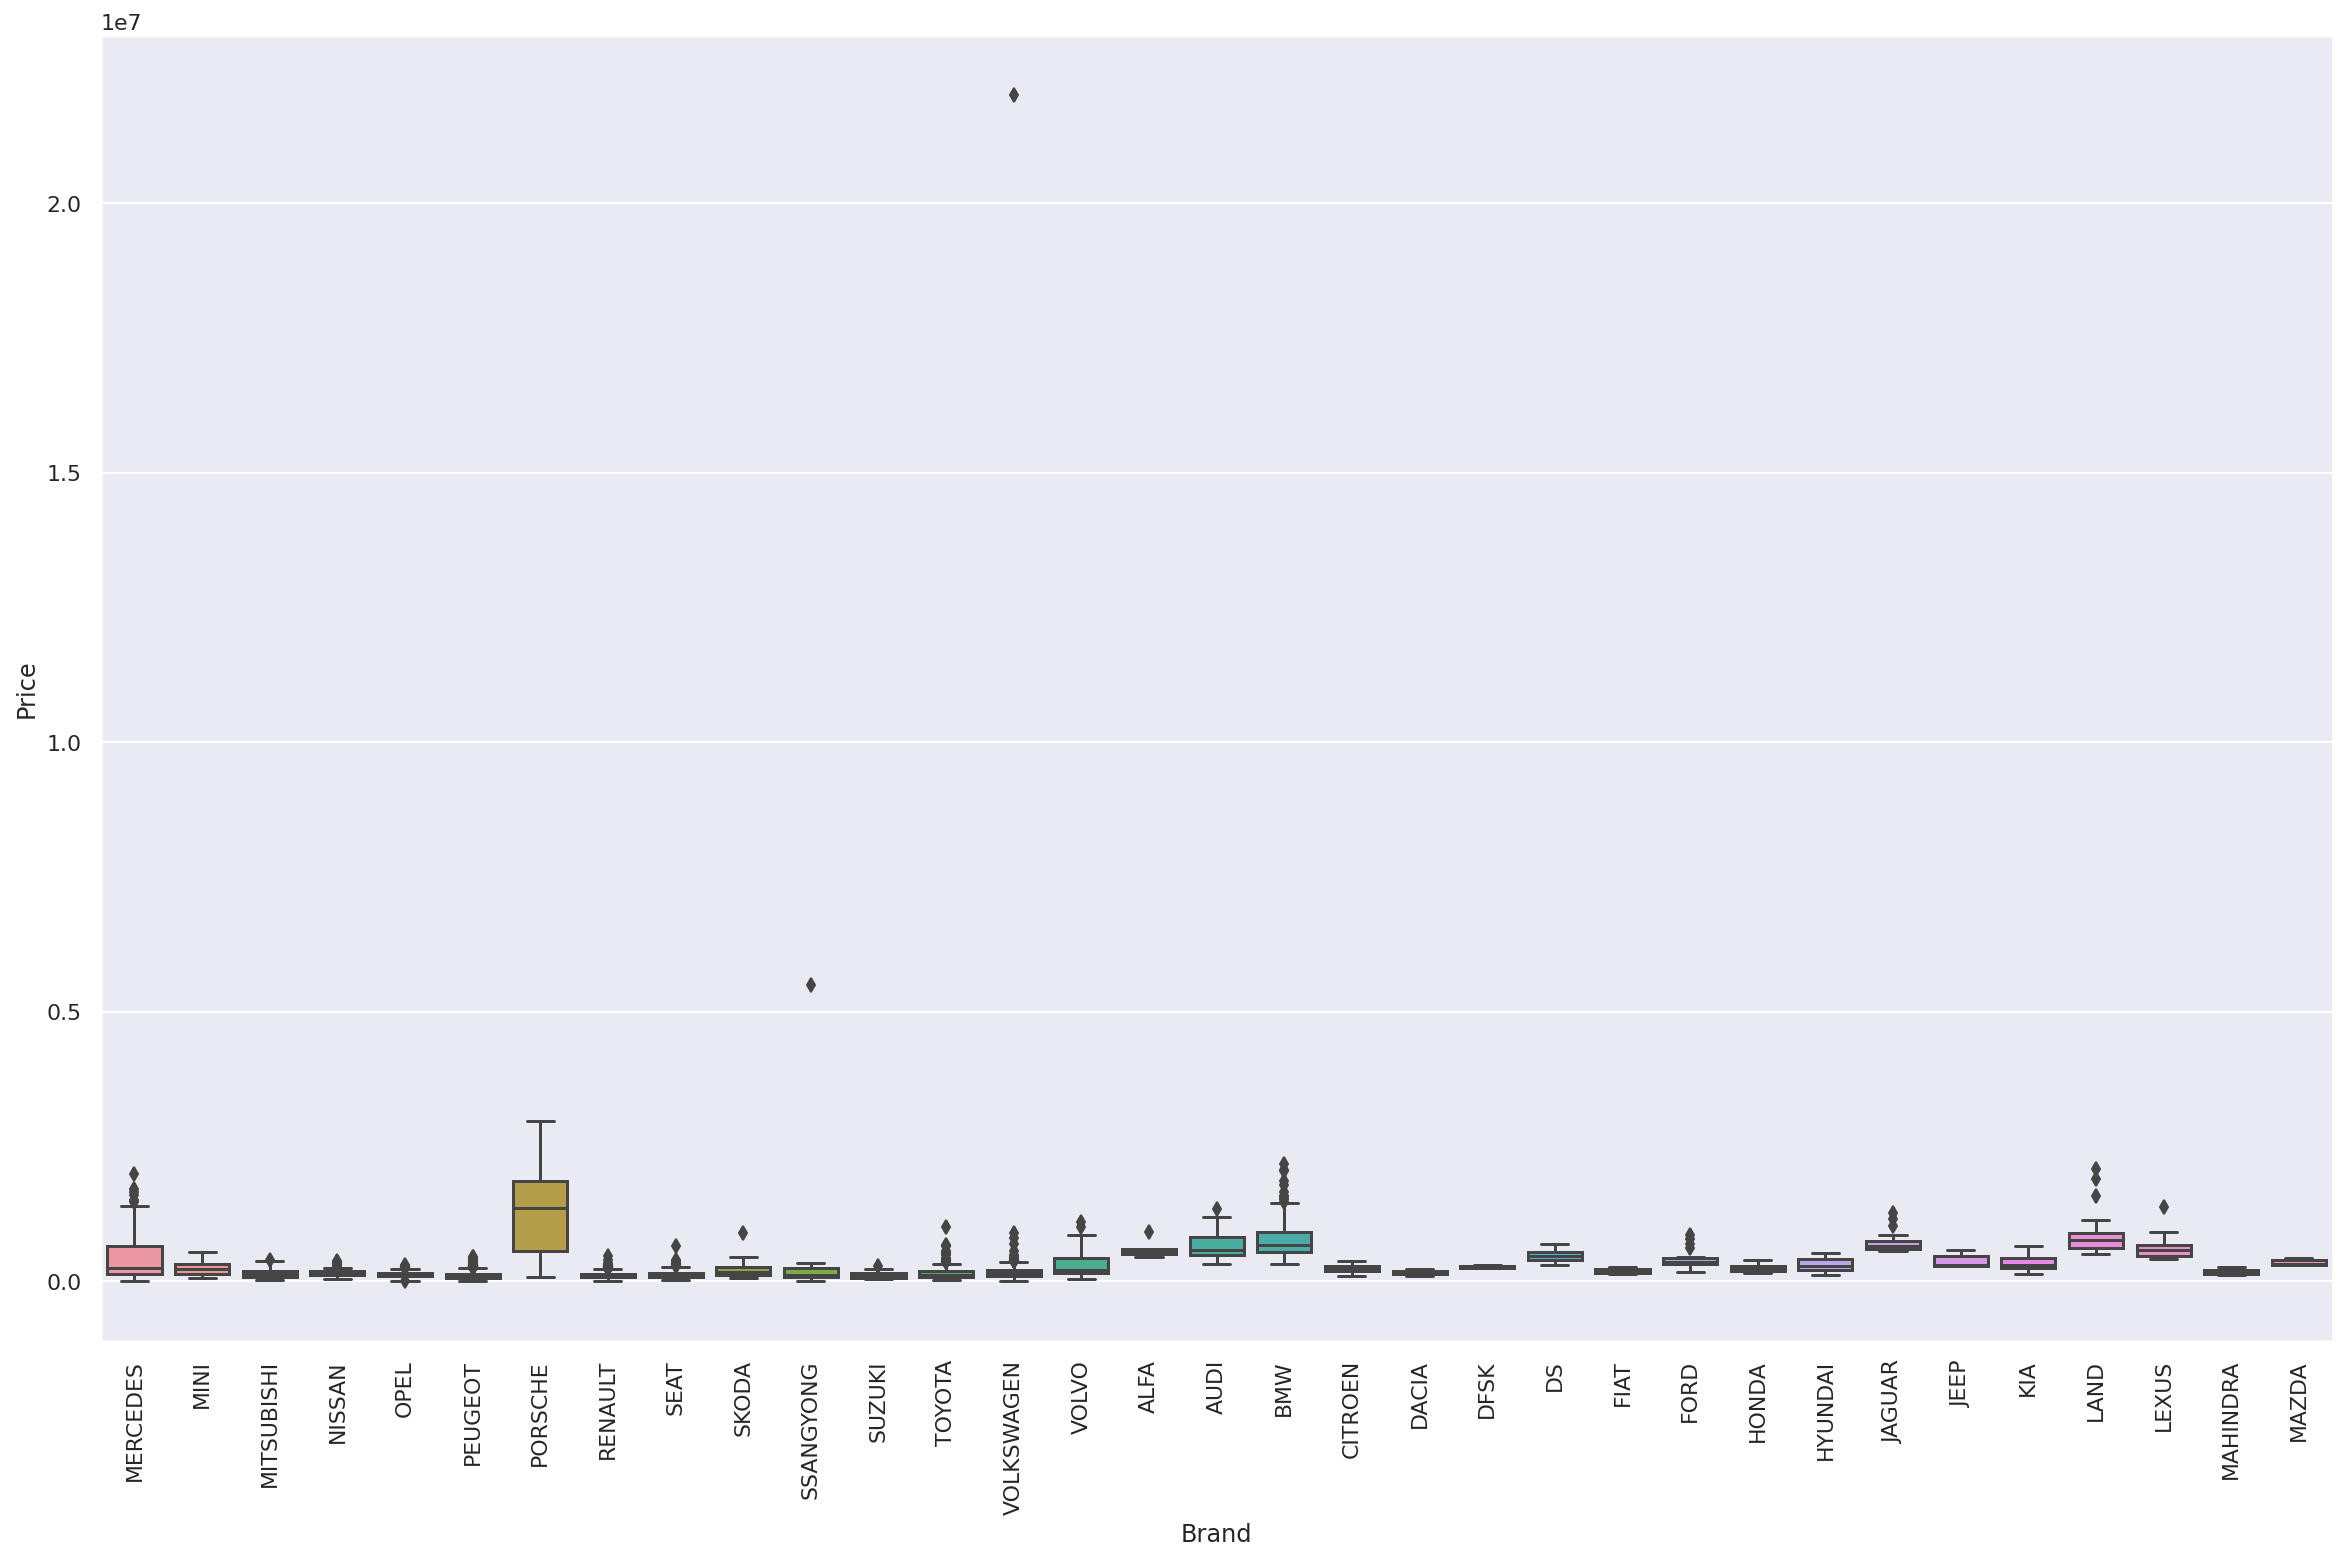

In [78]:
plt.figure(figsize=(20,12))
sns.set(style='darkgrid')
sns.boxplot(x='Brand', y='Price', data=data)
plt.xticks(rotation=90)

Nous pouvons constater la présence de valeurs aberrantes (outliers) dans les données, c'est-à-dire des valeurs extrêmes qui peuvent influencer de manière significative les résultats de l'analyse. Ces valeurs peuvent être le résultat d'erreurs de mesure, de saisie incorrecte des données ou d'autres facteurs. Par conséquent, il est souvent recommandé de les supprimer afin d'améliorer la qualité de l'analyse. Supprimer les valeurs aberrantes peut aider à obtenir une distribution plus normale, plus homogène et plus représentative de la population sous-jacente. Cependant, avant de supprimer les valeurs aberrantes, il est important de comprendre leur origine et leur impact sur les résultats de l'analyse.

### La supprission des valeurs abberantes

In [79]:
# l'affichage des valeurs abberantes
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Price")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  540312.5
Lower Whisker:  -172187.5


In [80]:
# supprimant ces valeurs abberantes
data = data[(data['Price'] > lower) & (data['Price'] < upper)]

<ipython-input-81-8df0227e9d5c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

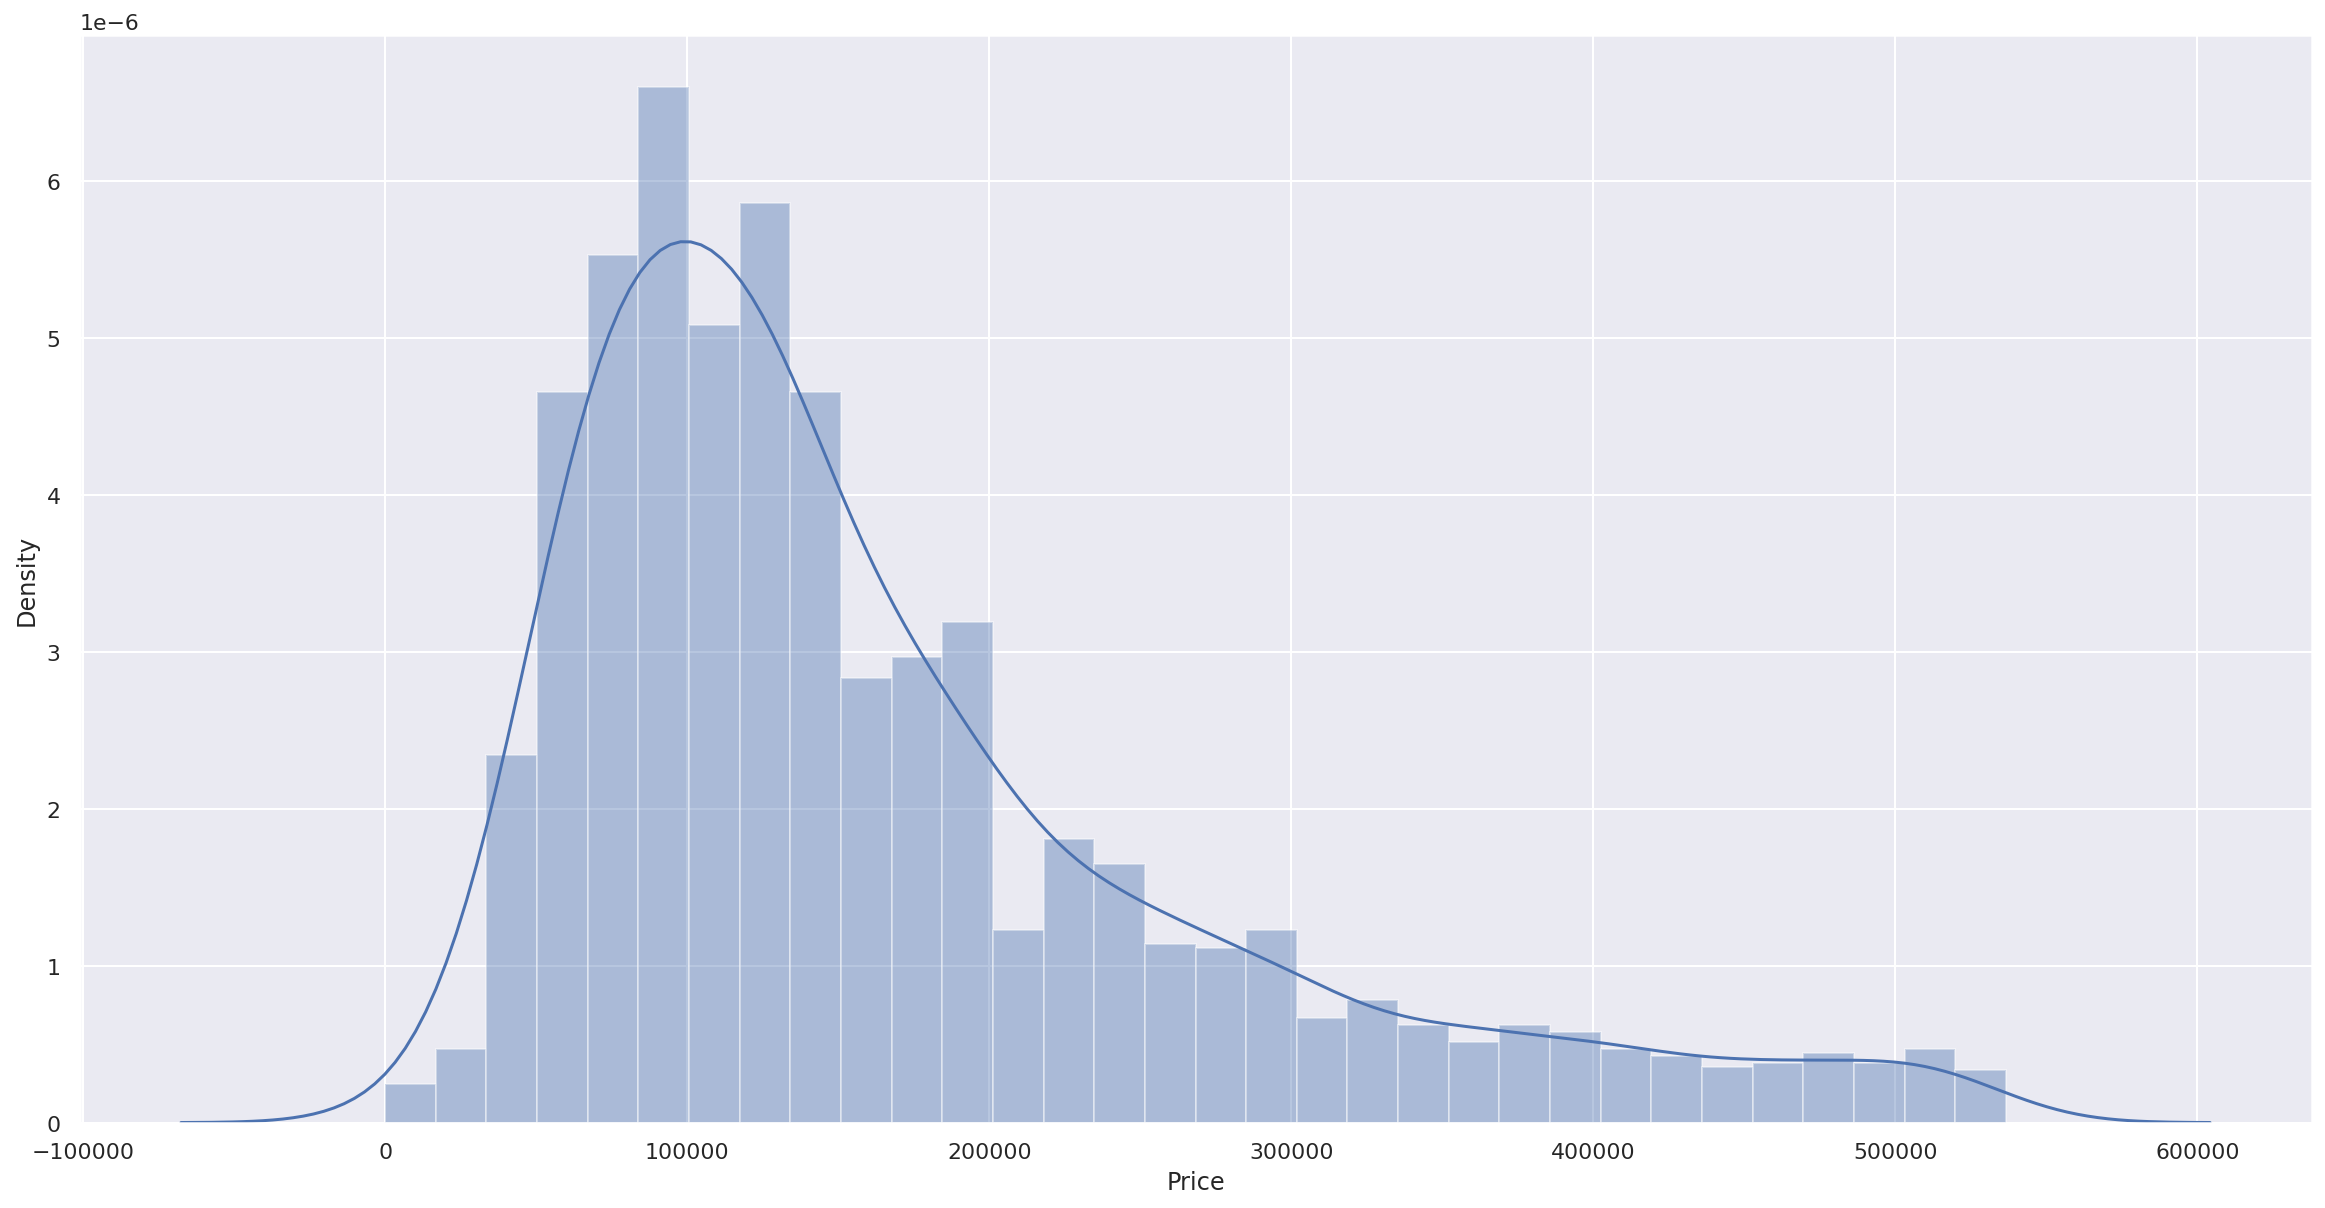

In [81]:
# la distribution des valeurs Price après la suppression des valeurs abberantes

plt.figure(figsize=(20,10))
sns.distplot(data['Price'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'MERCEDES'),
  Text(1, 0, 'MINI'),
  Text(2, 0, 'MITSUBISHI'),
  Text(3, 0, 'NISSAN'),
  Text(4, 0, 'OPEL'),
  Text(5, 0, 'PEUGEOT'),
  Text(6, 0, 'PORSCHE'),
  Text(7, 0, 'RENAULT'),
  Text(8, 0, 'SEAT'),
  Text(9, 0, 'SKODA'),
  Text(10, 0, 'SSANGYONG'),
  Text(11, 0, 'SUZUKI'),
  Text(12, 0, 'TOYOTA'),
  Text(13, 0, 'VOLKSWAGEN'),
  Text(14, 0, 'VOLVO'),
  Text(15, 0, 'ALFA'),
  Text(16, 0, 'AUDI'),
  Text(17, 0, 'BMW'),
  Text(18, 0, 'CITROEN'),
  Text(19, 0, 'DACIA'),
  Text(20, 0, 'DFSK'),
  Text(21, 0, 'DS'),
  Text(22, 0, 'FIAT'),
  Text(23, 0, 'FORD'),
  Text(24, 0, 'HONDA'),
  Text(25, 0, 'HYUNDAI'),
  Text(26, 0, 'JEEP'),
  Text(27, 0, 'KIA'),
  Text(28, 0, 'LAND'),
  Text(29, 0, 'LEXUS'),
  Text(30, 0, 'MAHINDRA'),
  Text(31, 0, 'MAZDA')])

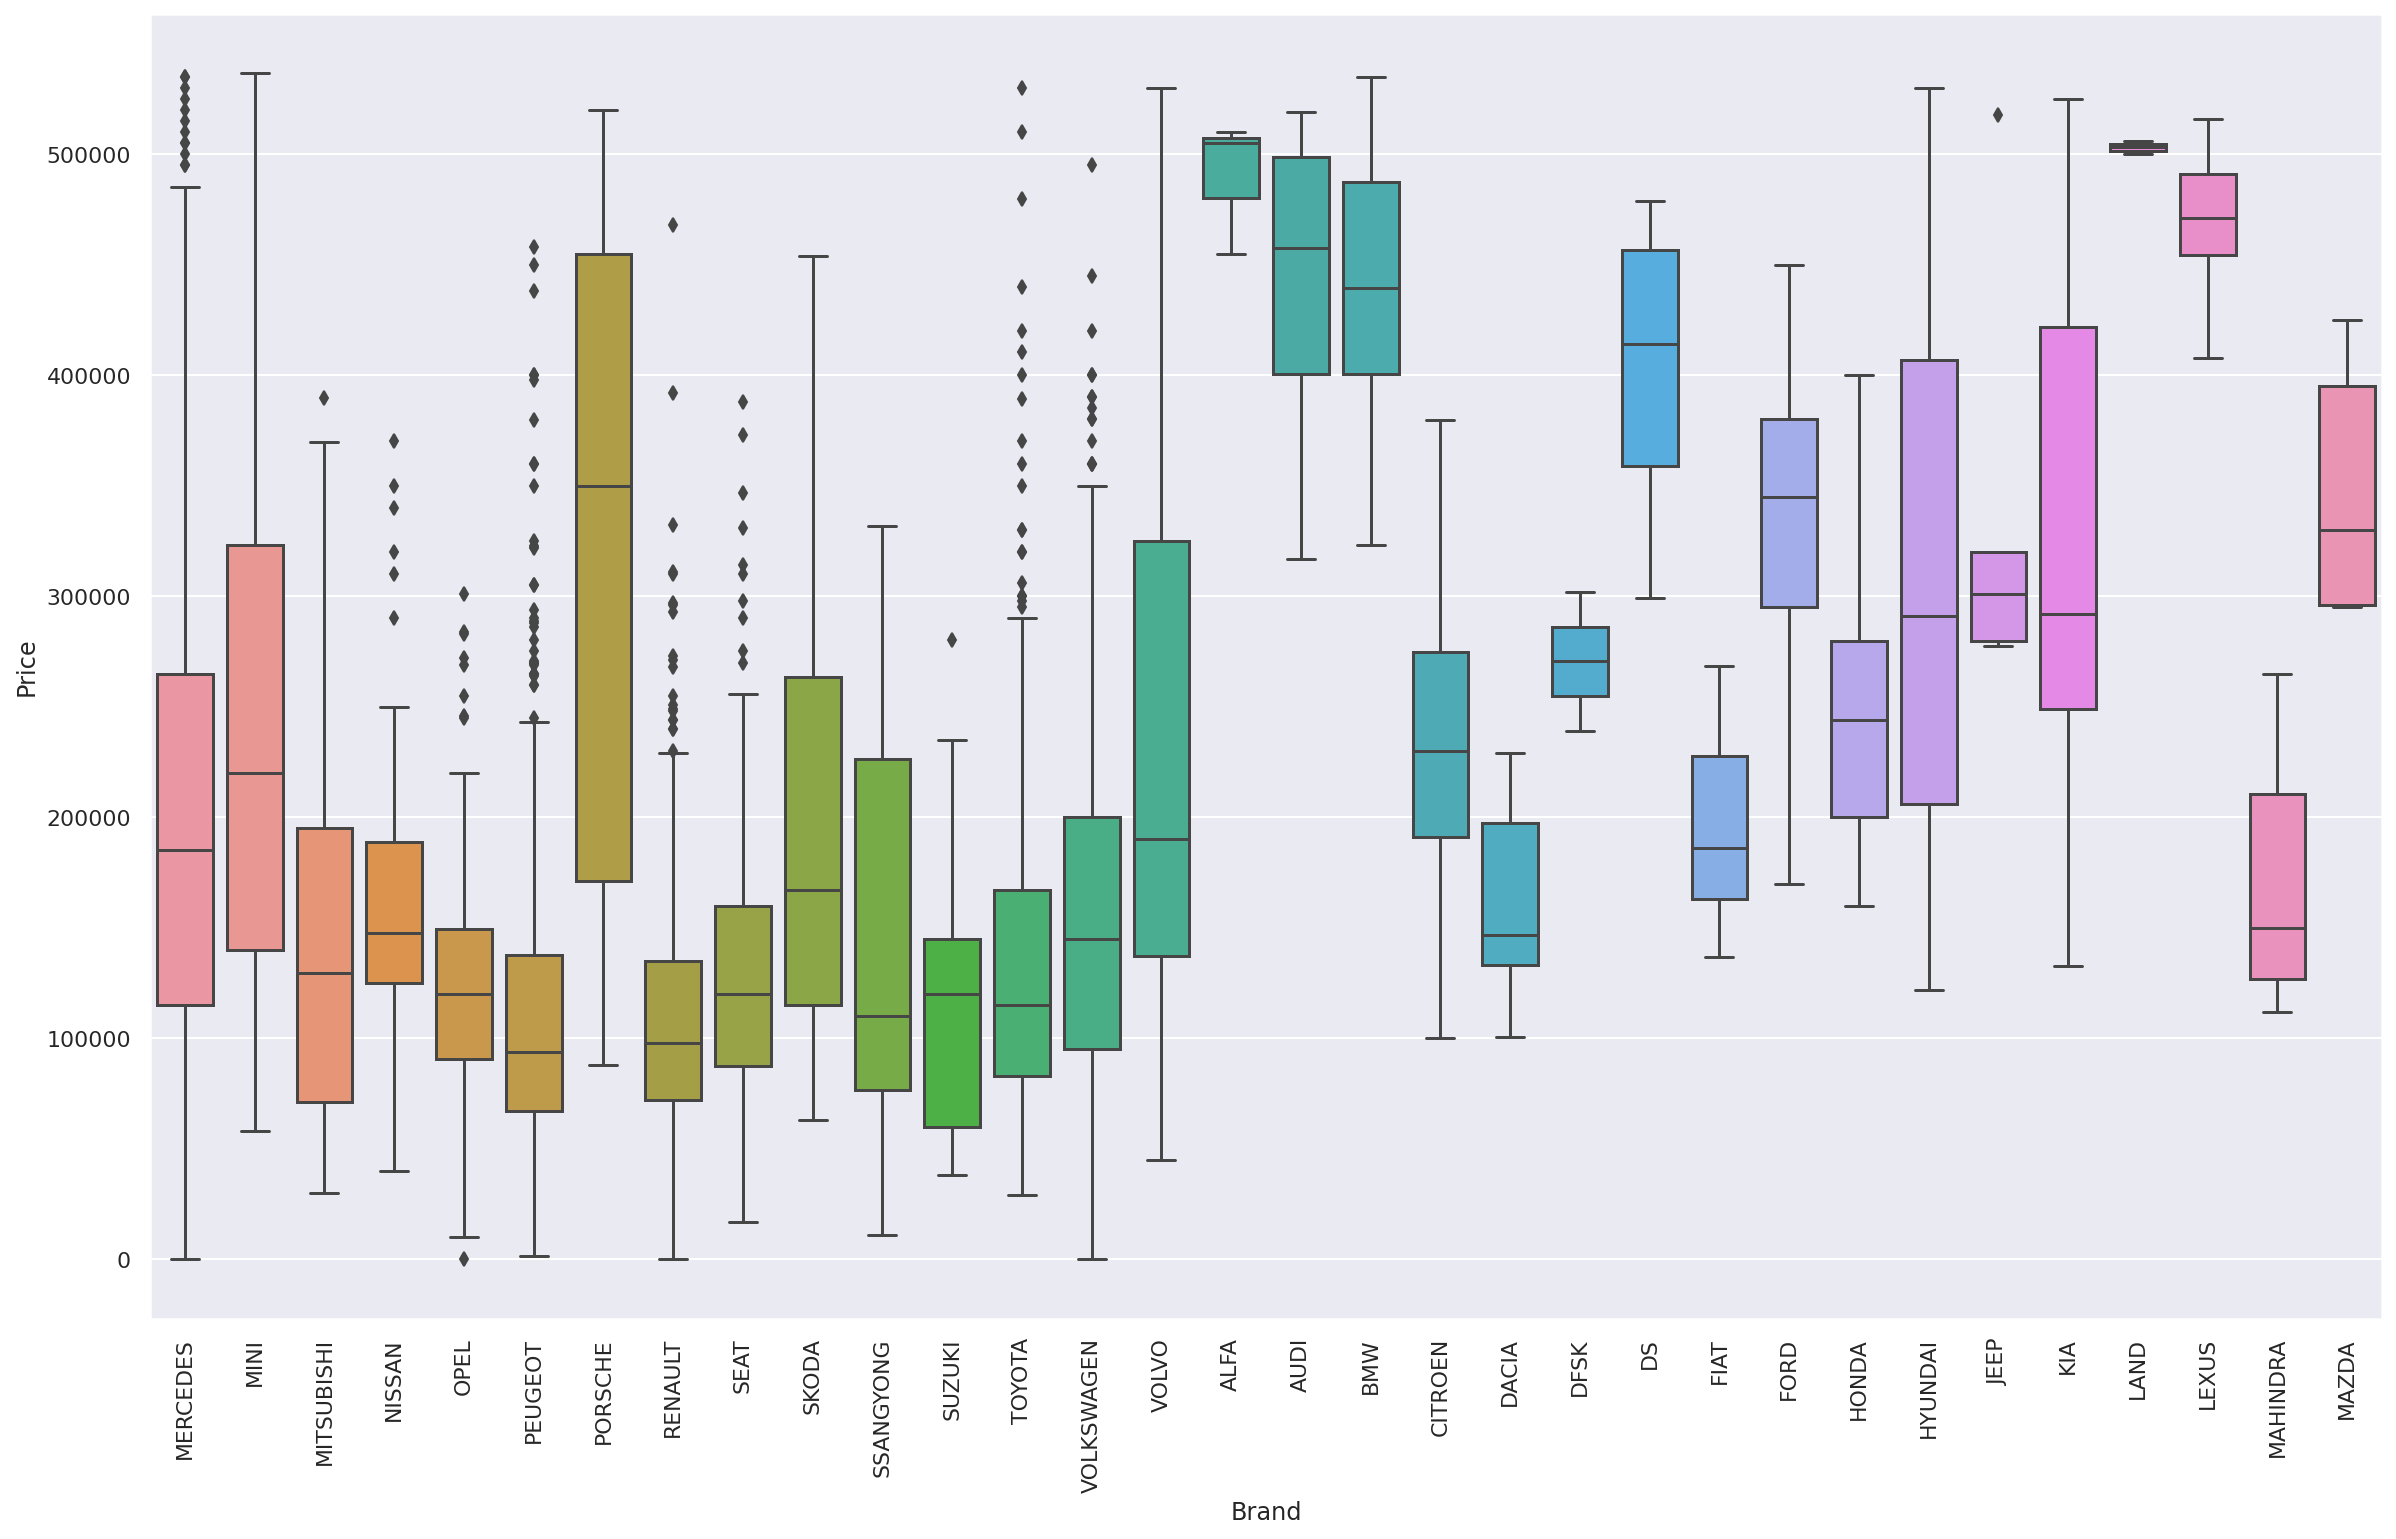

In [82]:
plt.figure(figsize=(20,12))
sns.set(style='darkgrid')
sns.boxplot(x='Brand', y='Price', data=data)
plt.xticks(rotation=90)

- La visualisation de boxplot de couleur par rapport au Price, montre que l'attribut **"Brand"** a un grand effet sur le prix.


- Pour visualiser ensembles des attributs qui ont un imparct sur le price, nous allons afficher le baxplot de tous les attributs par rapport au Price 

### La visualisation du boxplot de toutes les attributs par rapport au prix 

<ipython-input-101-4c82b56aa969>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,8))


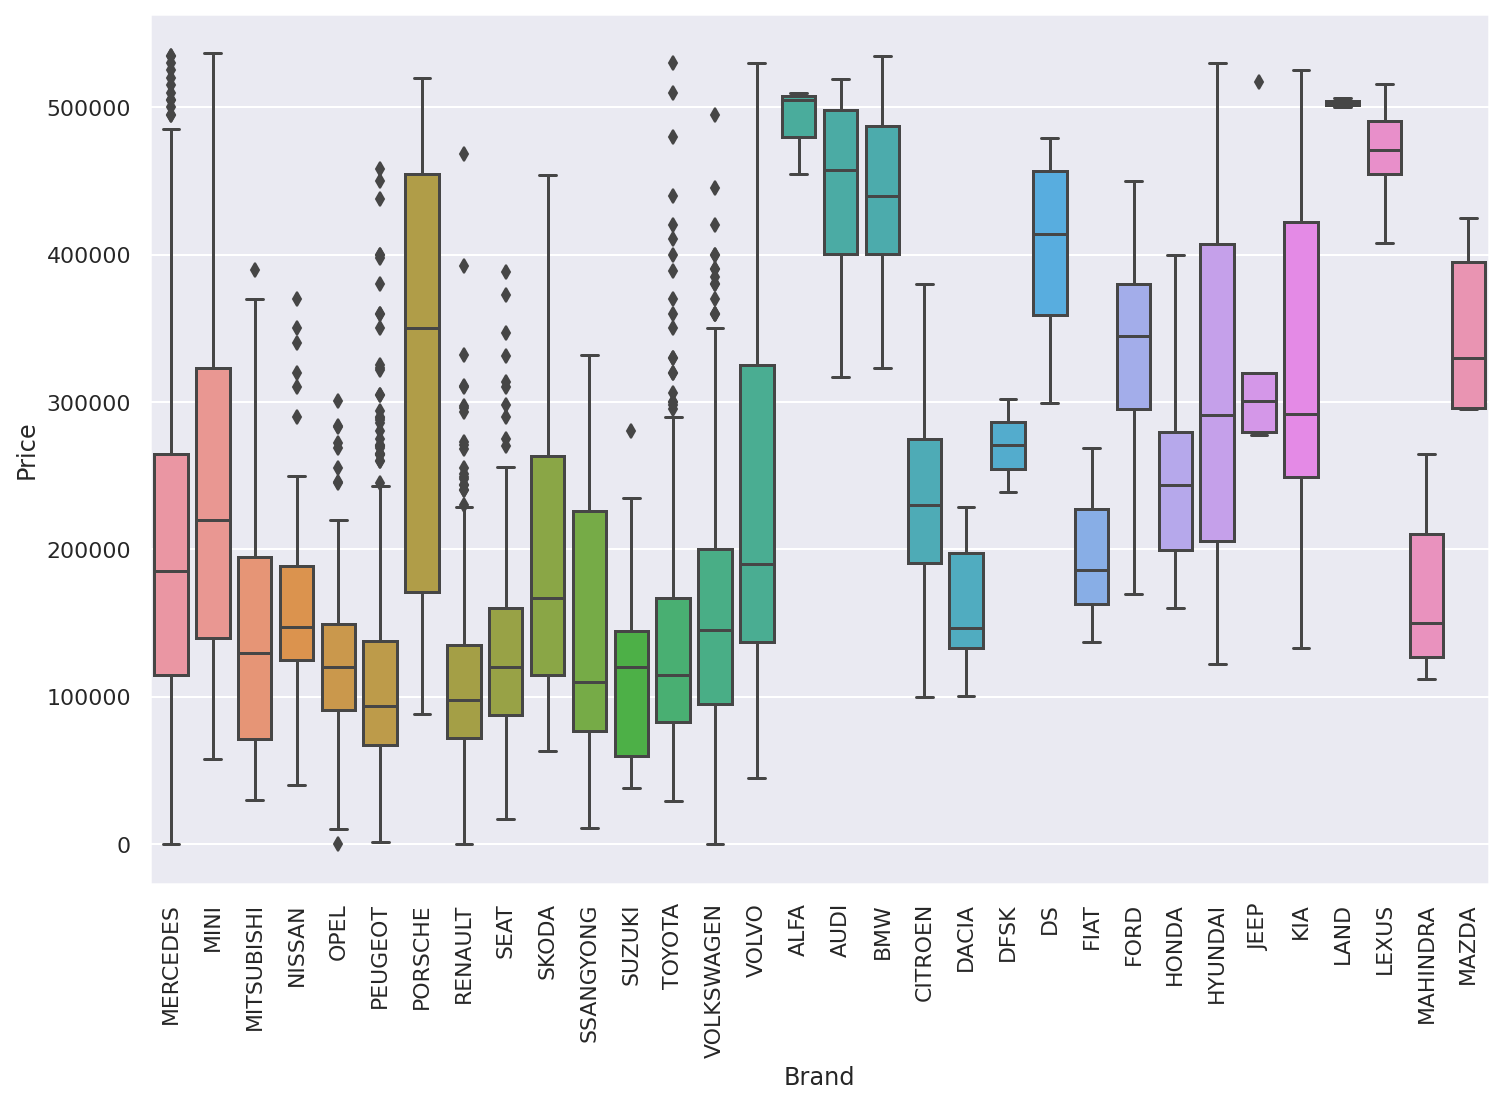

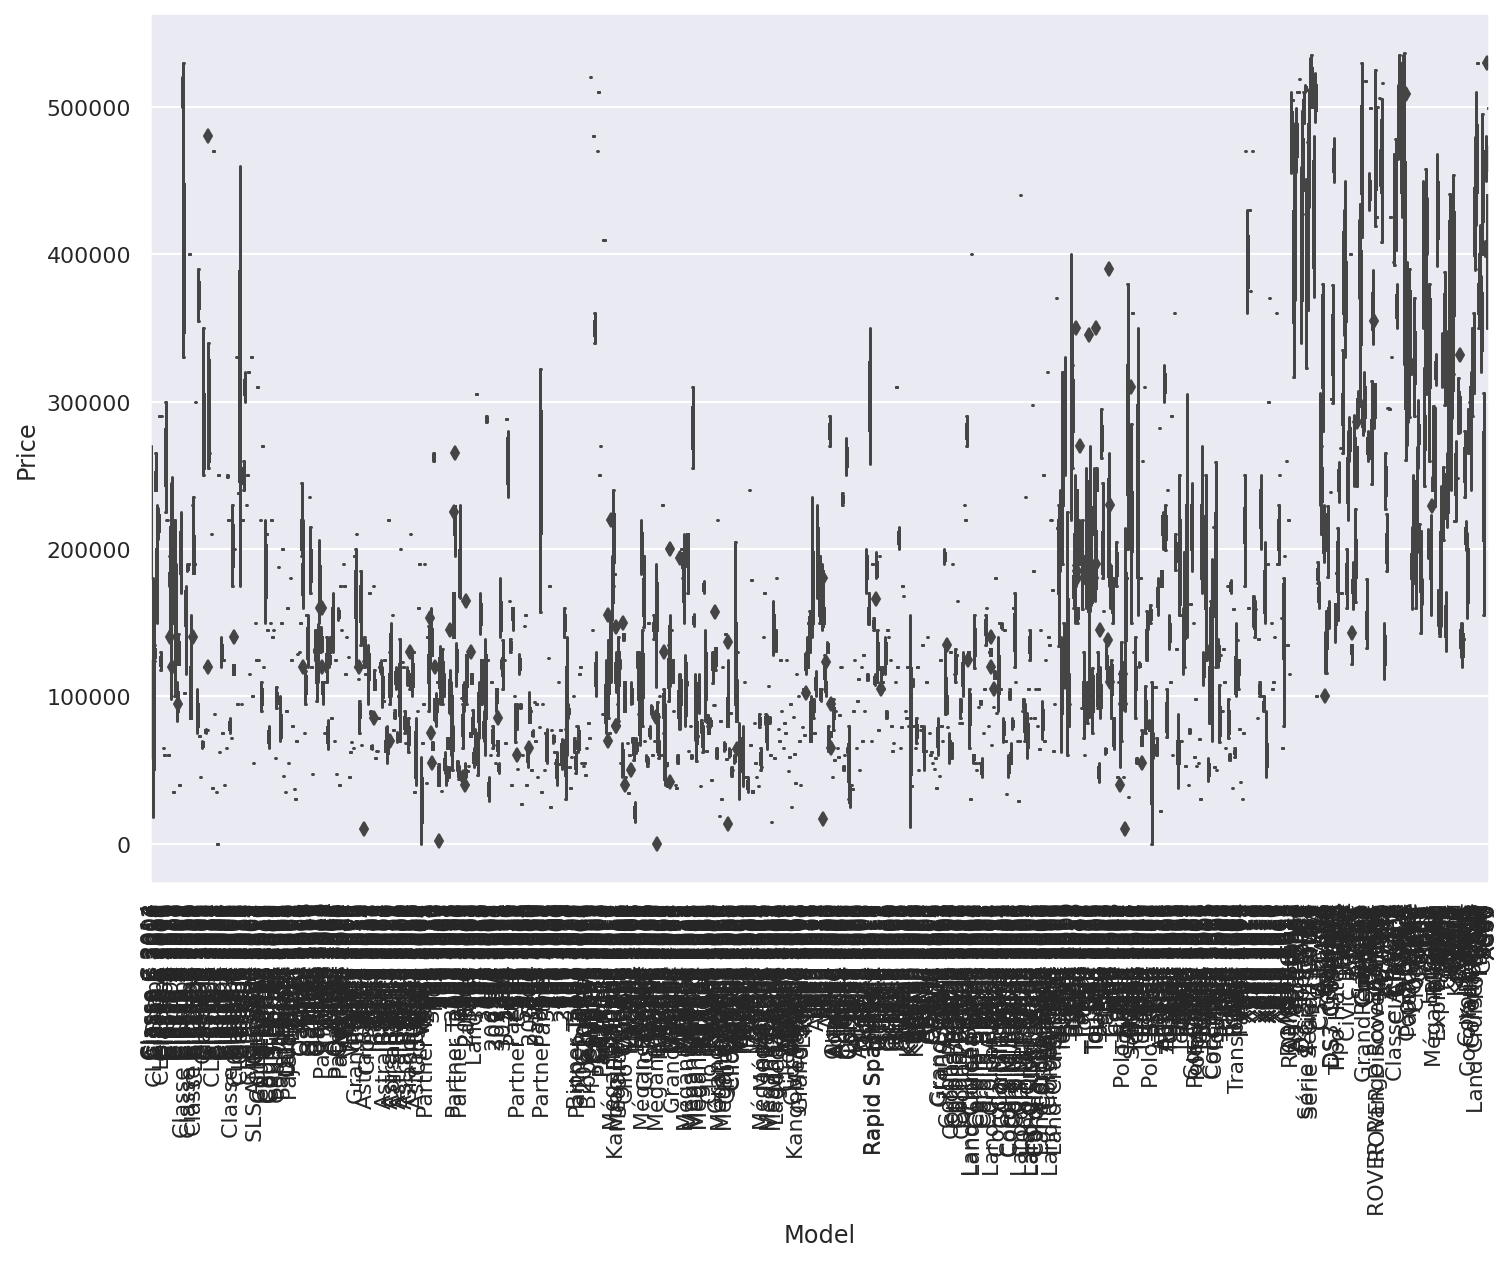

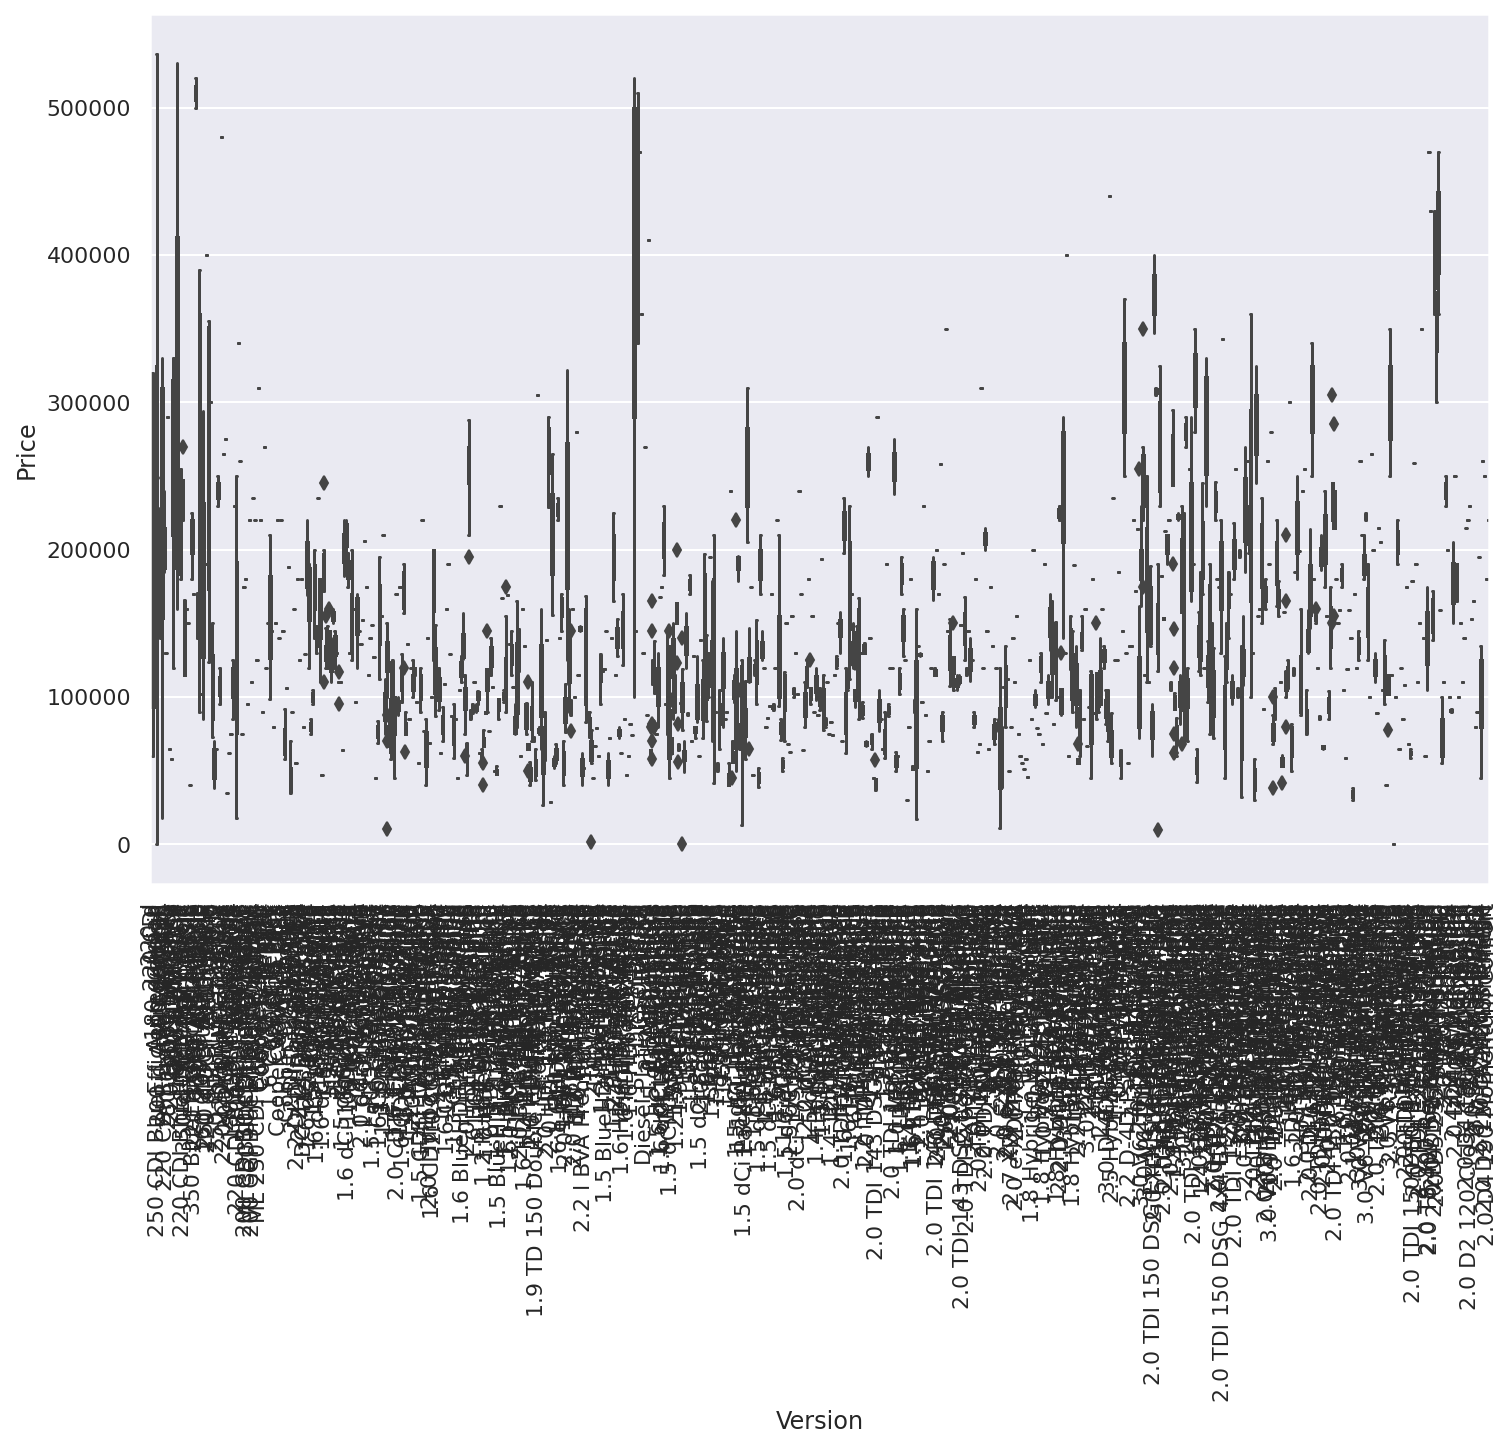

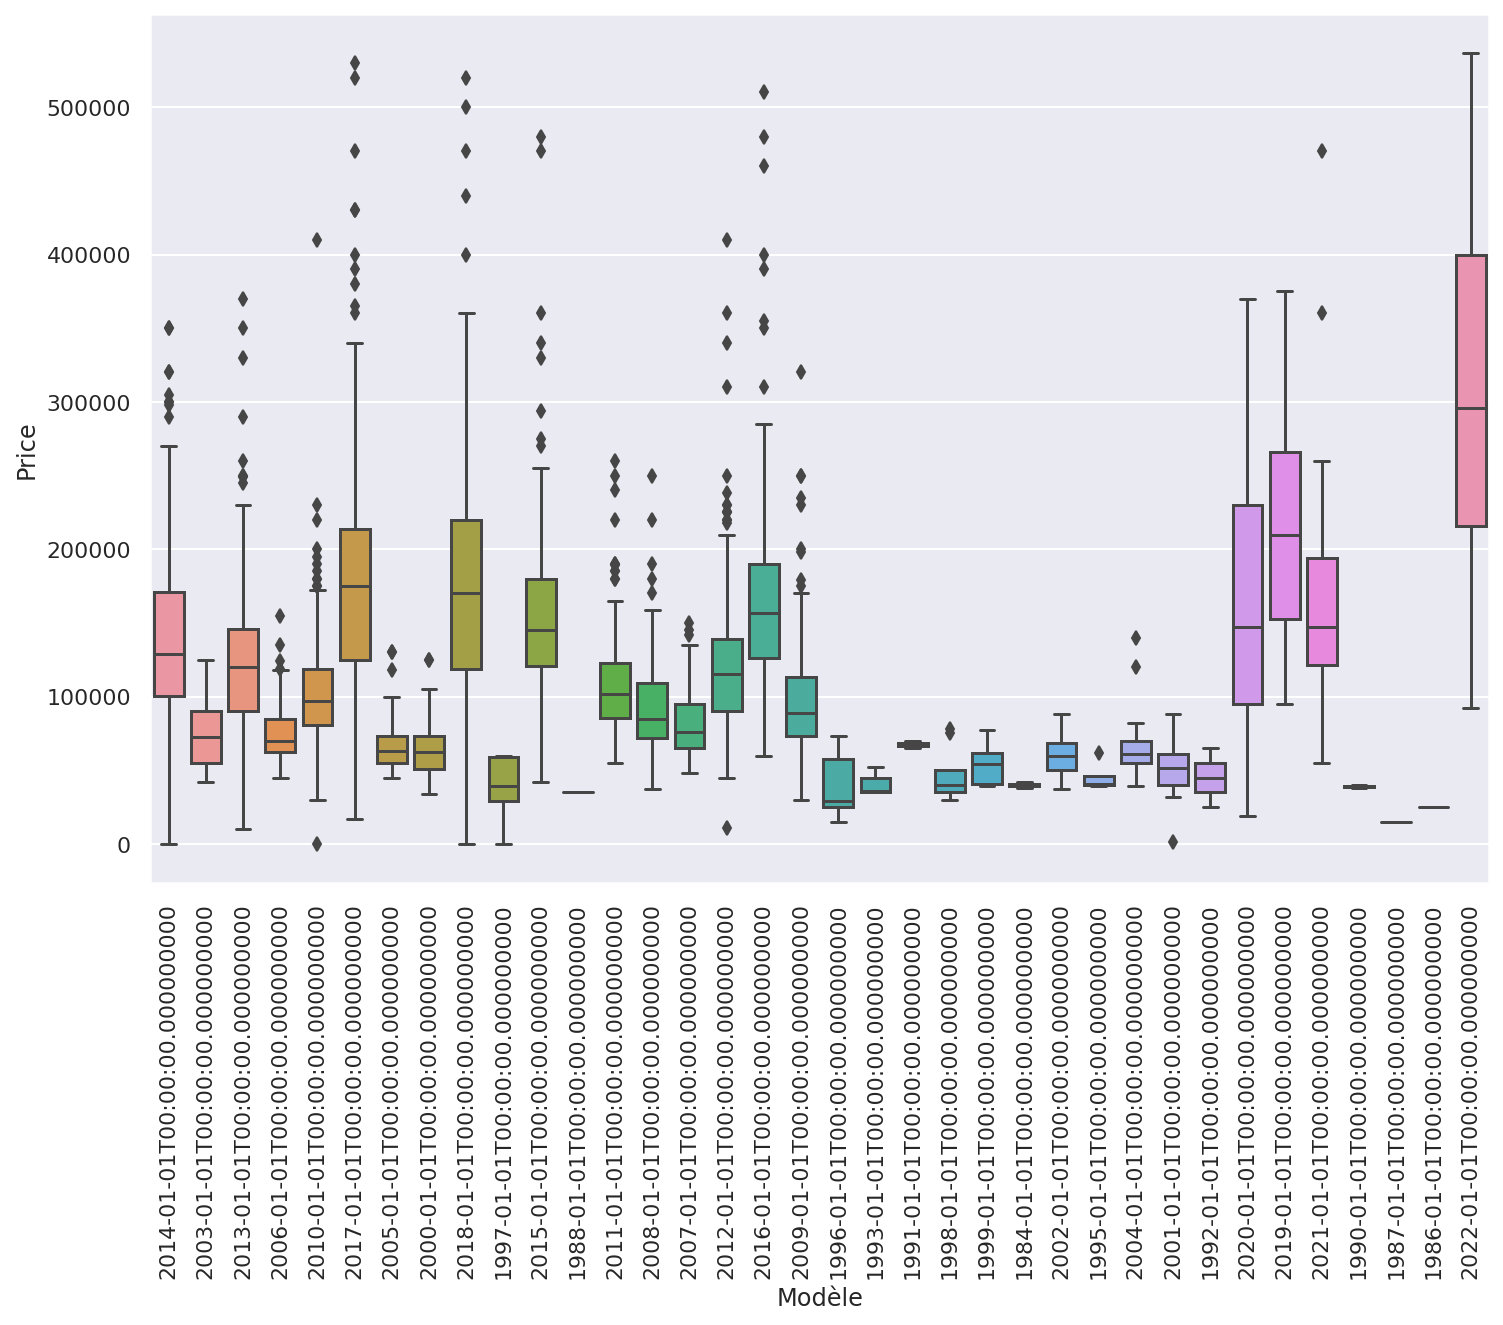

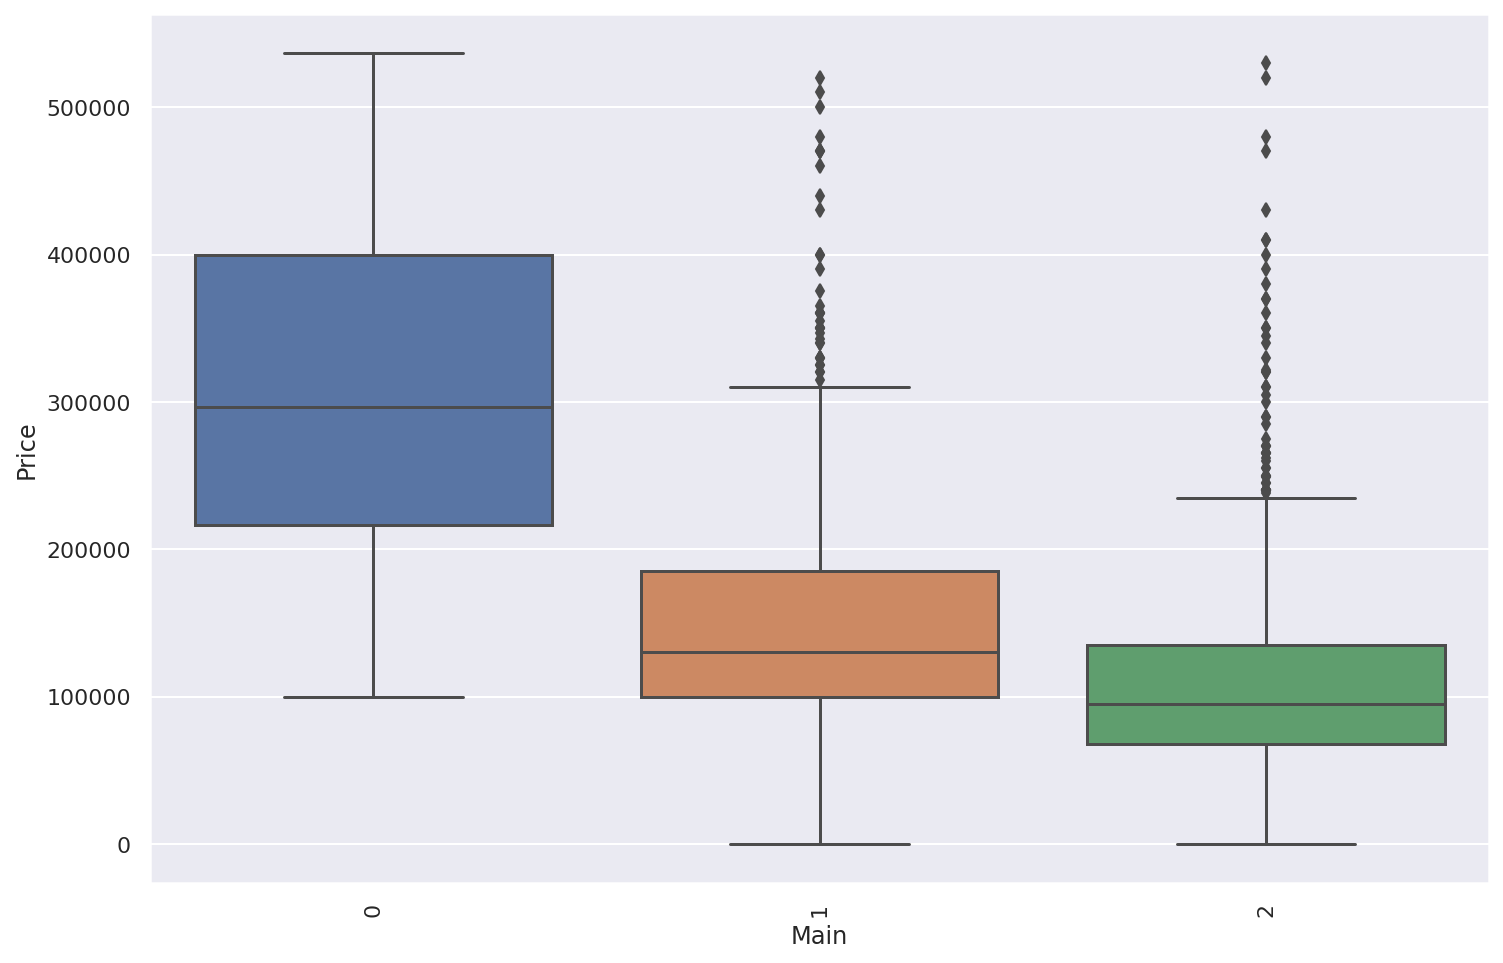

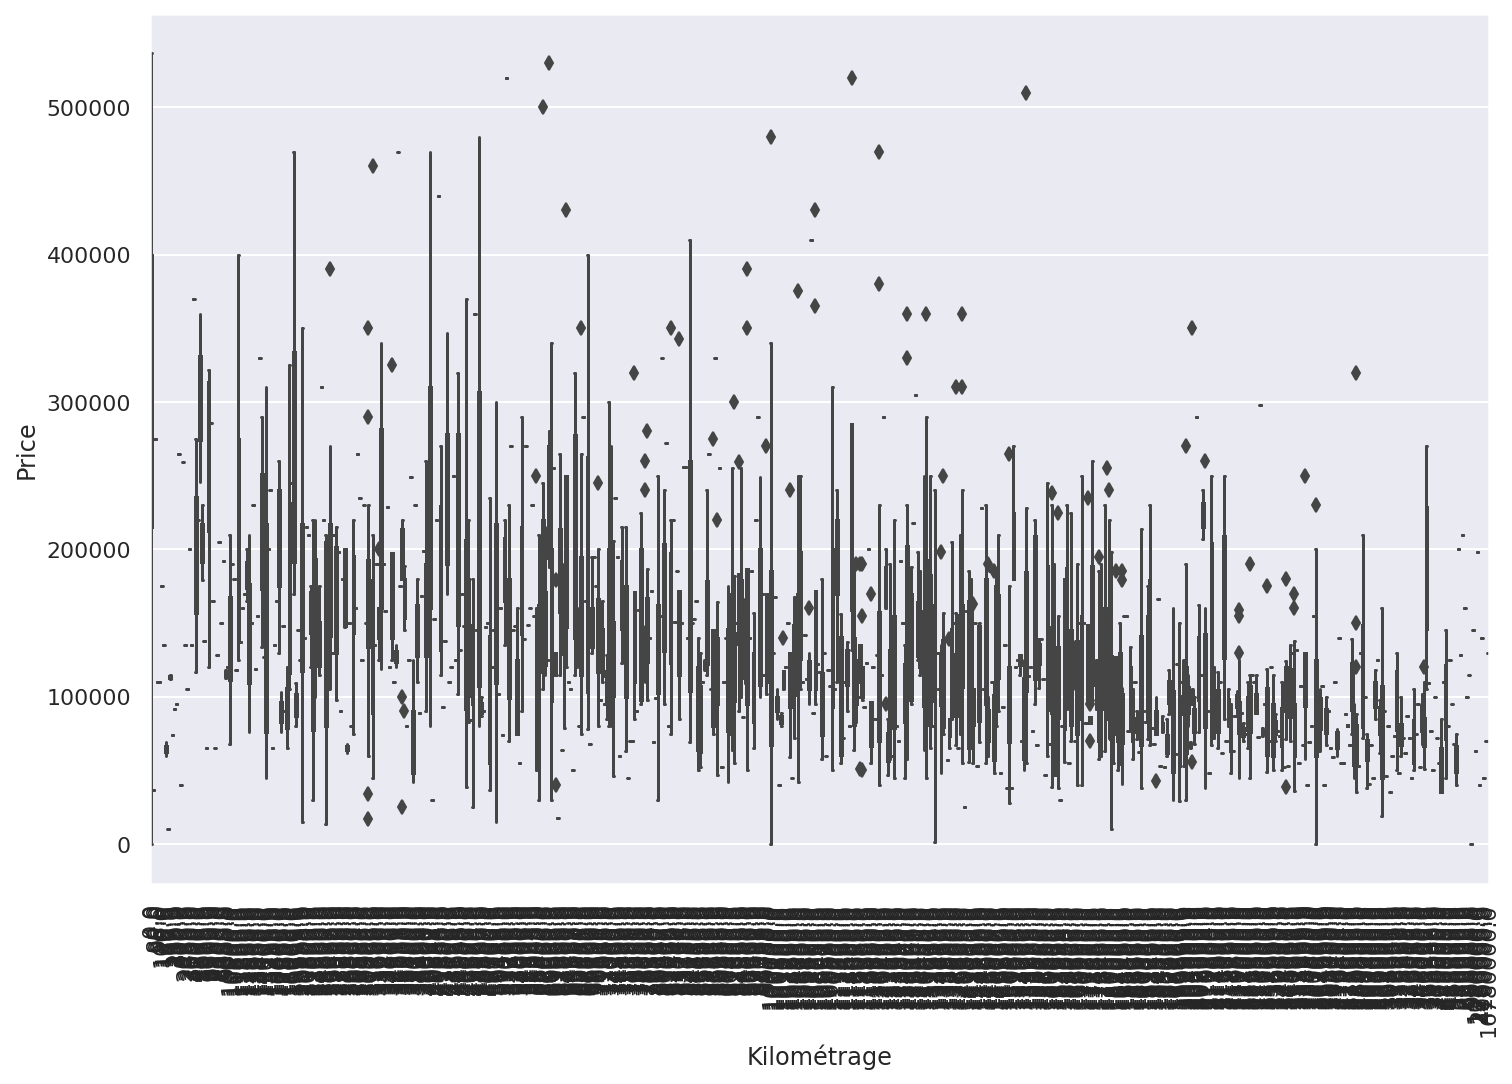

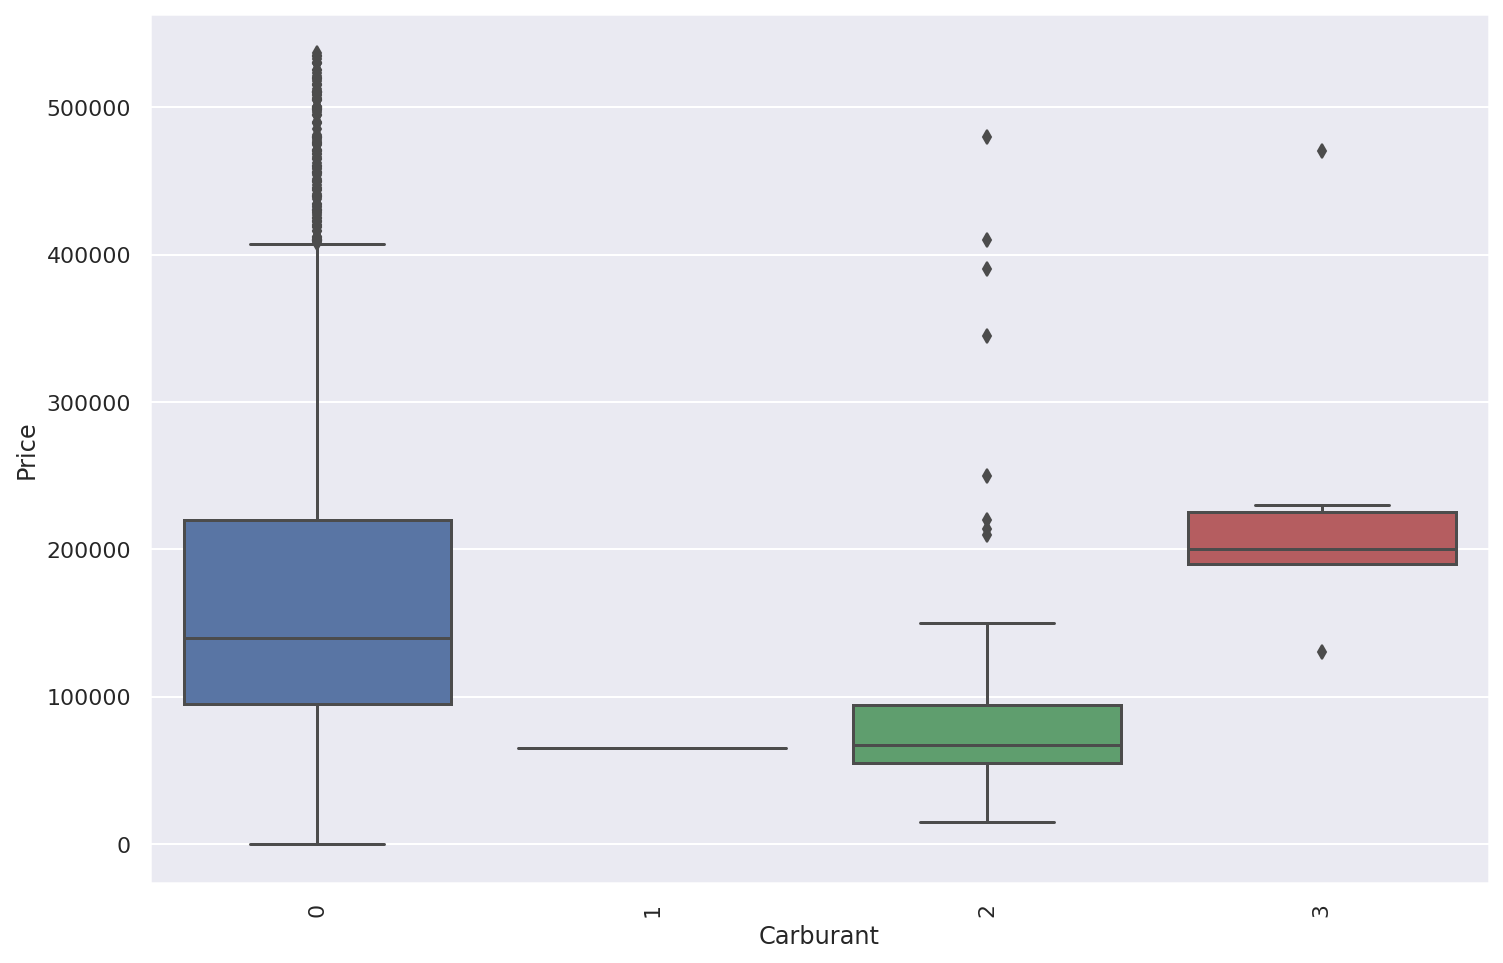

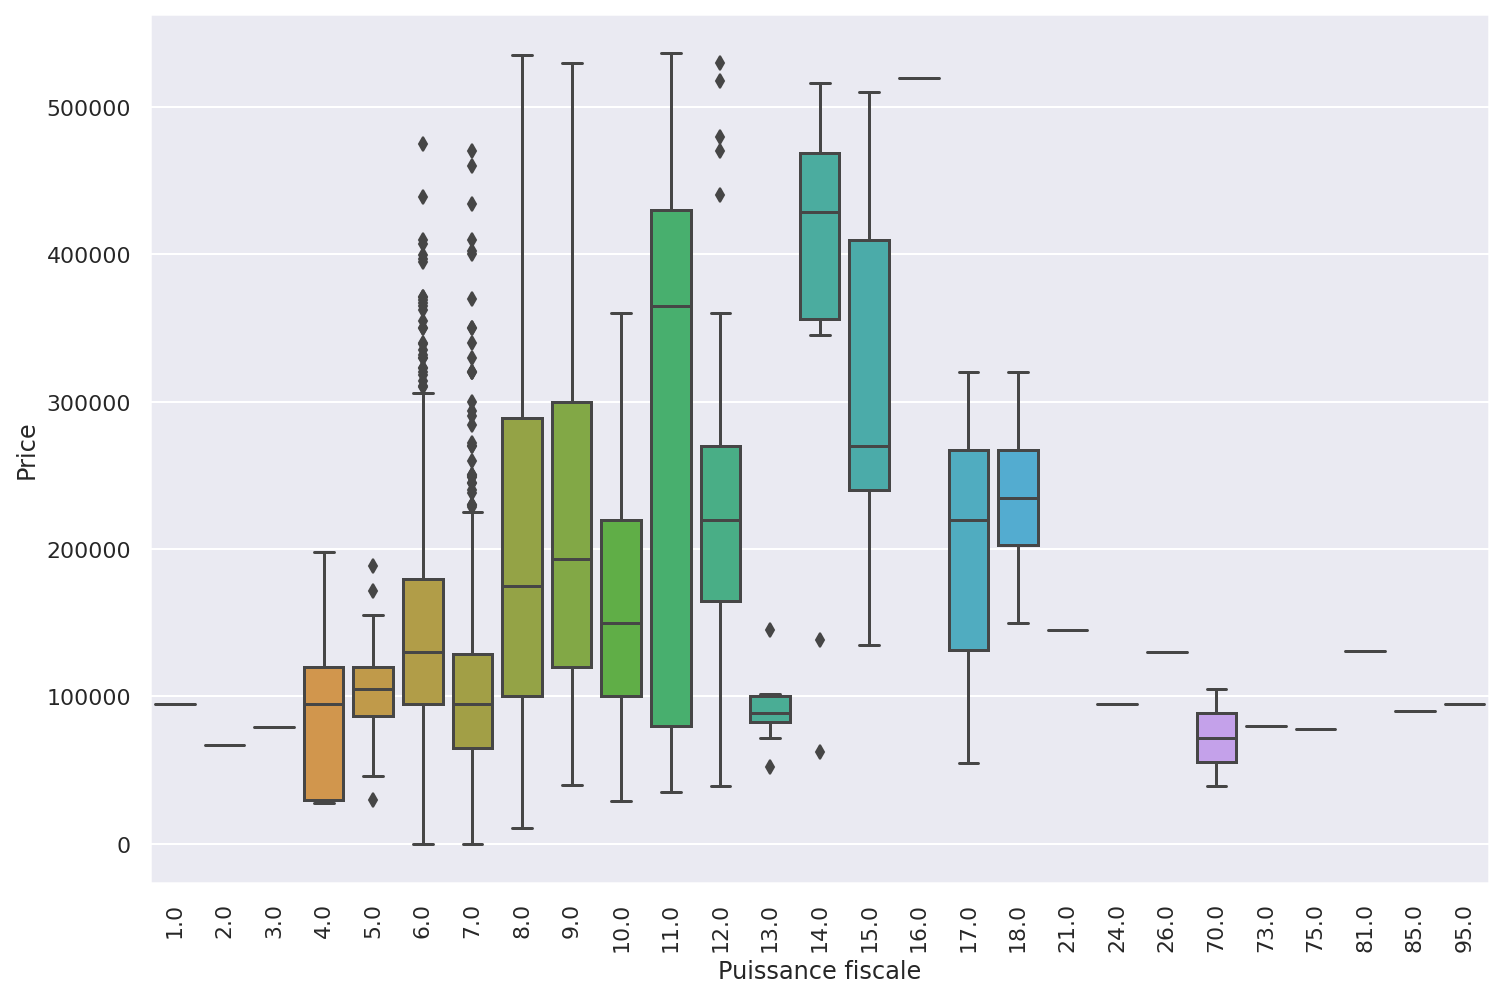

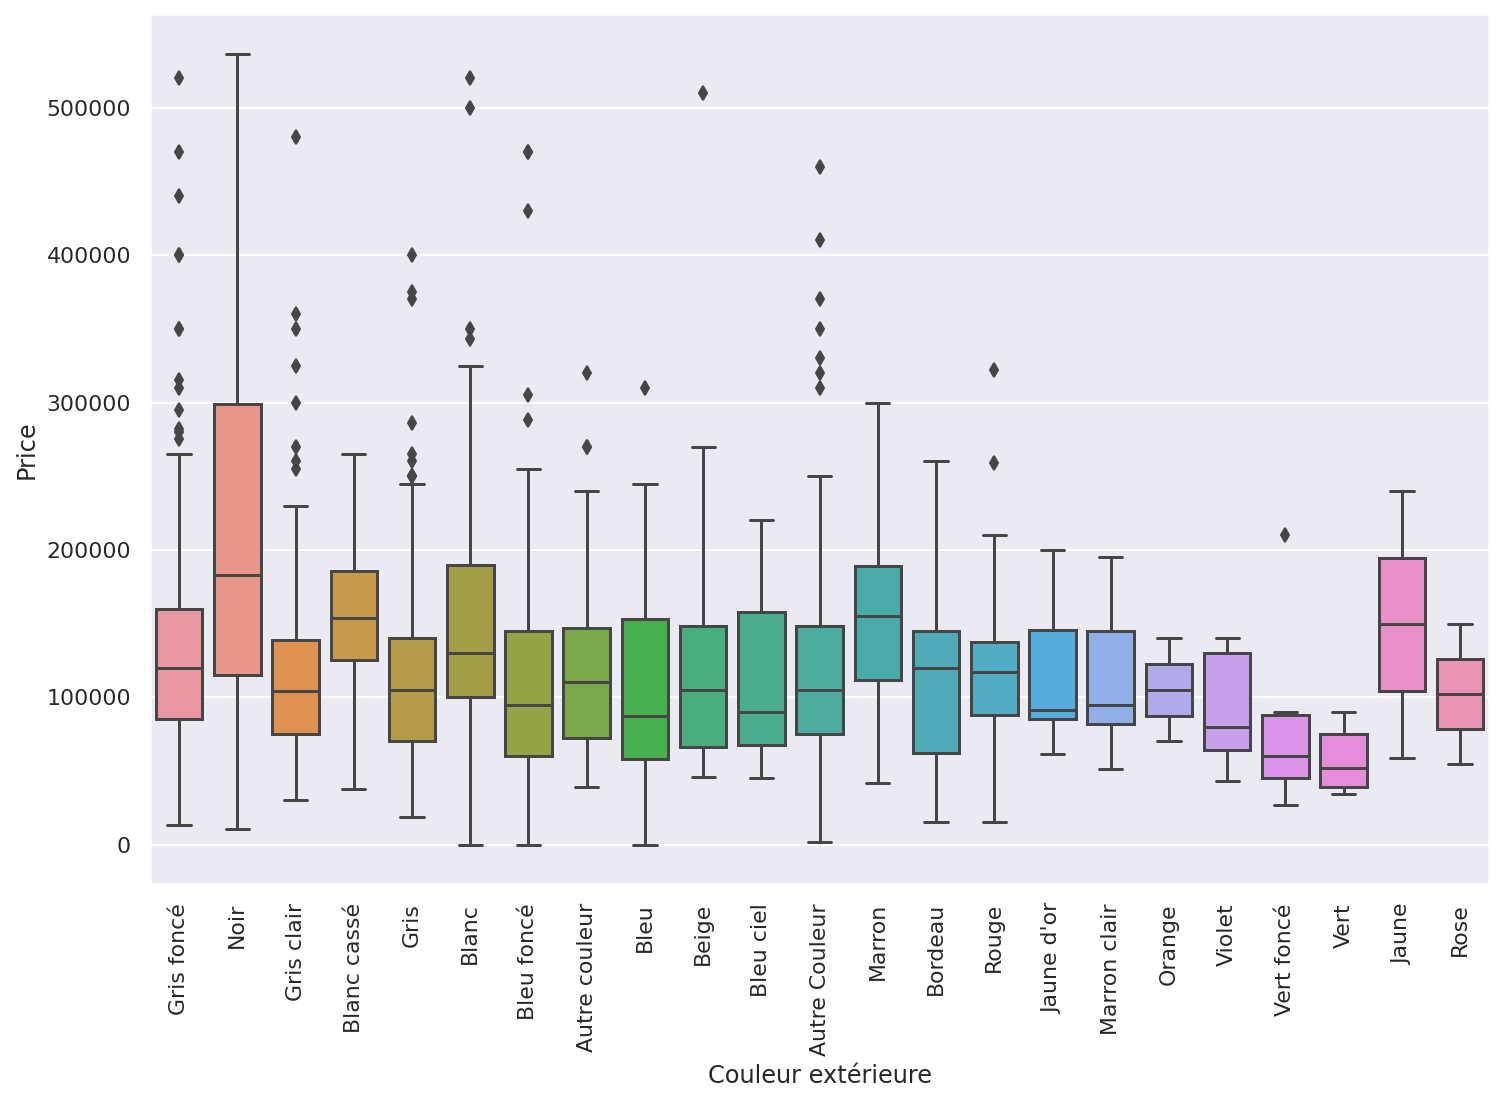

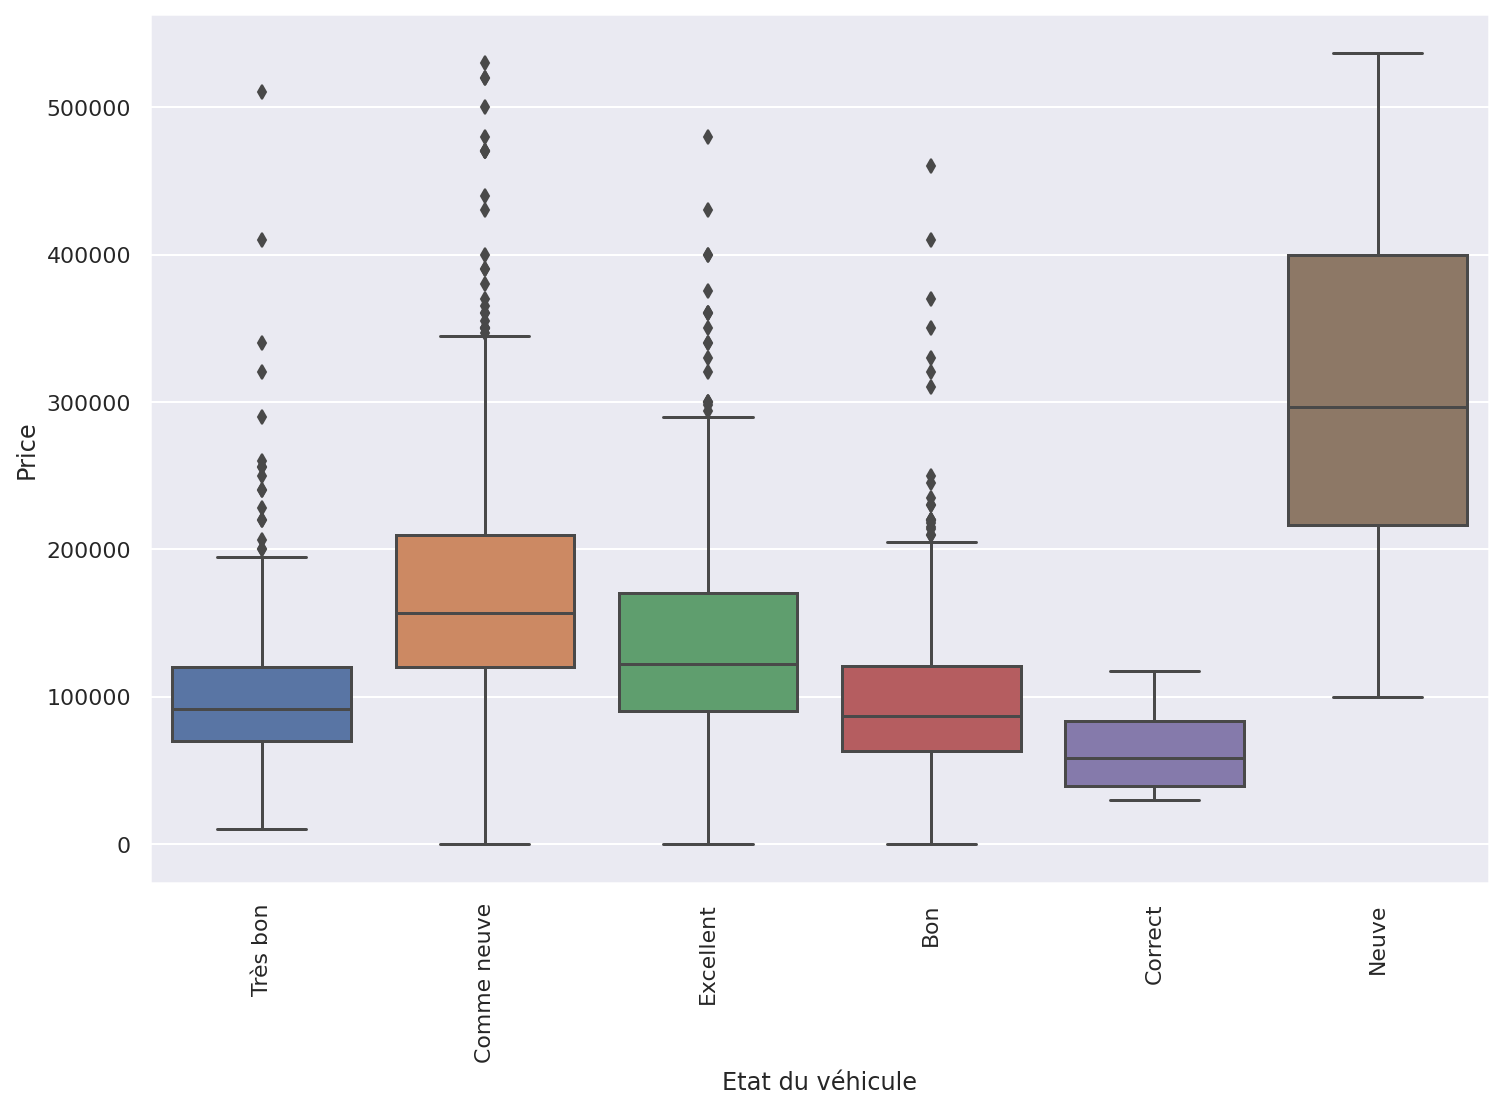

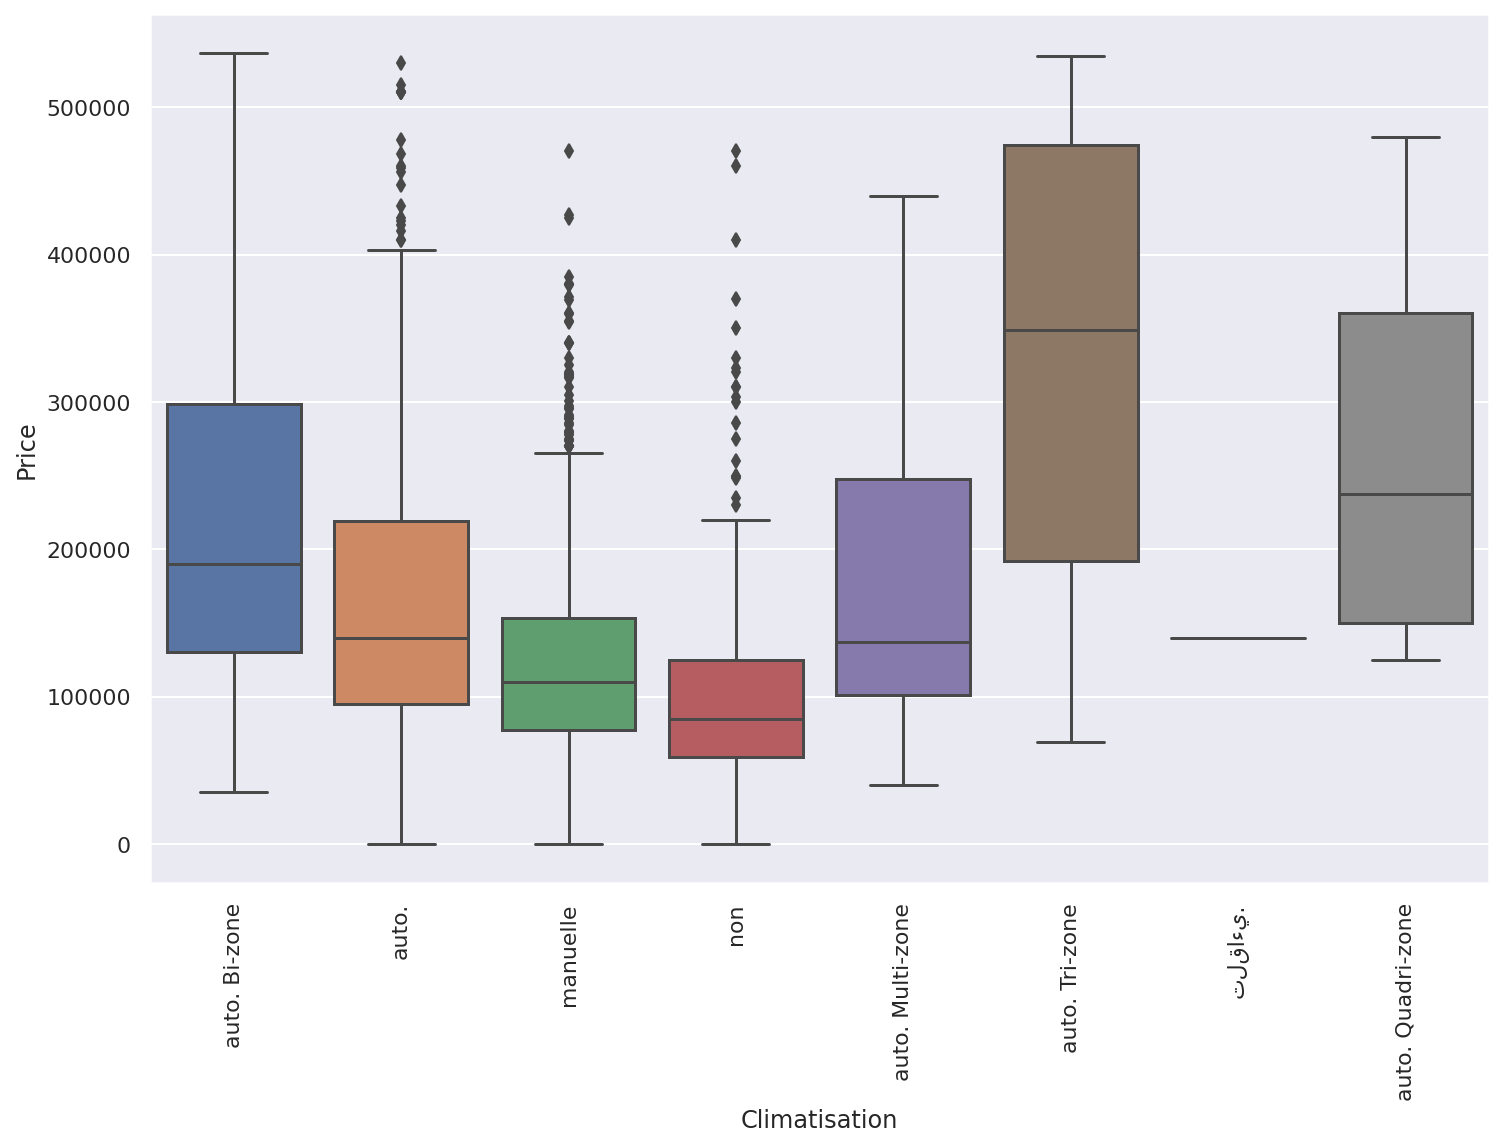

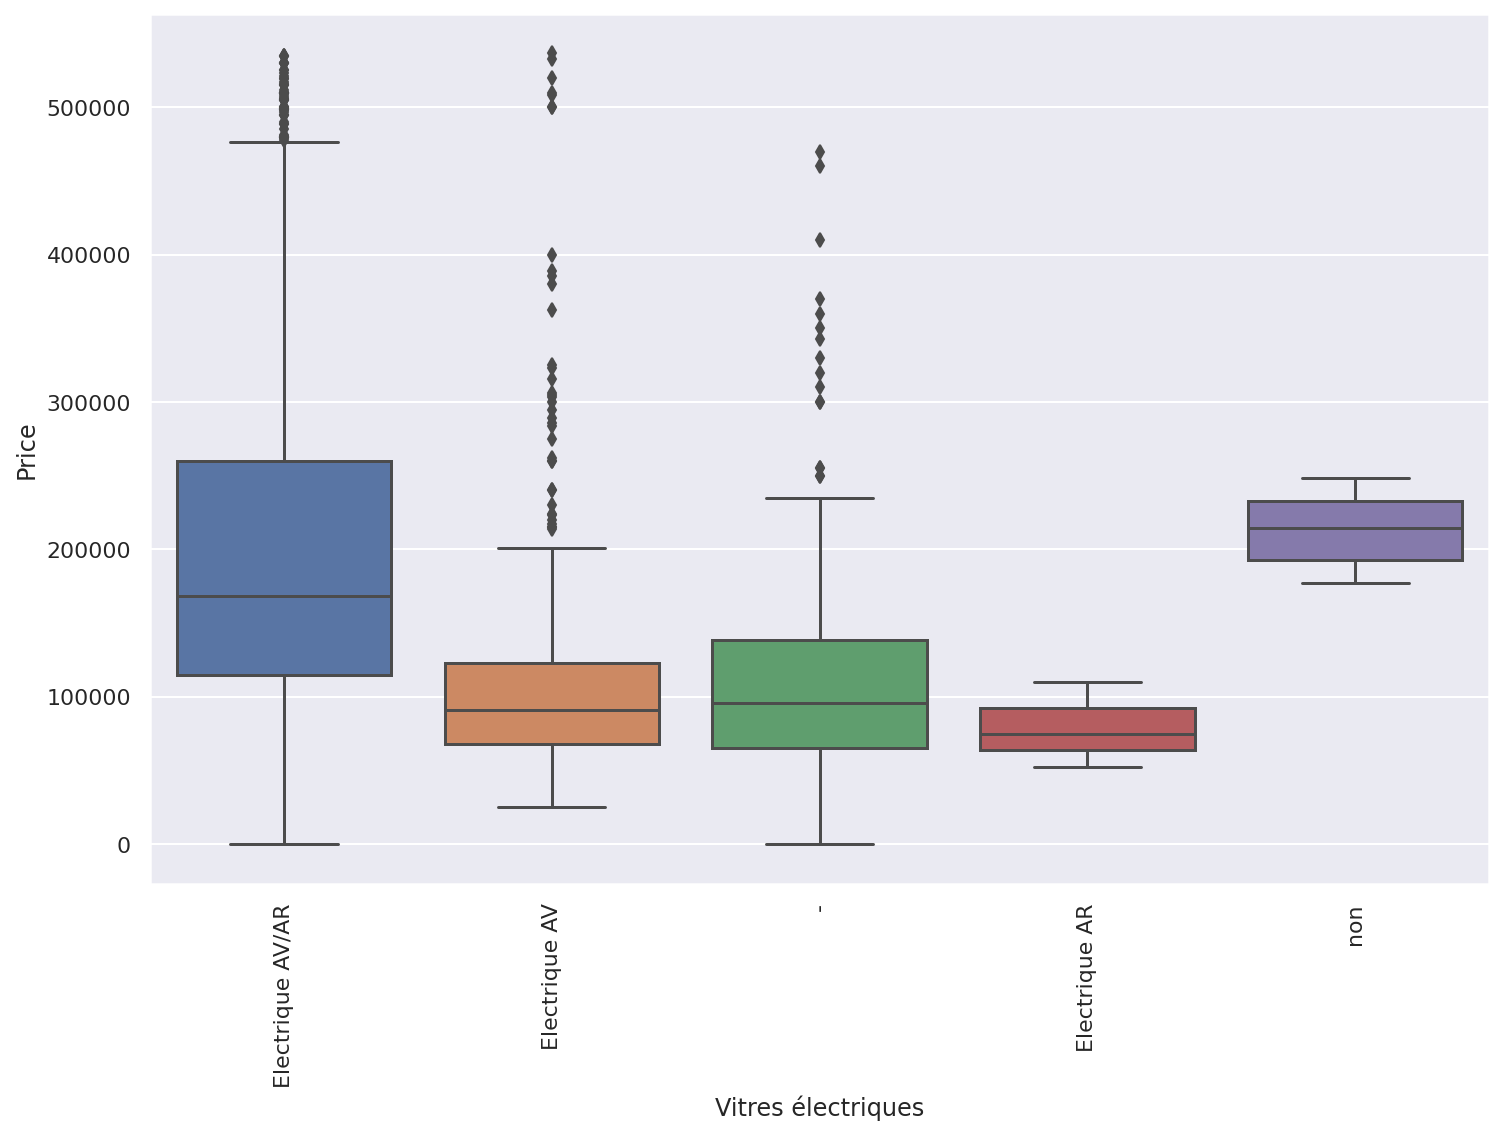

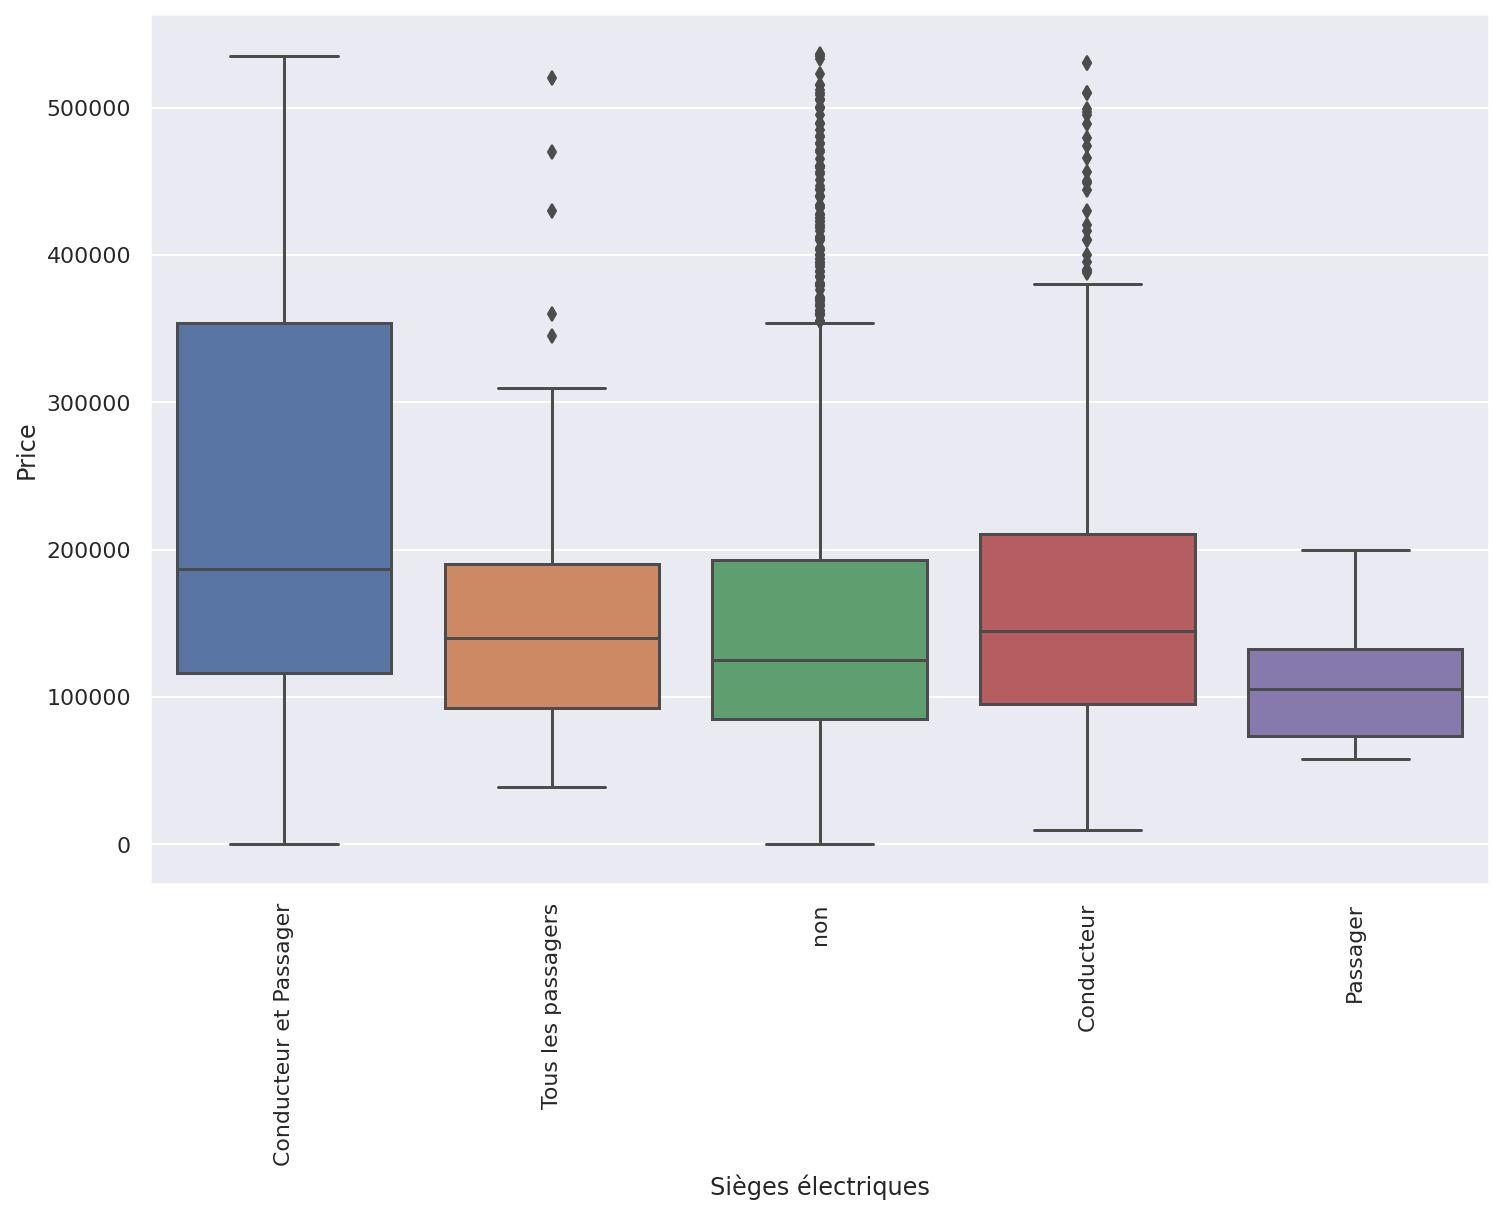

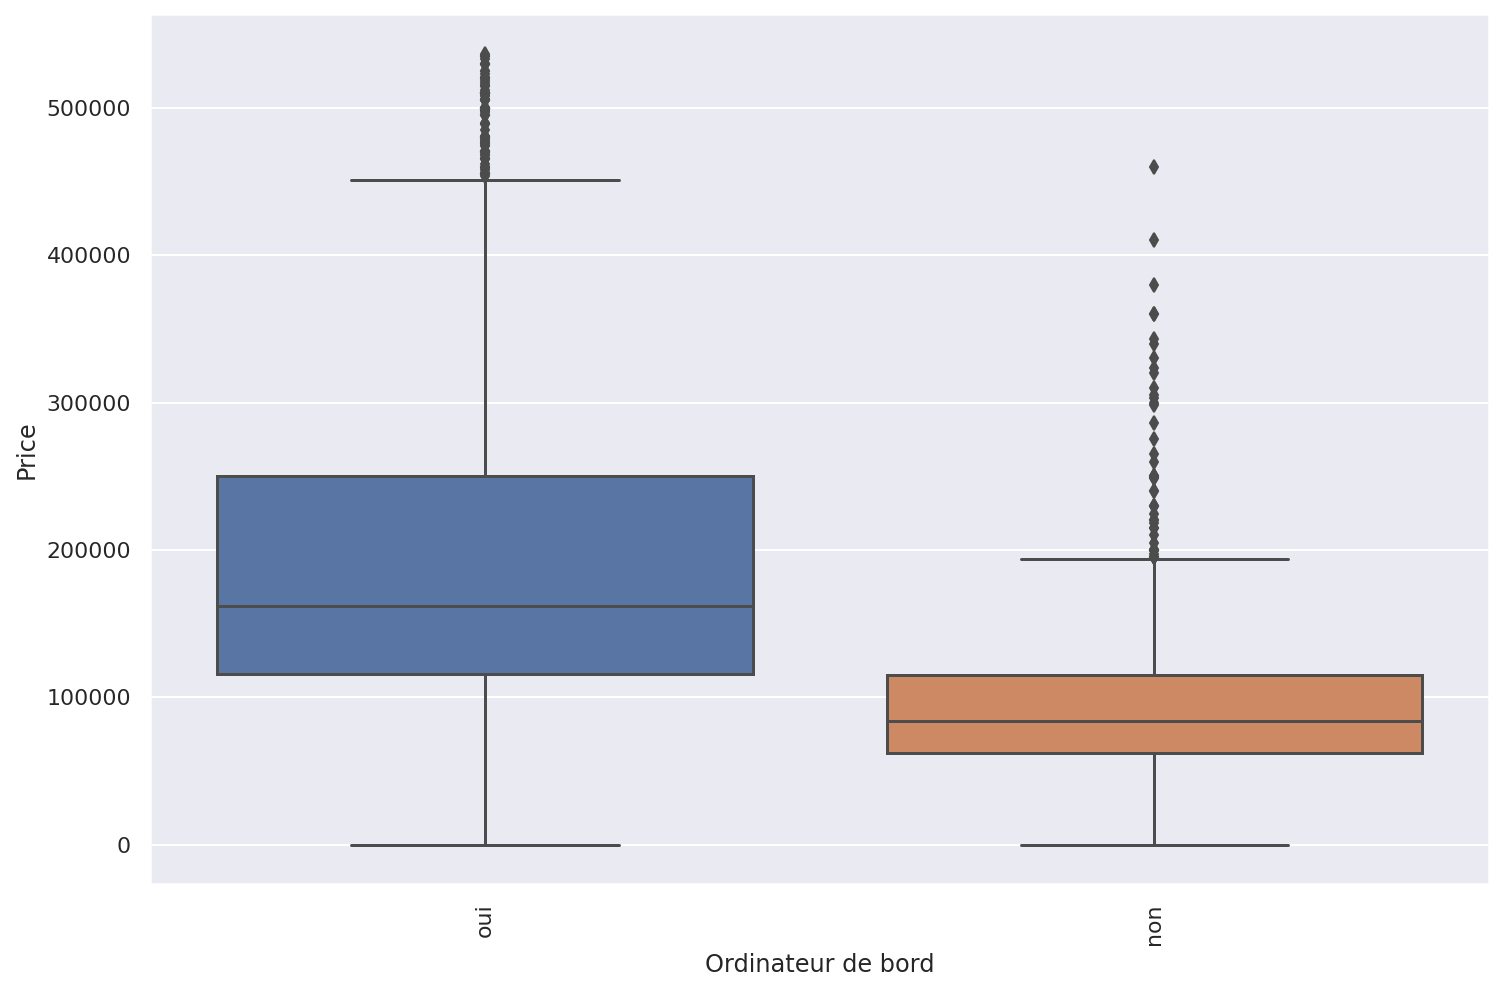

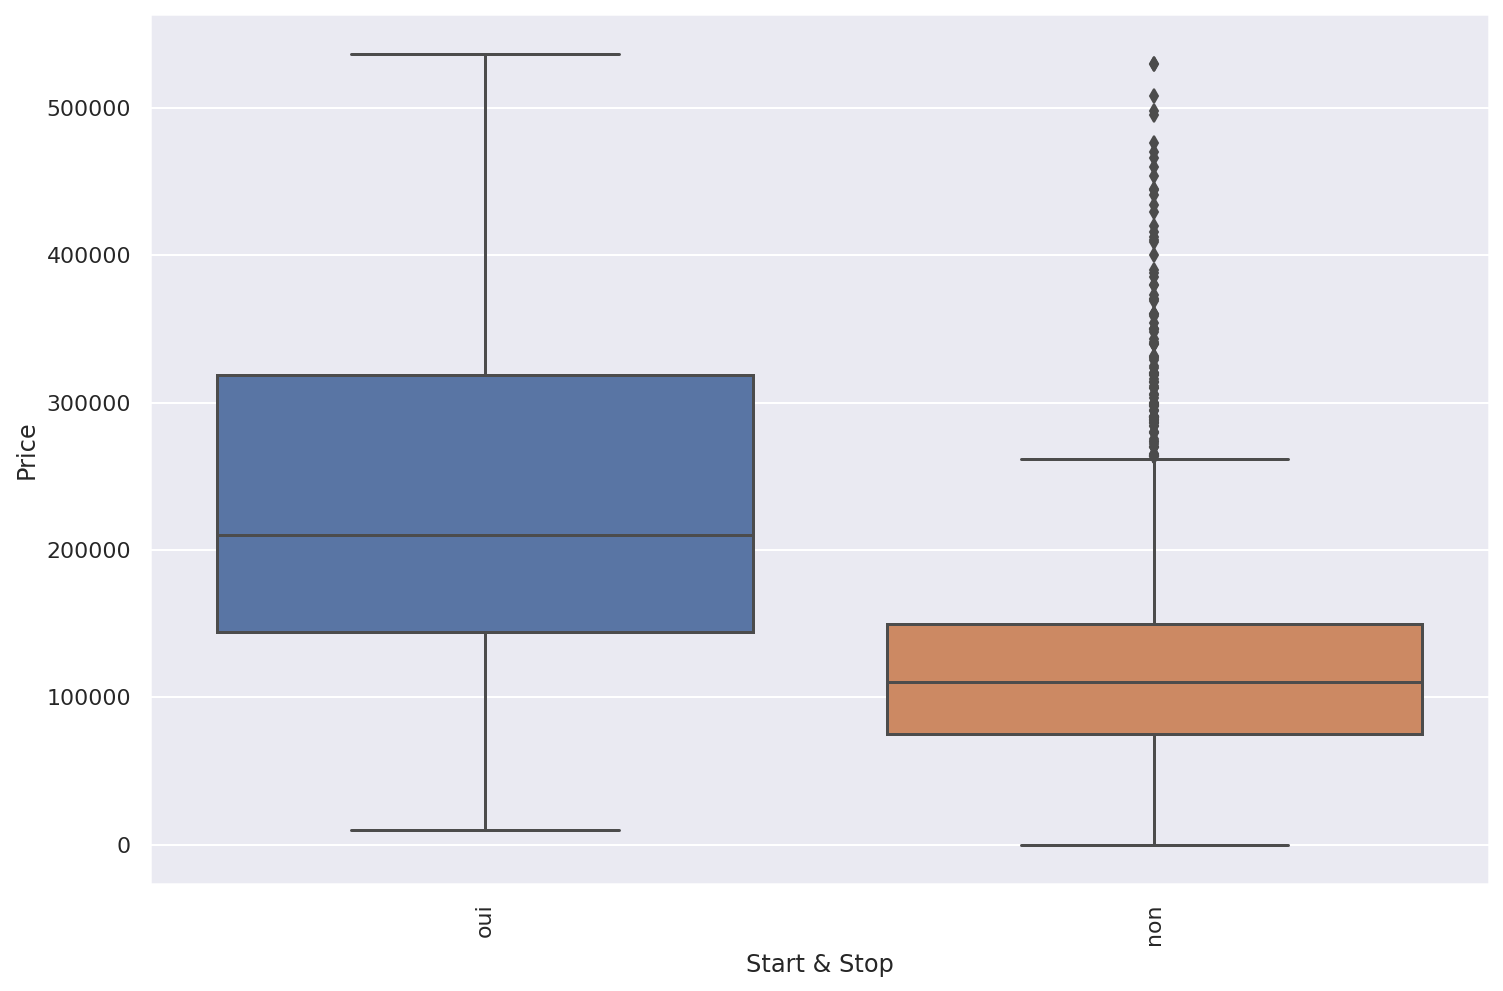

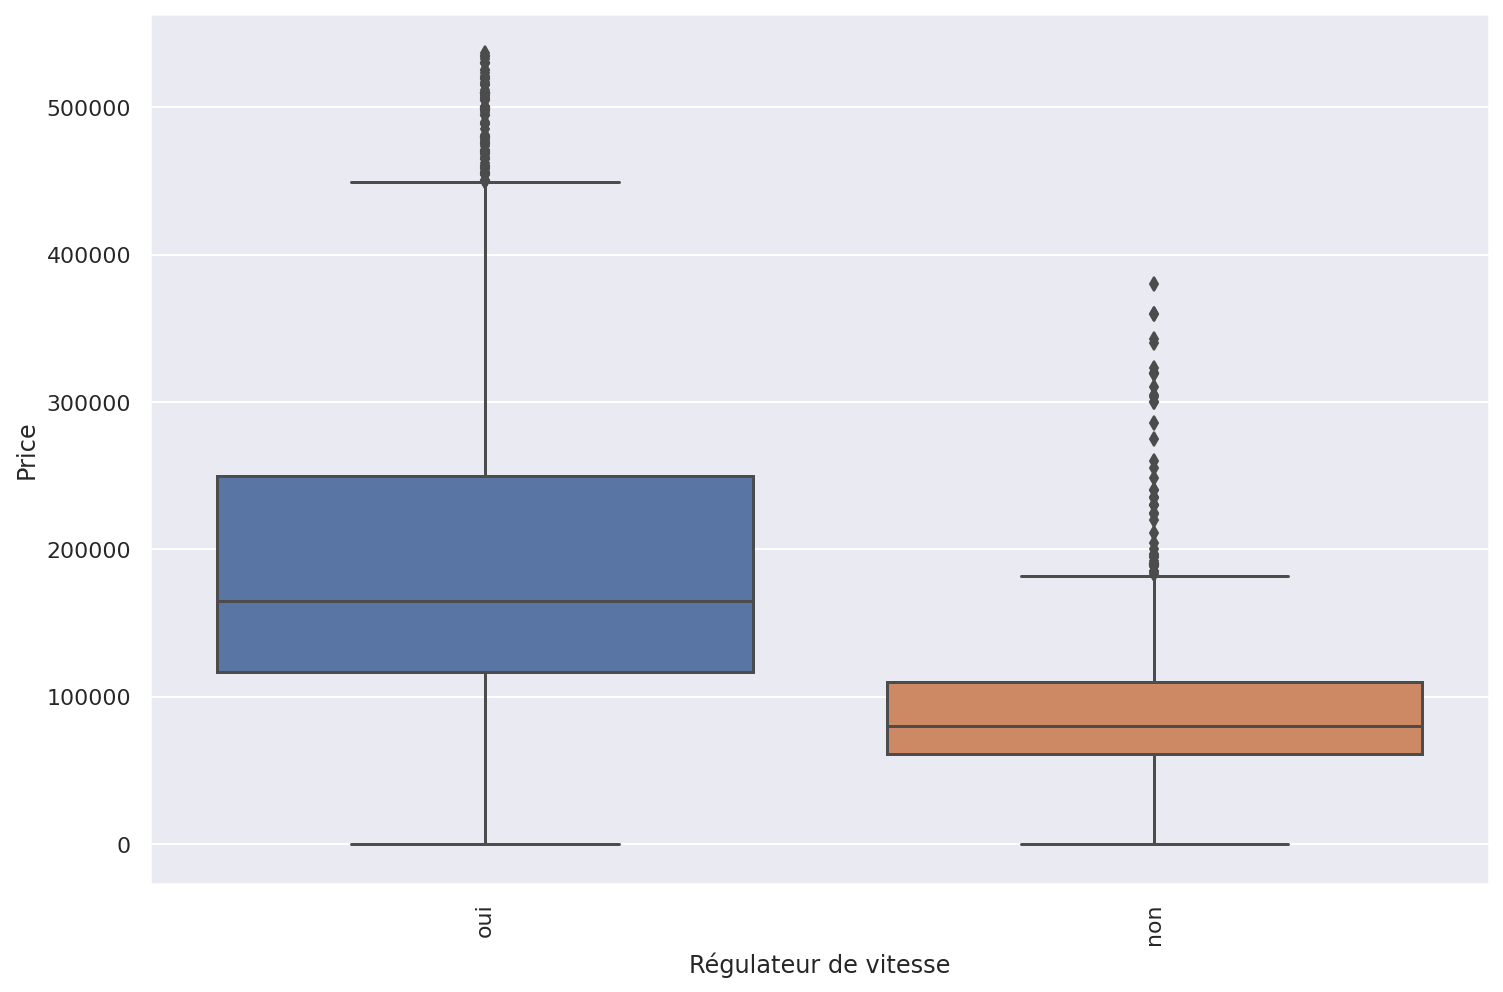

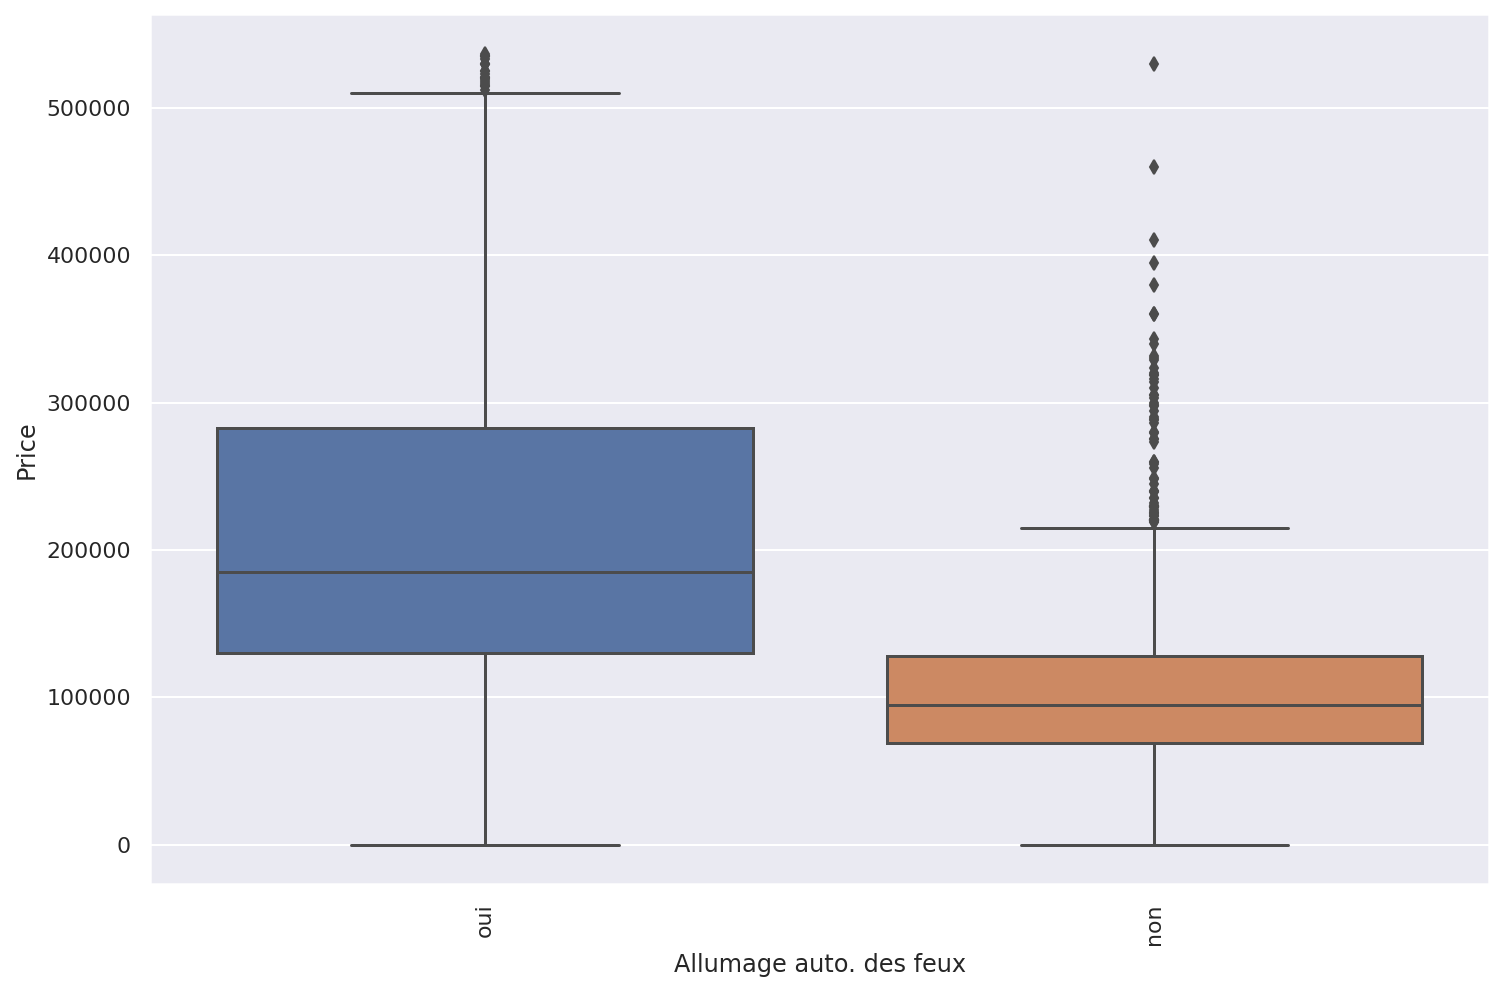

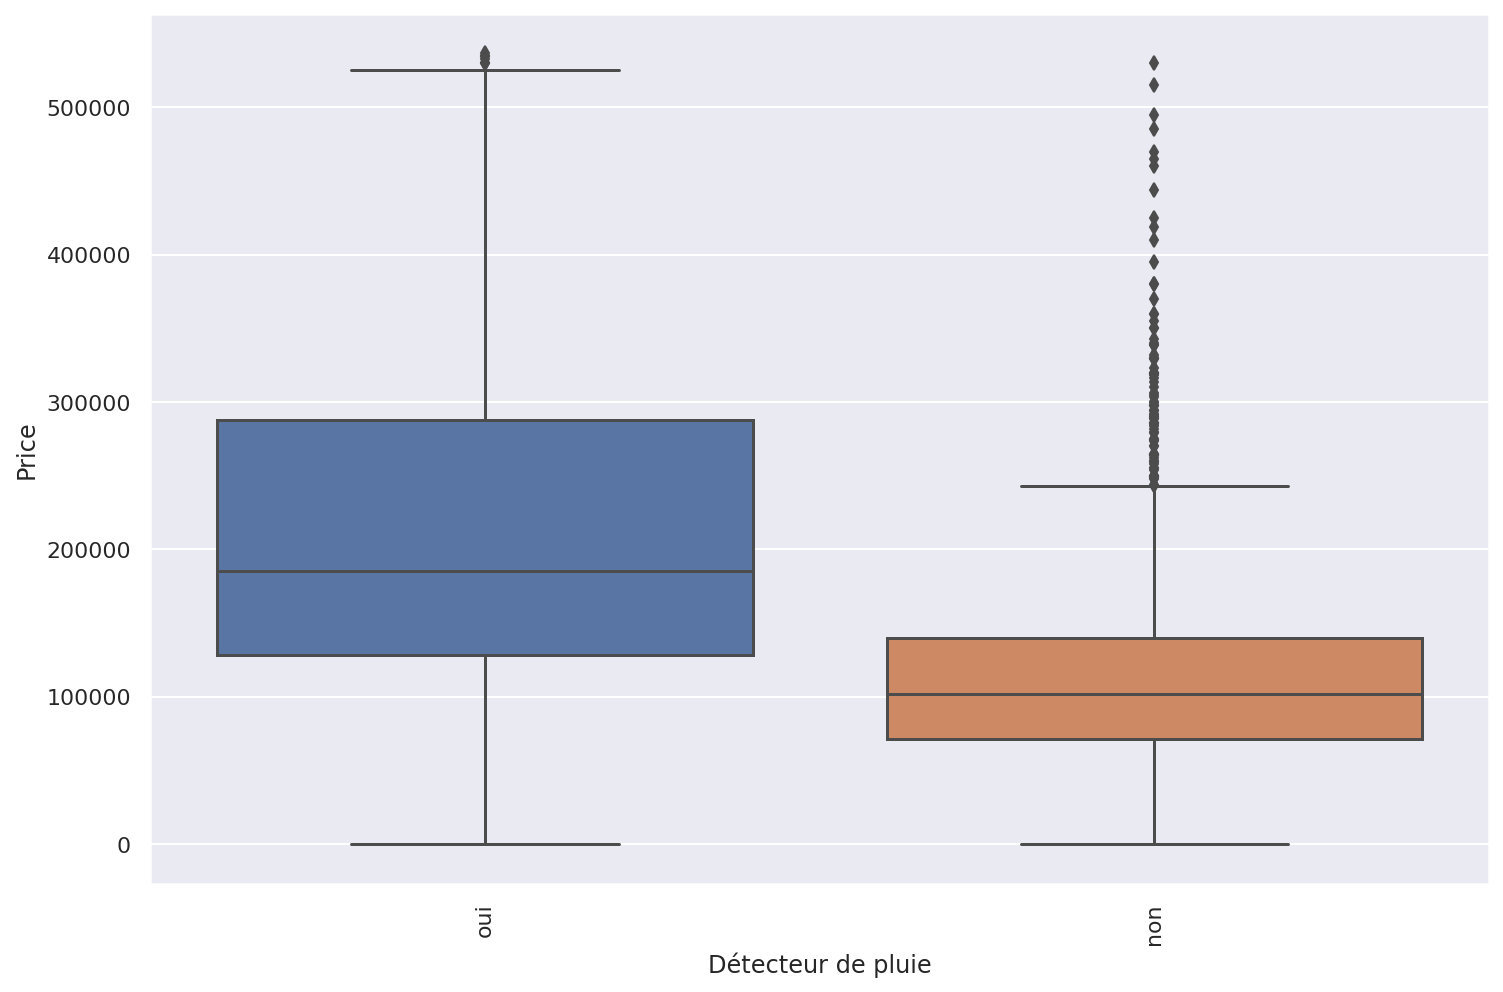

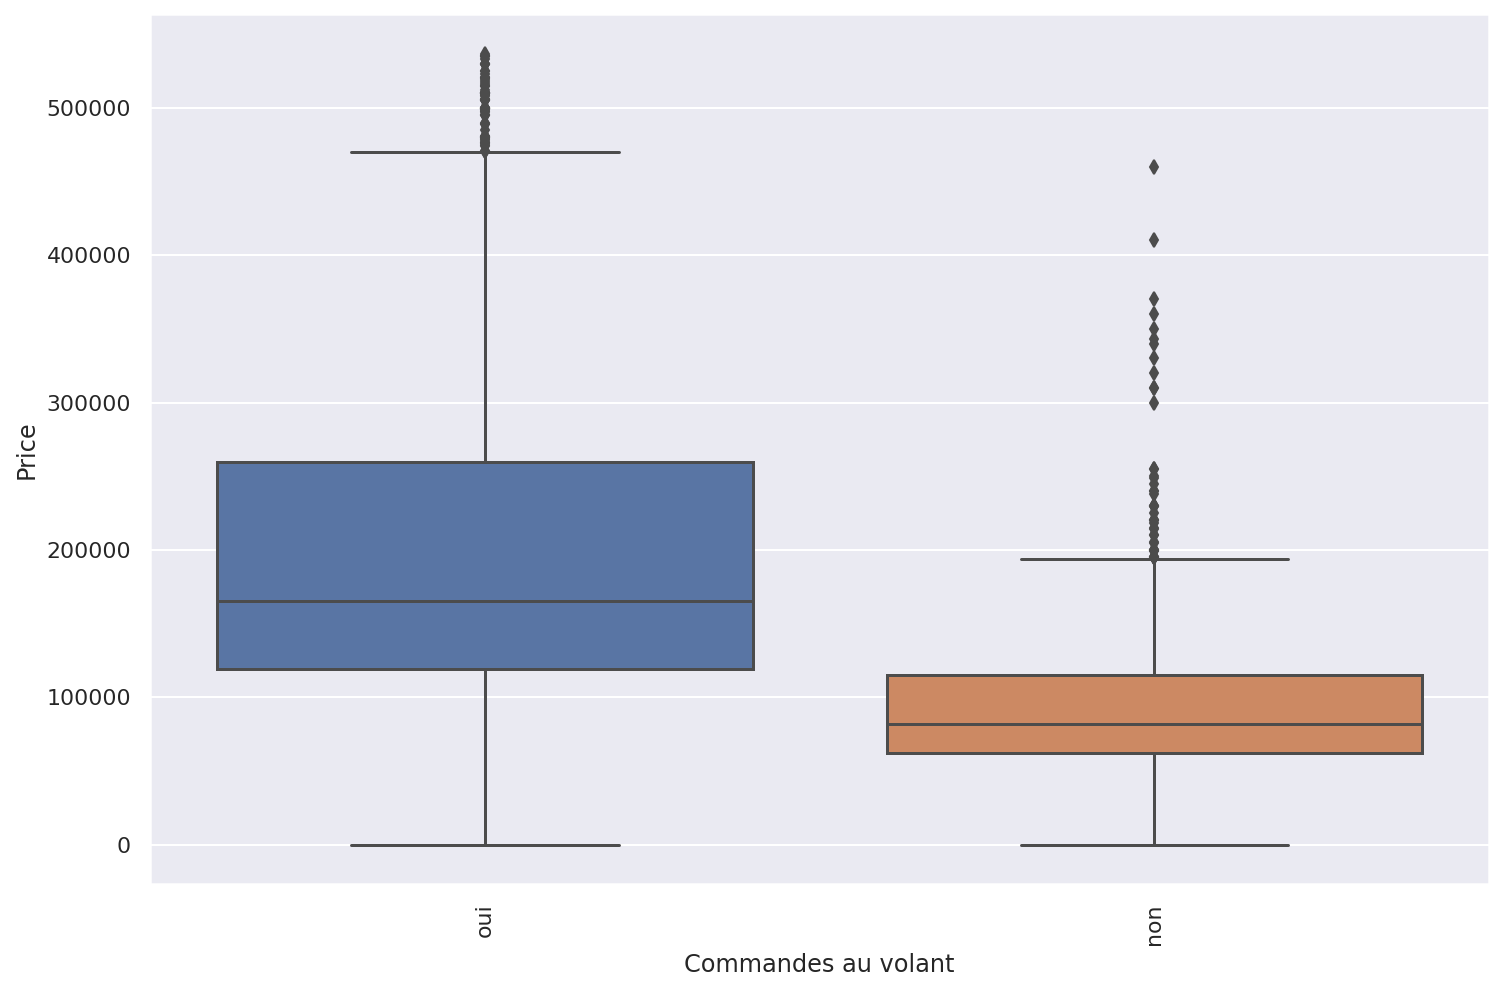

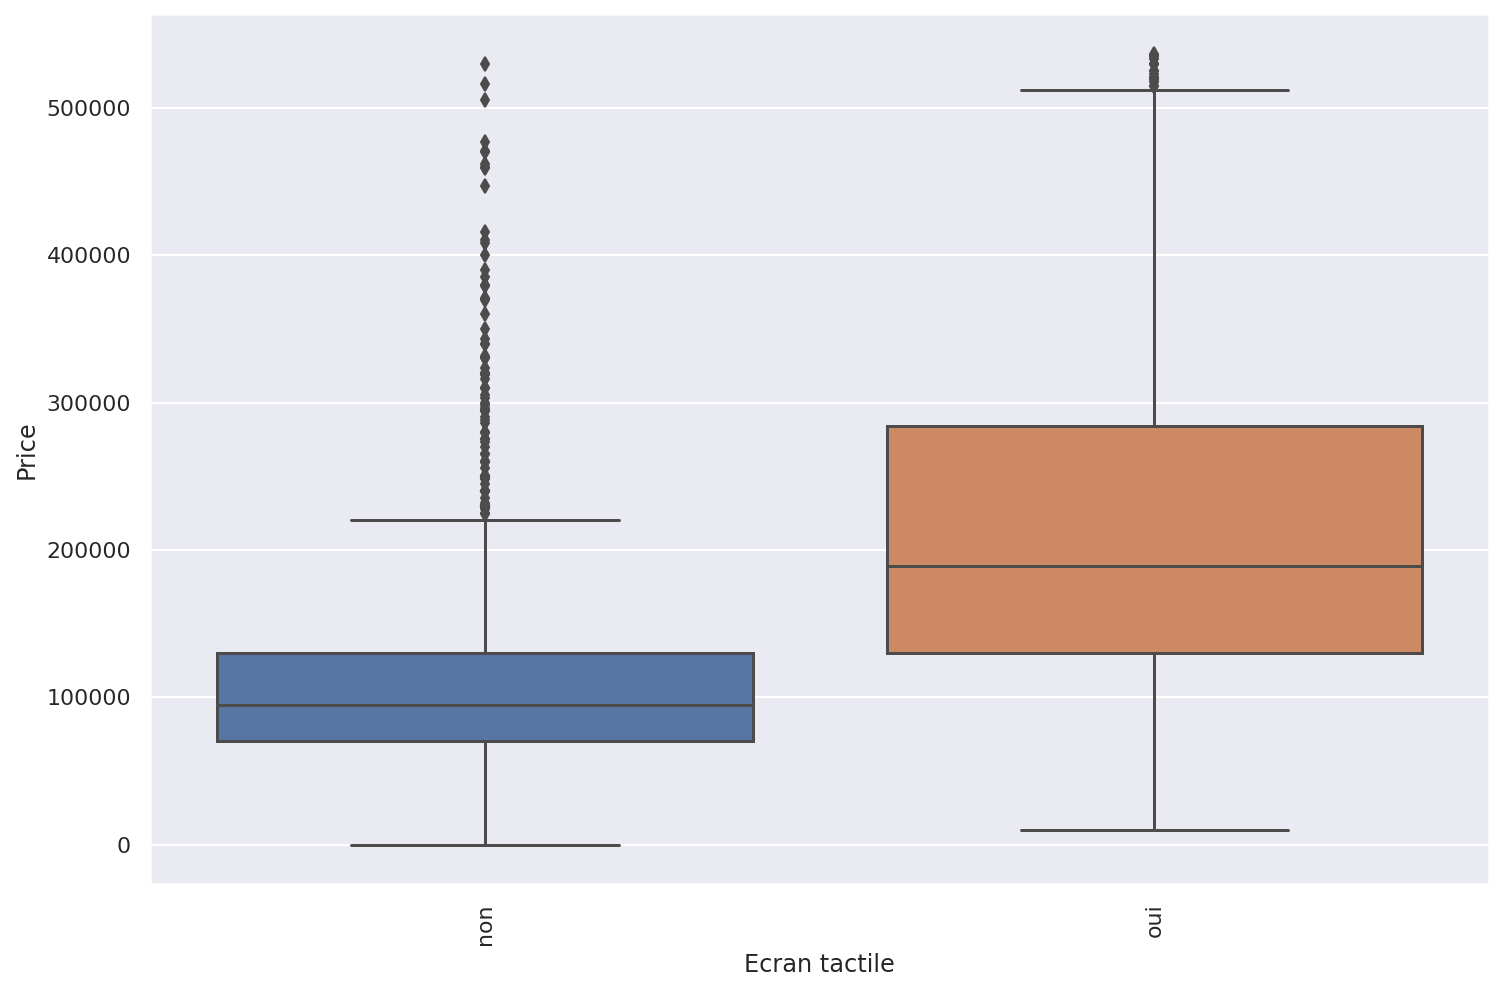

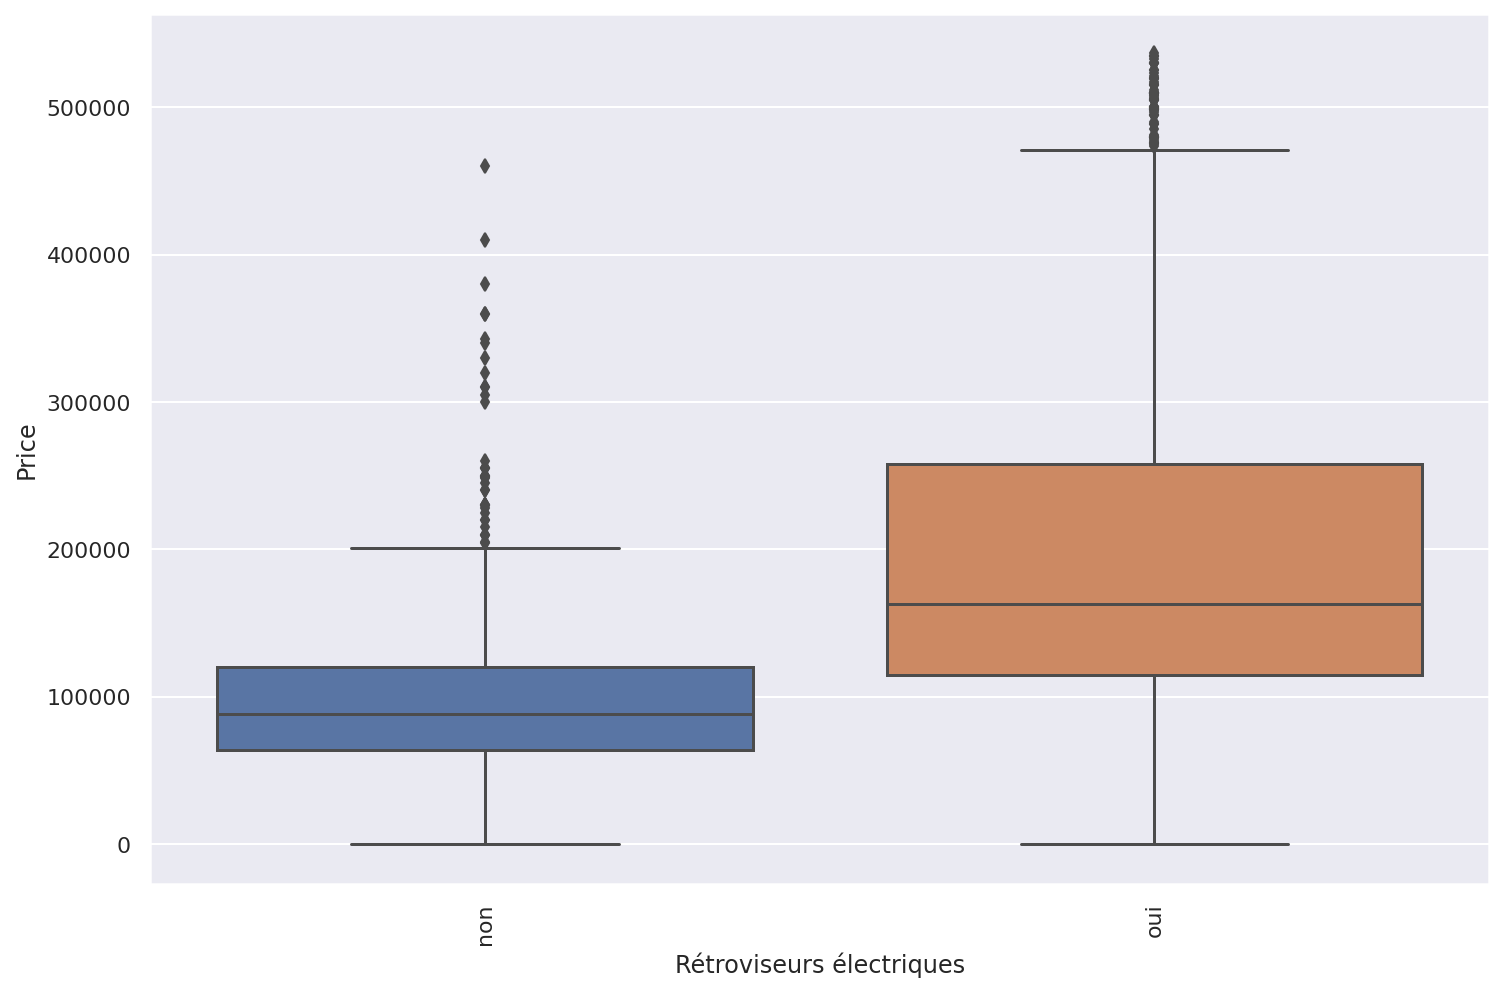

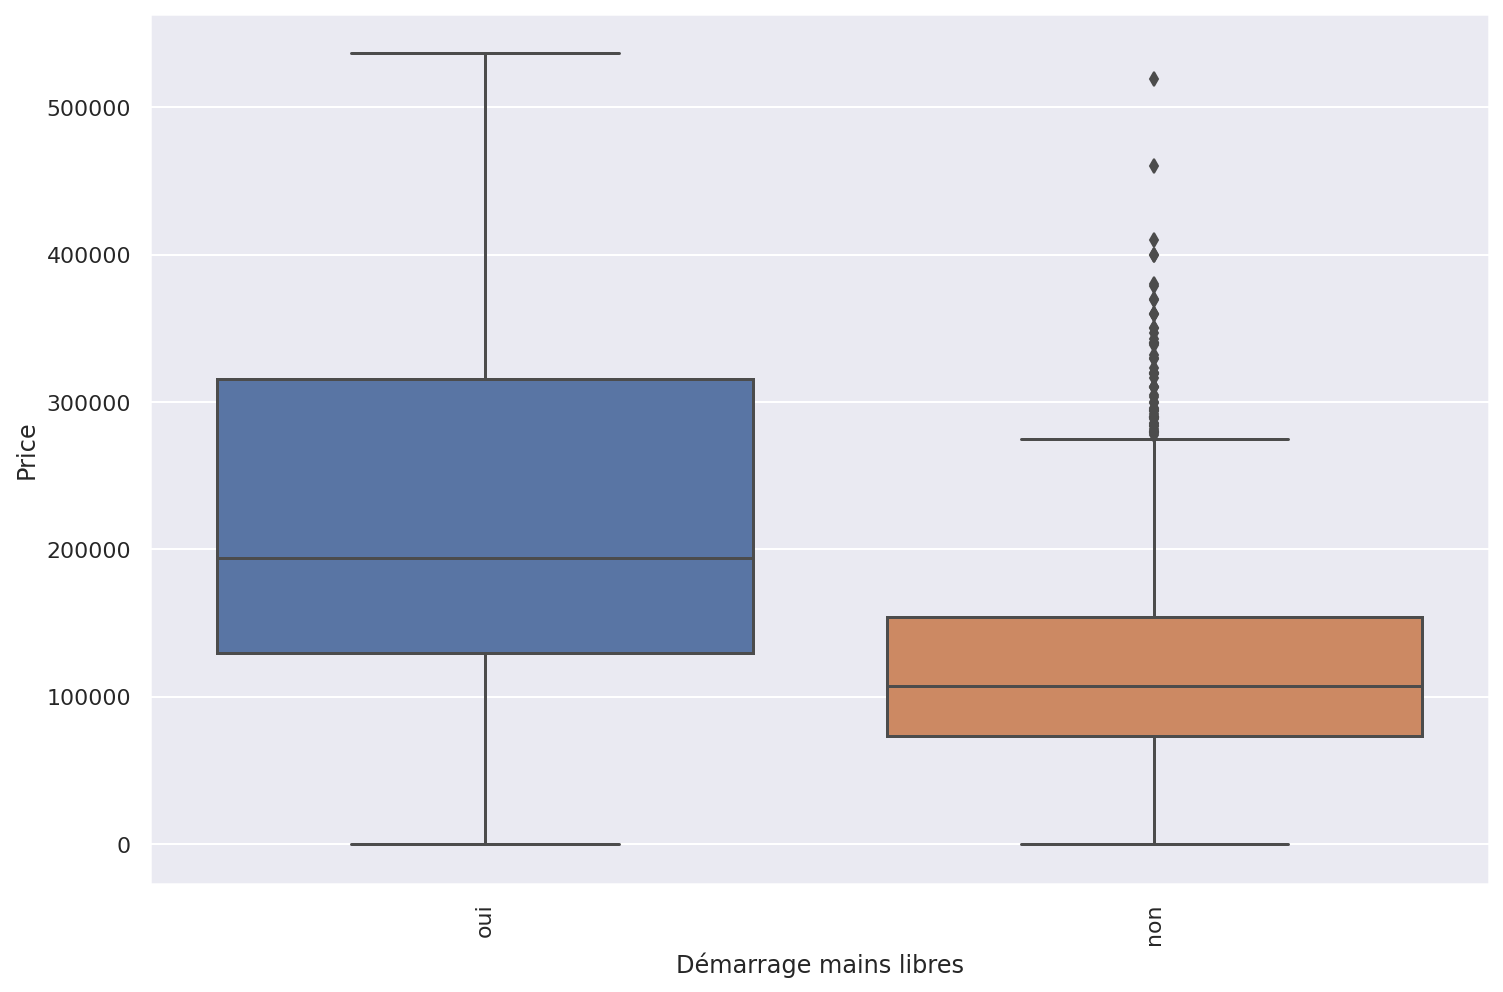

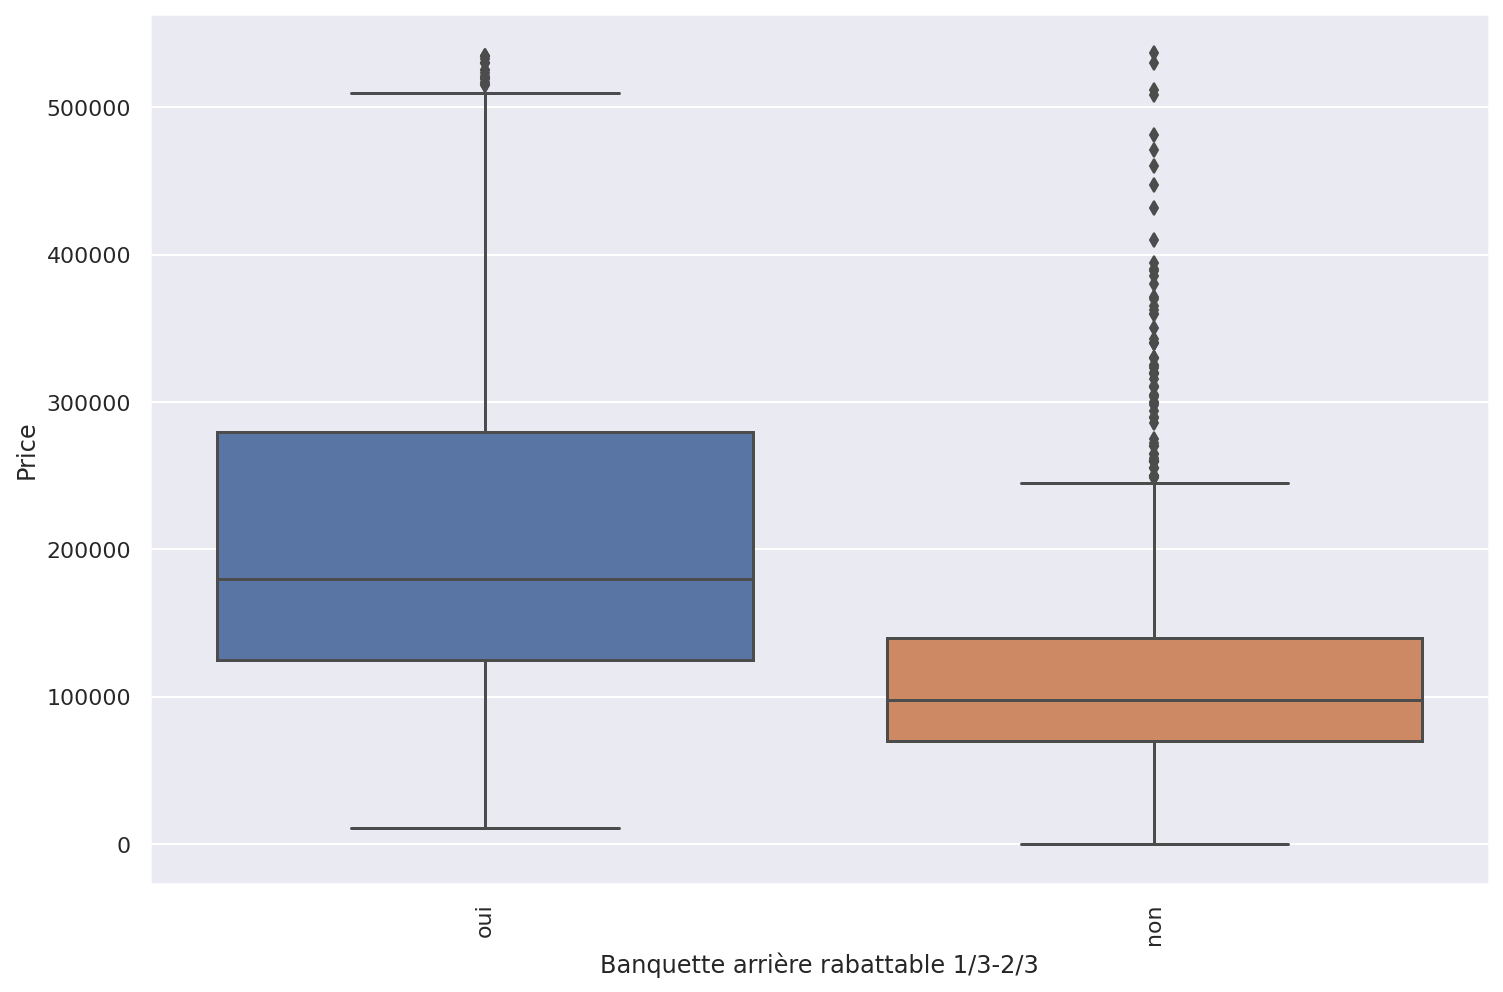

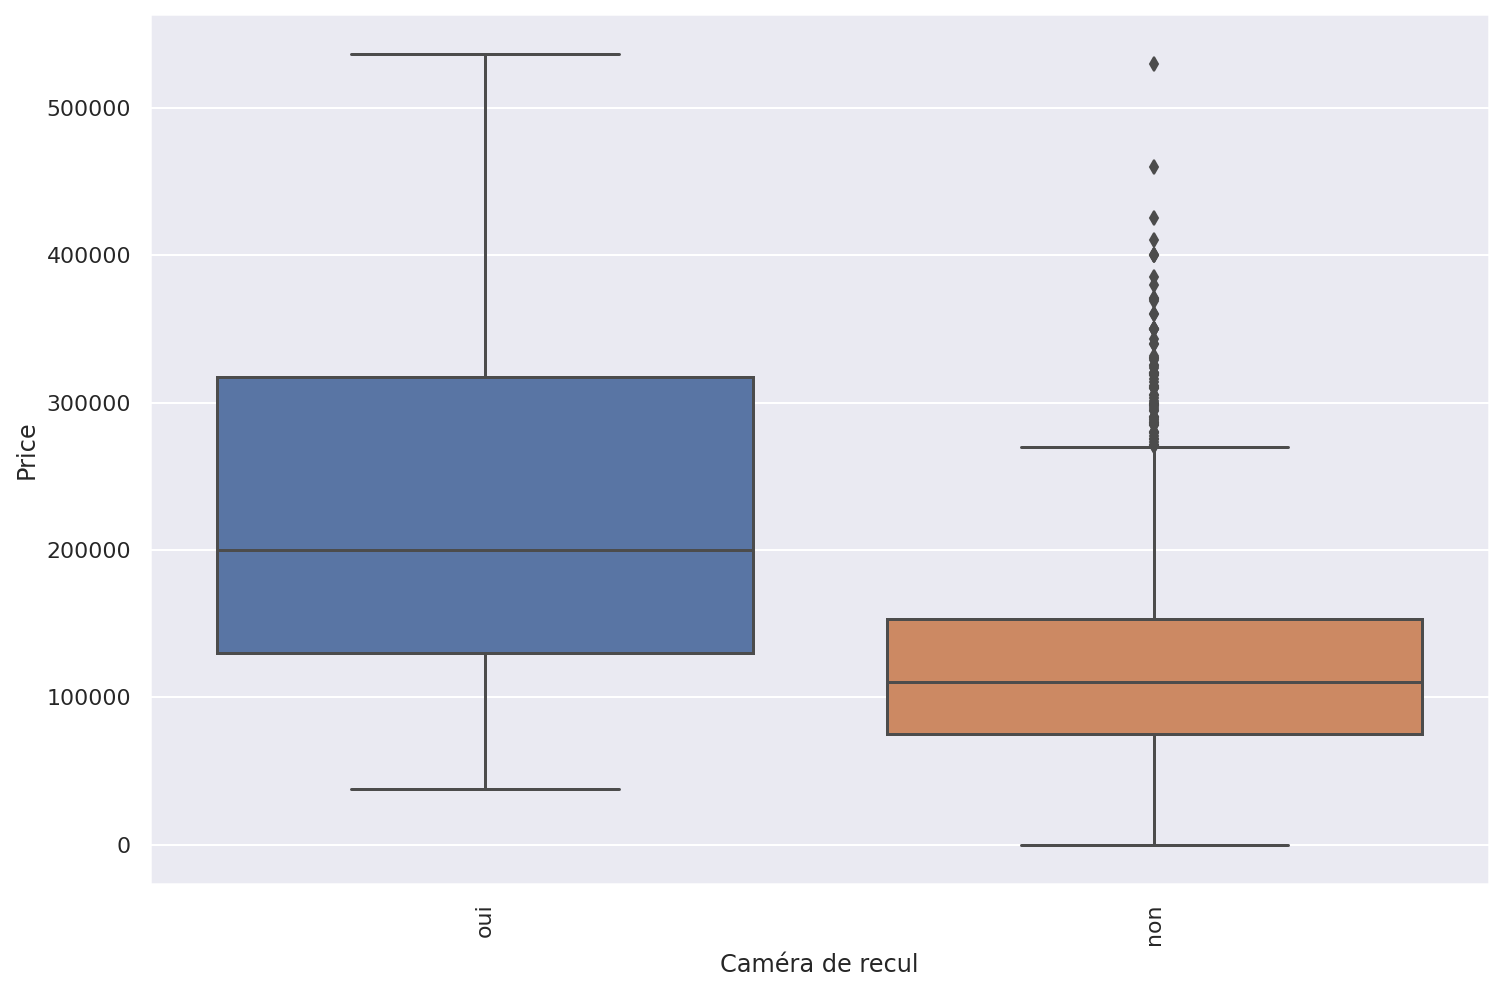

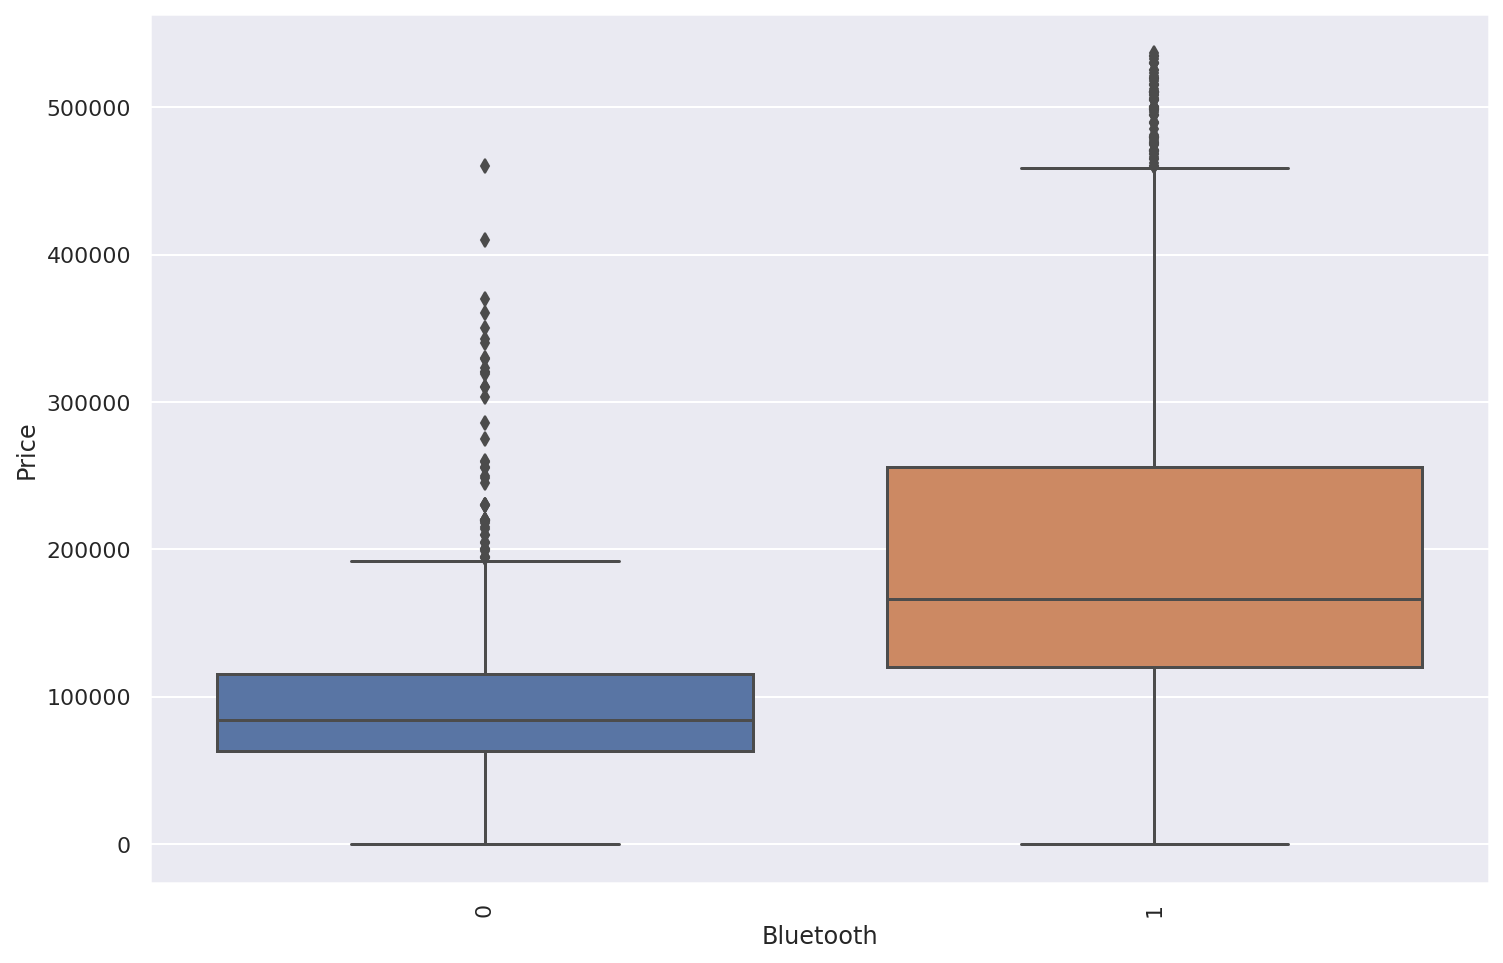

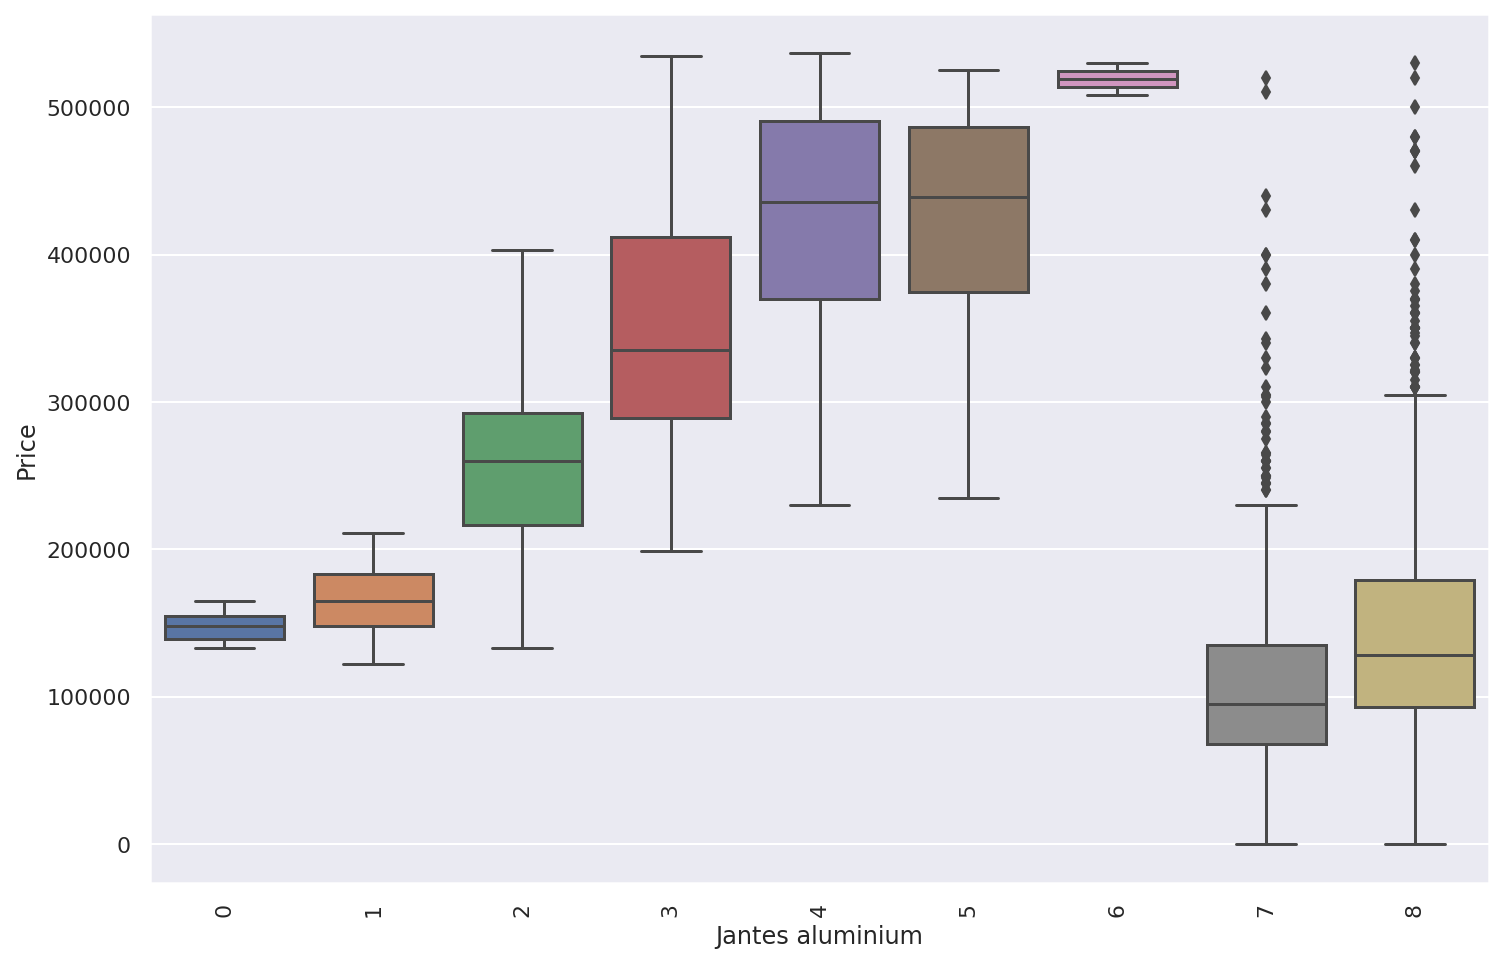

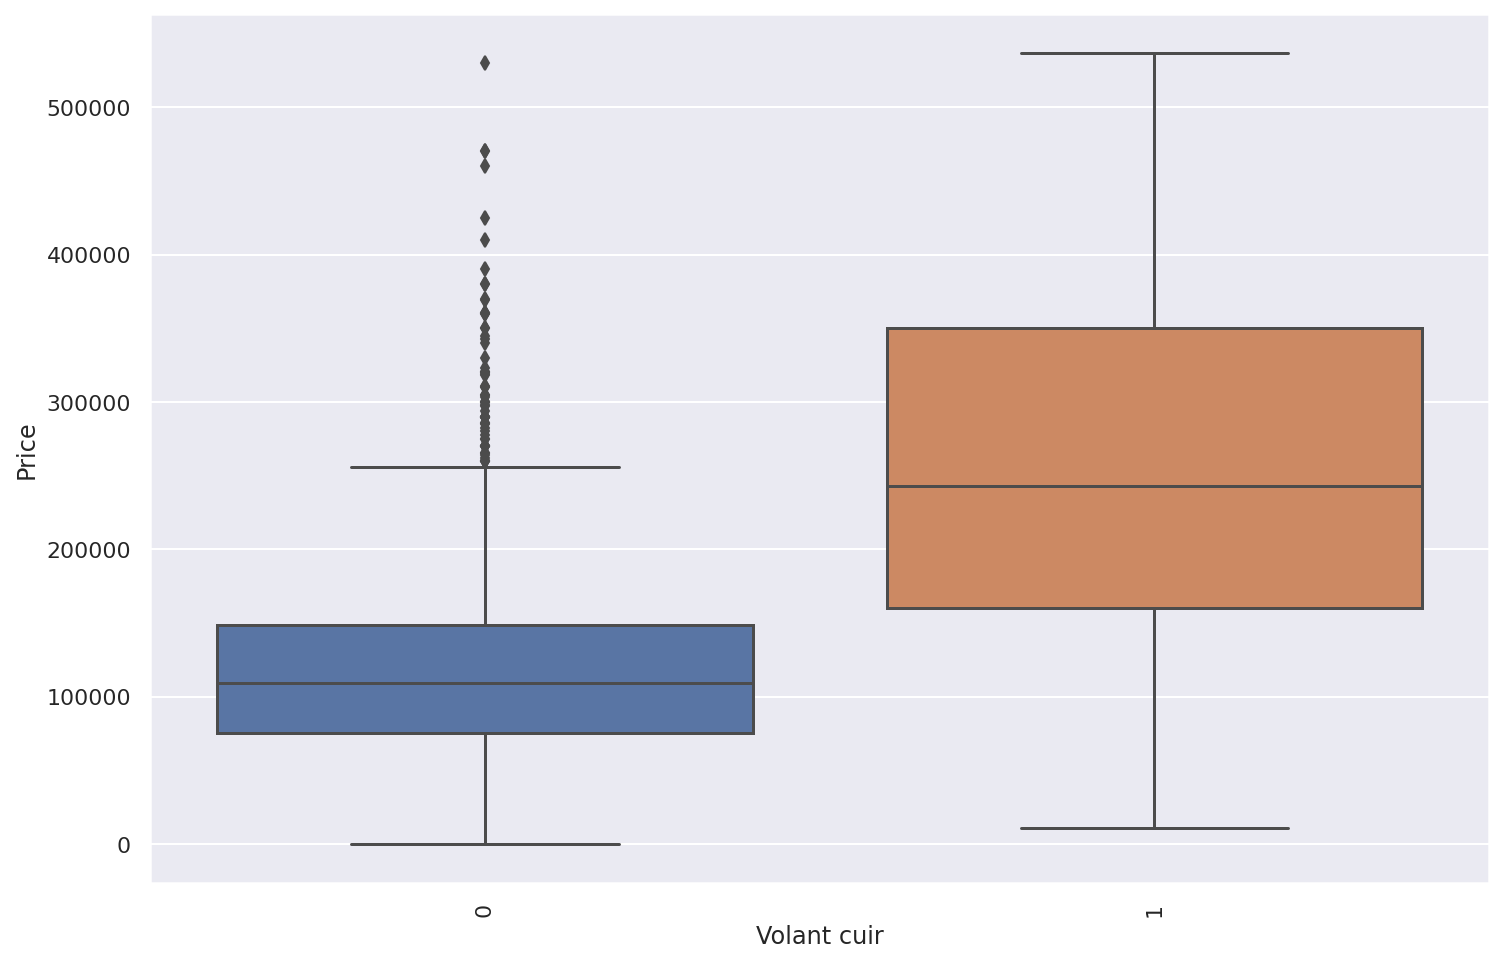

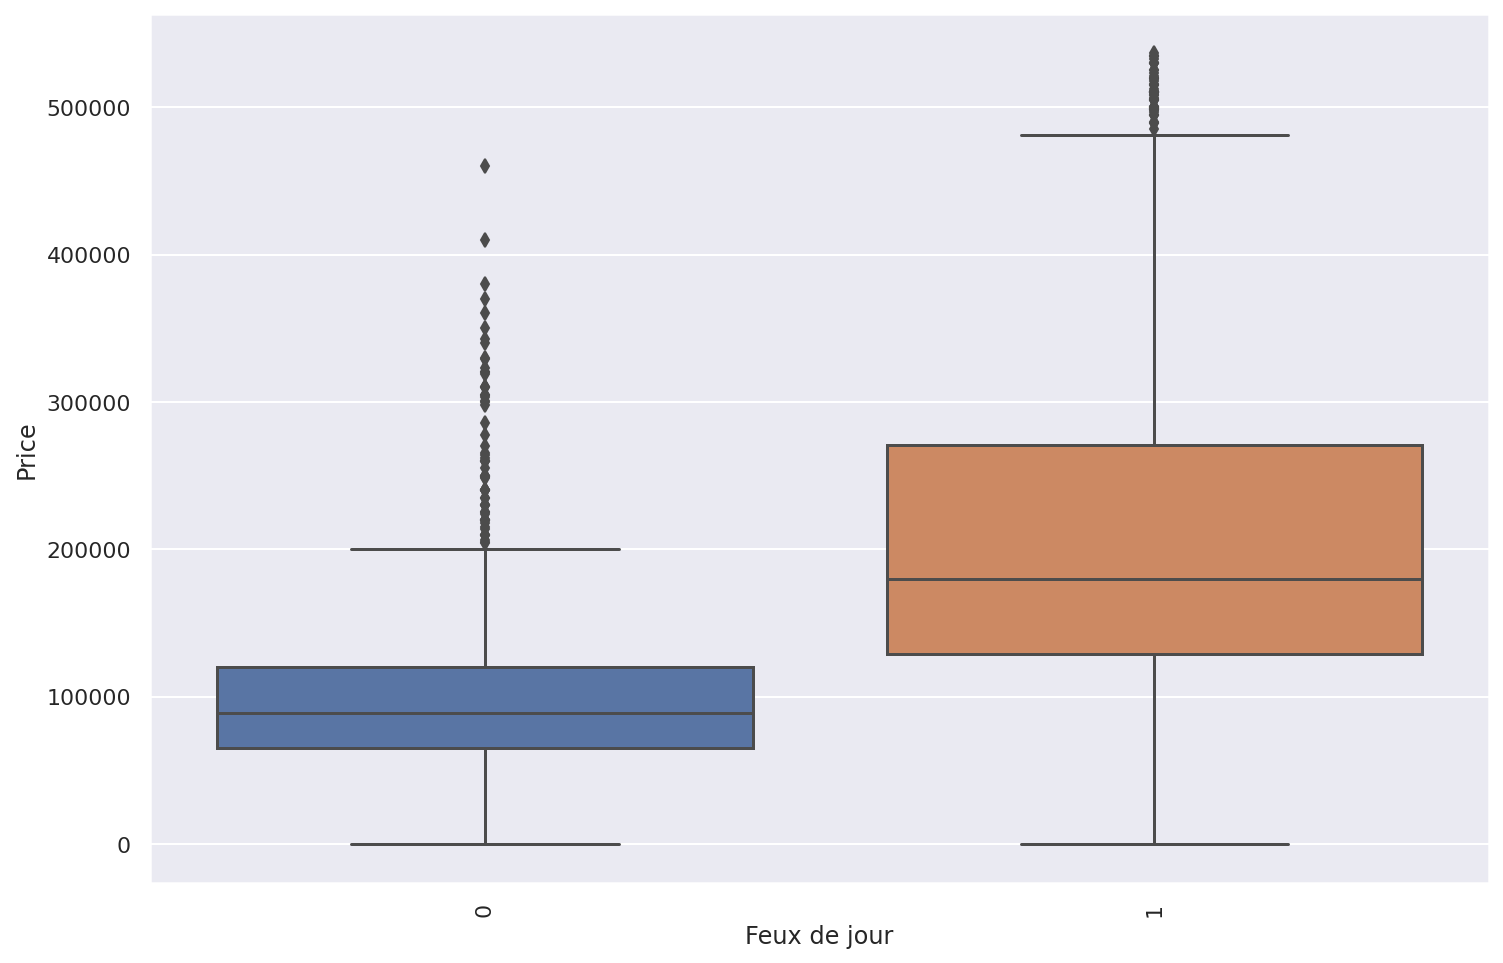

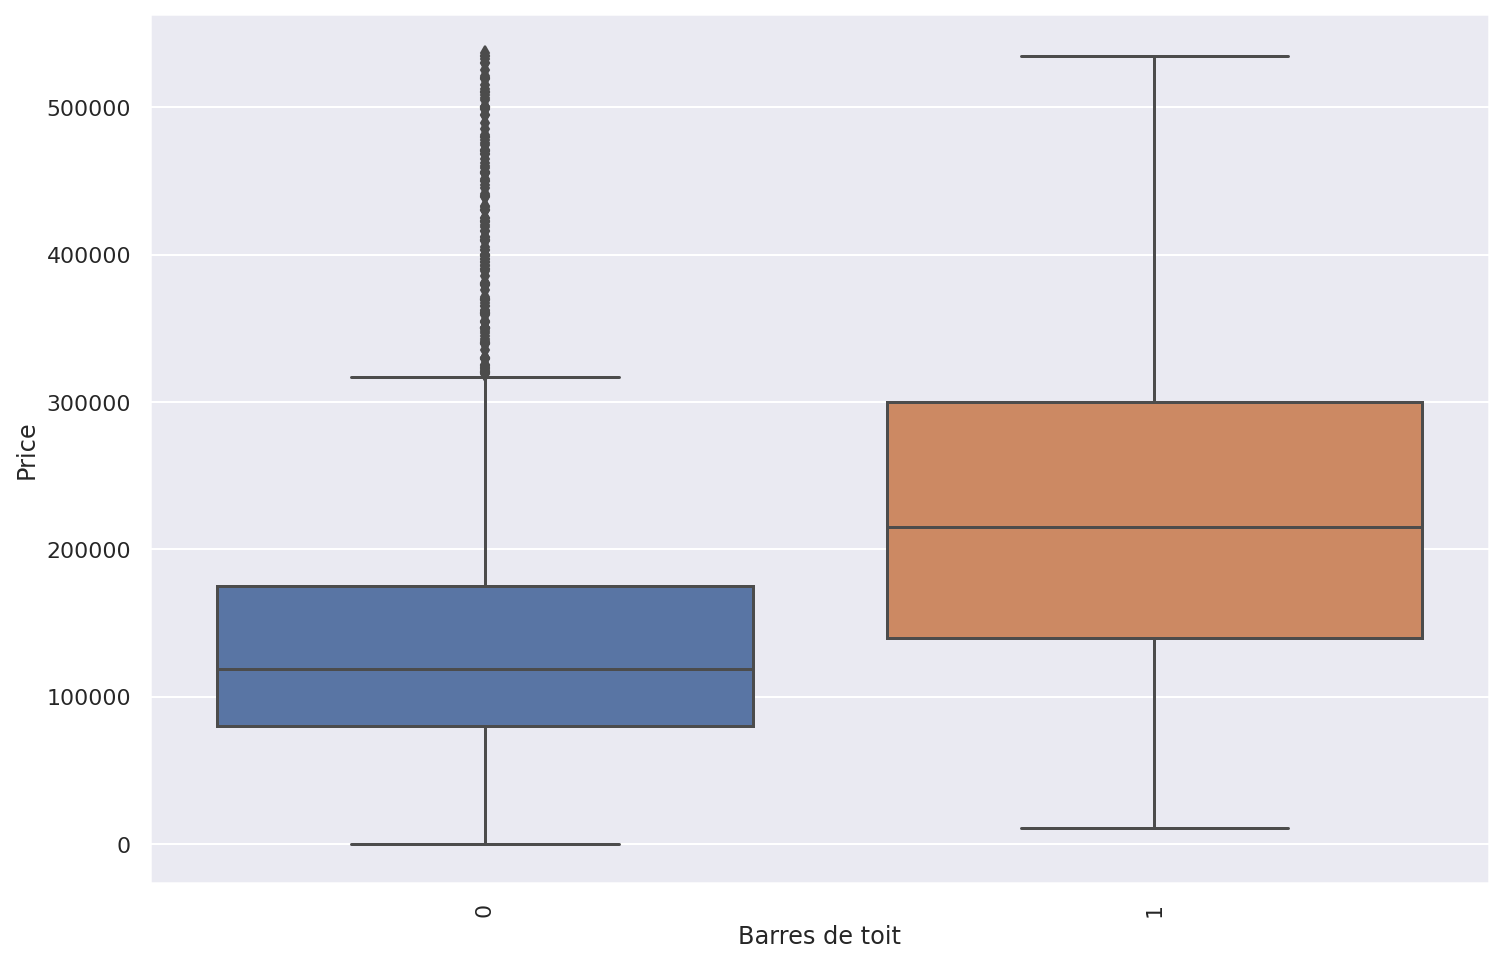

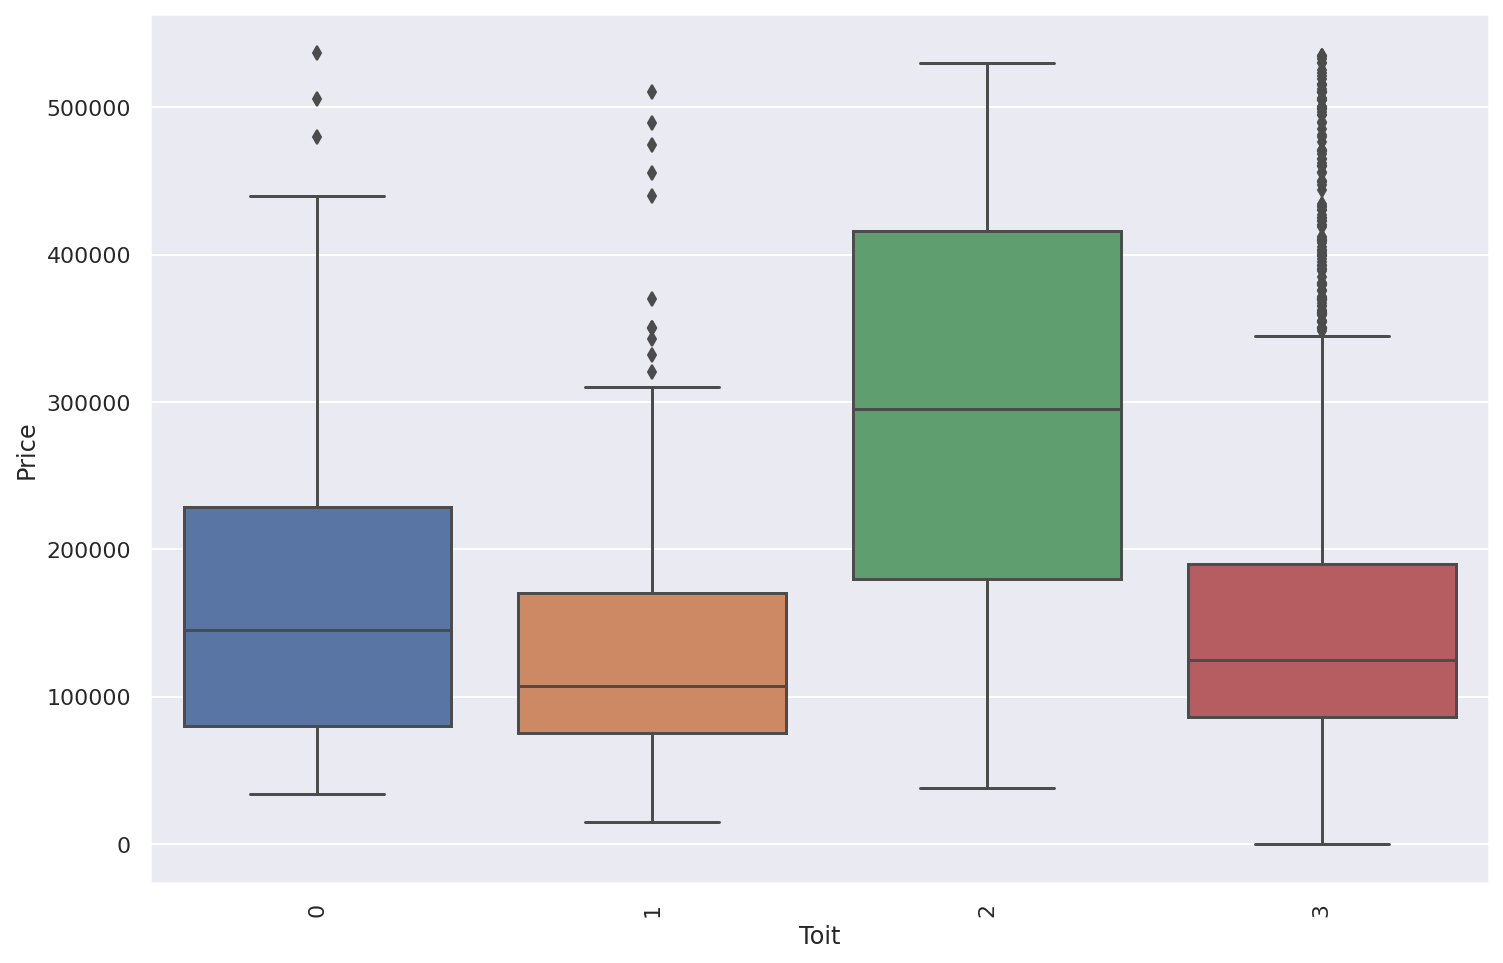

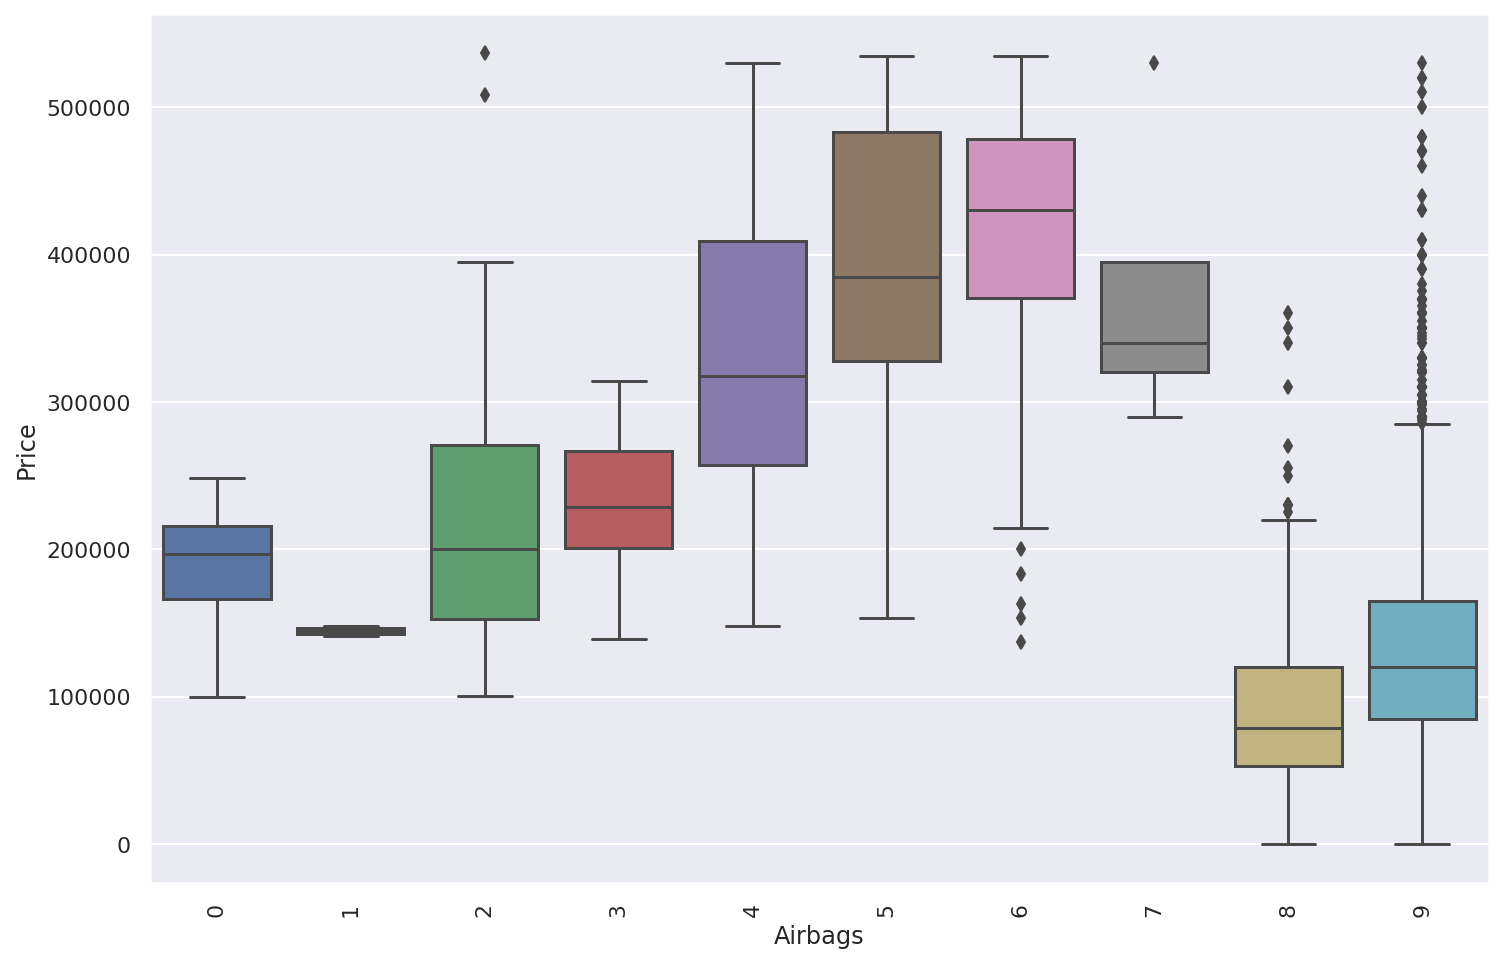

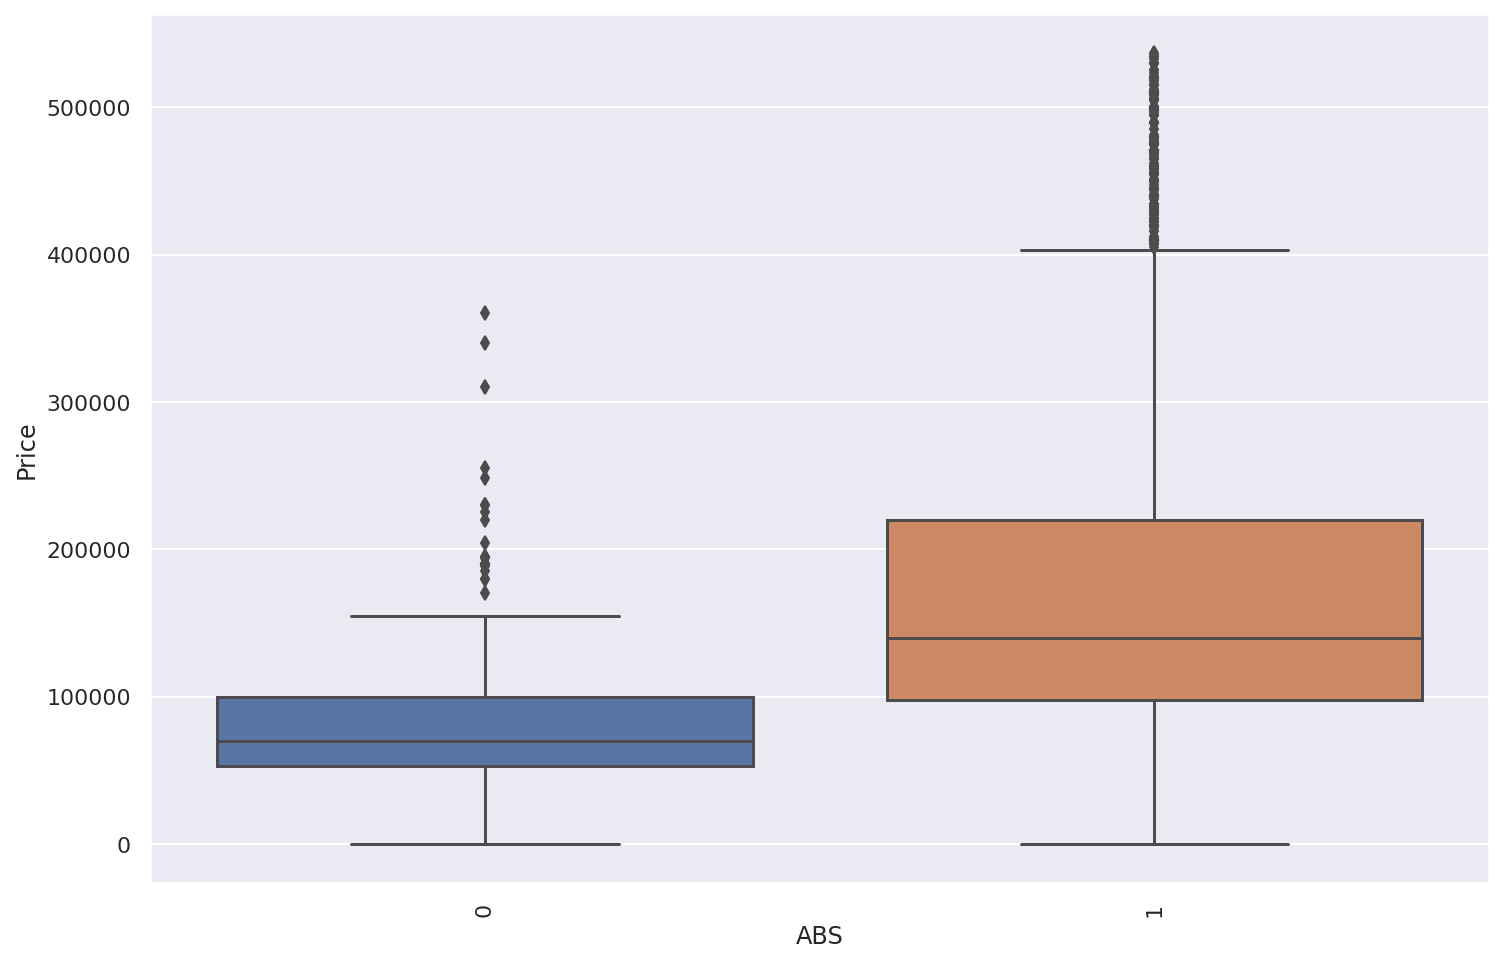

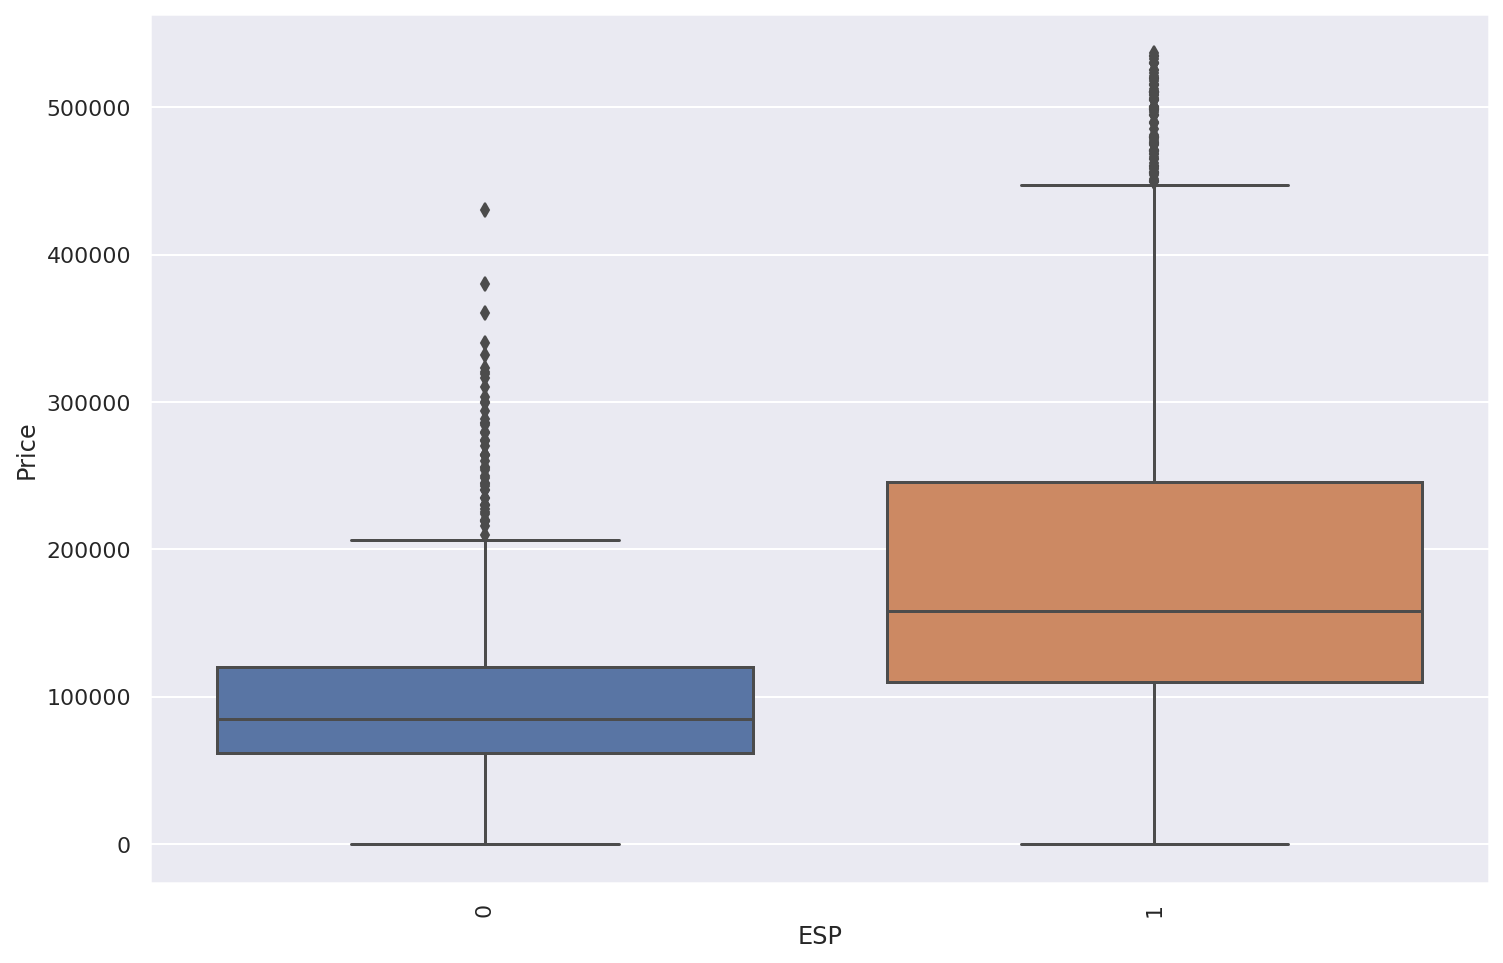

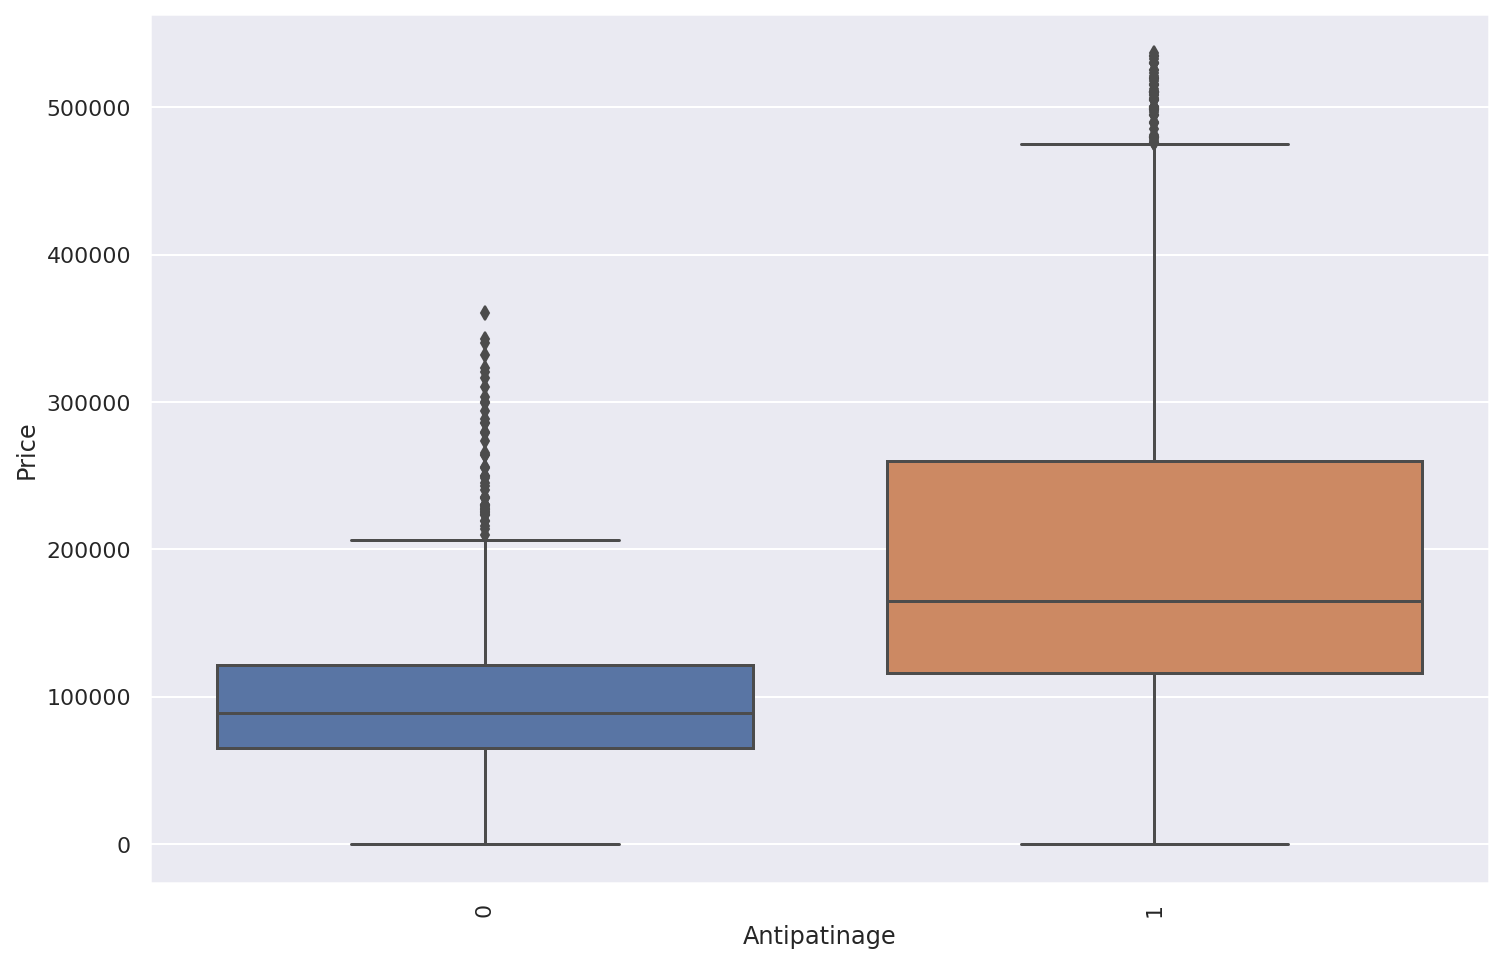

In [101]:
for feature in list(data.columns):
    if feature!="Price":
        sns.set(style='darkgrid')
        plt.figure(figsize=(12,8))
        sns.boxplot(x=feature, y='Price', data=data)
        plt.xticks(rotation=90)

### Matrice de correlation 

Text(0.5, 1.0, 'Matrice de correlation ')

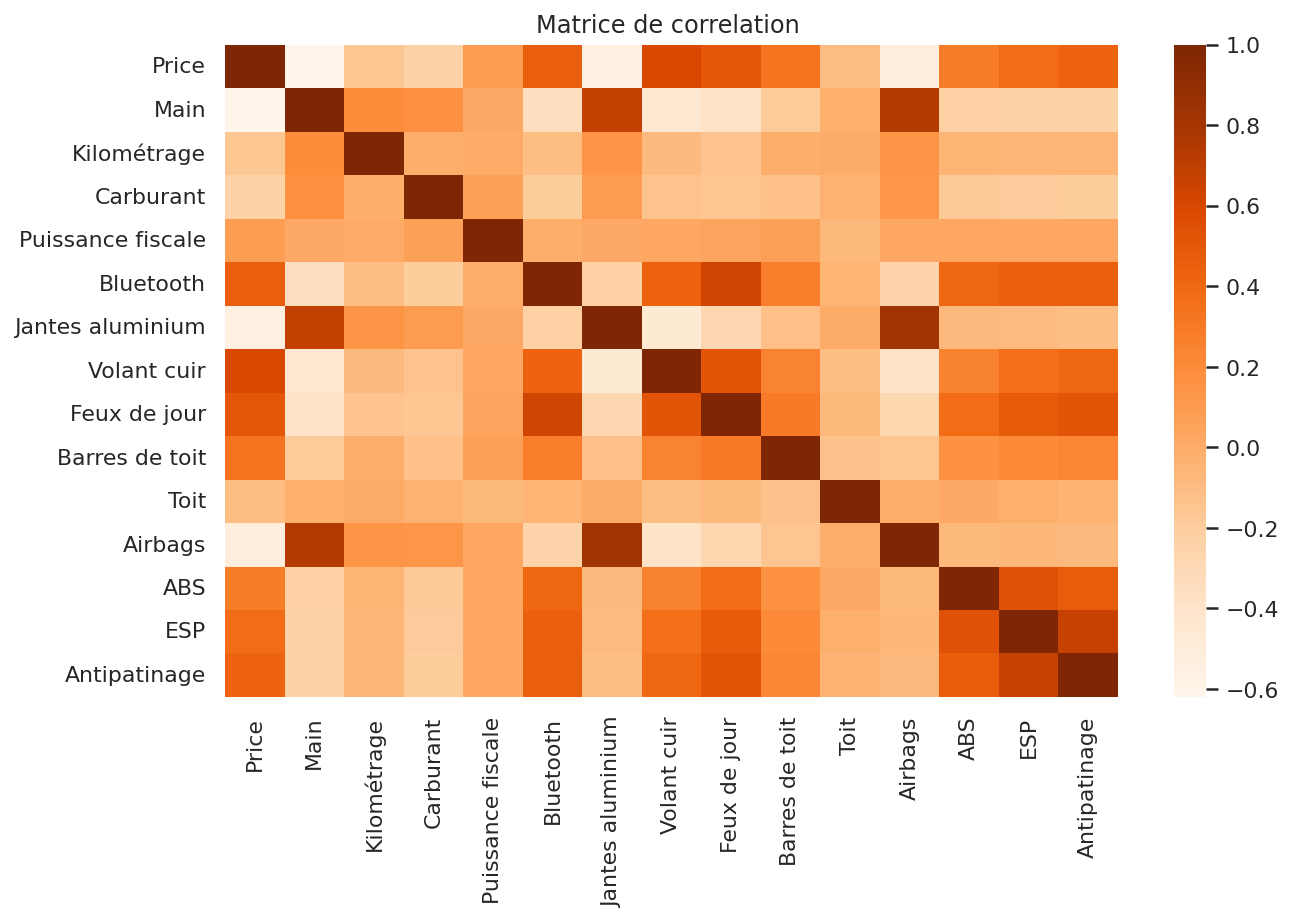

In [102]:
corr = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='Oranges').set_title('Matrice de correlation ')

La matrice de corrélation nous montre le degré de corrélation entre différentes variables numériques. Selon cette matrice, les zones de couleur plus foncée (par exemple, orange) indiquent une corrélation plus forte, tandis que les zones de couleur plus claire (par exemple, jaune) indiquent une corrélation plus faible.

En analysant cette matrice, on peut conclure que :
- Il y a une corrélation négative entre le kilométrage et les prix, ce qui est logique car les voitures plus anciennes ont tendance à être moins chères en raison de l'usure.
- Tous les attributs ont un impact sur le prix, bien que cette relation puisse être plus ou moins forte selon l'attribut considéré


## Price predection

Dans cette partie nous allons essayer de predire les prix des voiture en utilisans 3 modeles de machine learning et dans la fin nous allons comparer entre eux pour conclure le modele qui fait le meilleur prediction possible 

### Les imporations néccessaires

In [85]:
# import required modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

### Préparation des données 

#### Le mapping des données

In [86]:
columns_mapped = ['Bluetooth',  'Jantes aluminium', 'Volant cuir', 'Feux de jour', 'Barres de toit', 'Toit', 'Airbags', 'ABS', 'ESP', 'Antipatinage', 'Main', 'Carburant']

In [87]:
# Instantation d'objet encoder
encoder = LabelEncoder()
# Parcourir les colonnes à encoder et appliquer l'encodage par étiquette.
for col in columns_mapped:
    data[col] = encoder.fit_transform(data[col])

In [88]:
data

Brand           Model        Version     Price     Modèle  Main  \
0     MERCEDES   Classe C 2014          220 d  228000.0 2014-01-01     2   
1     MERCEDES   Classe C 2003        220 CDI   79000.0 2003-01-01     2   
2     MERCEDES   Classe B 2013    180 d Urban  150000.0 2013-01-01     2   
3     MERCEDES   Classe E 2006  Autre version  135000.0 2006-01-01     2   
4     MERCEDES  CLA Coupé 2014        220 CDI  240000.0 2014-01-01     2   
...        ...             ...            ...       ...        ...   ...   
3114     VOLVO            XC40  Autre version  350000.0 2022-01-01     0   
3115     VOLVO            XC40  Autre version  410000.0 2022-01-01     0   
3116     VOLVO            XC40  Autre version  410000.0 2022-01-01     0   
3117     VOLVO            XC40  Autre version  530000.0 2022-01-01     0   
3120     VOLVO            XC60  Autre version  499000.0 2022-01-01     0   

      Kilométrage  Carburant  Puissance fiscale Couleur extérieure  ...  \
0        144500.0          0                8.0         Gris foncé  ...   
1        350000.0          0                8.0               Noir  ...   
2        144000.0          0                8.0               Noir  ...   
3        248000.0          0                9.0         Gris clair  ...   
4        103000.0          0                9.0        Blanc cassé  ...   
...           ...        ...                ...                ...  ...   
3114          0.0          0                6.0               Noir  ...   
3115          0.0          0                8.0               Noir  ...   
3116          0.0          0                8.0               Noir  ...   
3117          0.0          0                8.0               Noir  ...   
3120          0.0          0                8.0               Noir  ...   

     Bluetooth Jantes aluminium Volant cuir Feux de jour Barres de toit Toit  \
0            1                8           1            1              0    3   
1            1                8           0            1              0    3   
2            1                8           1            1              0    3   
3            1                8           0            1              1    3   
4            1                8           0            1              0    1   
...        ...              ...         ...          ...            ...  ...   
3114         1                8           0            1              0    3   
3115         1                5           1            1              1    3   
3116         1                4           1            1              1    3   
3117         1                4           1            1              1    3   
3120         1                4           1            1              1    3   

     Airbags ABS ESP Antipatinage  
0          9   1   1            1  
1          9   1   1            1  
2          9   1   1            1  
3          9   1   1            1  
4          9   1   1            1  
...      ...  ..  ..          ...  
3114       9   1   1            1  
3115       5   1   1            1  
3116       5   1   1            1  
3117       5   1   1            1  
3120       5   1   1            1  

[2675 rows x 35 columns]

#### L'organisation des données

In [89]:
Y = data['Price']
# Stocker les colonnes 'Puissance fiscale' et 'Kilométrage' dans une variable X
X = data.loc[:, ['Puissance fiscale', 'Kilométrage','Bluetooth',  'Jantes aluminium', 'Volant cuir', 'Feux de jour', 'Barres de toit', 'Toit', 'Airbags', 'ABS', 'ESP', 'Antipatinage', 'Main', 'Carburant']]

In [90]:
# Base d'entrainement et test
# on divise notre  data au test et d'entrainement 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=0)

#### Modele 1: Regression liniaire

La régression linéaire est une méthode statistique qui permet d'analyser la relation entre deux variables continues. 

Dans notre contexte, nous nous intéressons seulement aux variables continues telles que le kilométrage et la puissance fiscale, bien que d'autres variables puissent également influencer le prix des voitures. Afin de résoudre ce problème, nous allons transformer certaines variables en valeurs numériques en utilisant une méthode de mappage. Les colonnes suivantes seront donc mappées:


In [91]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [92]:
y_predicted=regr.predict(X_test)

In [93]:
r2_score = regr.score(X_test,y_test)
print(r2_score*100,'%')

62.464726608848096 %


- Un score R au carré plus élevé indique un meilleur ajustement entre le modèle et les données, mais cela ne signifie pas nécessairement que le modèle est le meilleur ajustement possible. Un score R-carré faible peut signifier que le modèle n'est pas adapté aux données.

In [94]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_predicted))
print(math.sqrt(mean_squared_error(y_test, y_predicted)))

4183338953.1692014
64678.73648401924


Lorsque le RMSE (racine carrée de l'erreur quadratique moyenne) est plus petit, cela indique que le modèle a une meilleure performance, car il est capable de faire des prédictions plus précises avec des différences plus petites entre les valeurs prédites et réelles. Dans notre cas, le RMSE n'est pas petit, ce qui suggère que le modèle ne s'adapte peut-être pas bien à notre jeu de données.



#### Modéle 2 : Ridge Regression 

- Ridge Regression: est une méthode de régression linéaire régularisée qui a été développée pour faire face au problème de la multicollinéarité dans les données de régression.

- La multicollinéarité se produit lorsque les variables prédictives (ou indépendantes) dans un modèle de régression sont fortement corrélées les unes aux autres. Cela peut rendre difficile l'estimation des coefficients de régression, car des variations mineures dans les données peuvent entraîner des estimations de coefficients instables ou non significatives.

- Ridge Regression ajoute une pénalité (ou régularisation) à la fonction de coût de la régression linéaire ordinaire. La pénalité correspond à la somme des carrés des coefficients de régression (sauf l'intercept). Cette pénalité réduit la valeur des coefficients de régression, réduisant ainsi la variance des estimations. Cette technique peut améliorer la performance de la régression linéaire en présence de multicollinéarité, tout en minimisant l'erreur de prédiction.



In [95]:
from sklearn.linear_model import Ridge
#Create a ridge regressor object
ridge = Ridge(alpha=0.5)
#Train the model
ridge.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training):{:.3f}'.
format(ridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(ridge.score(X_test, y_test)))

R-squared score (training):0.603
R-squared score (test): 0.625


In [96]:
r2_score = ridge.score(X_test,y_test)
print(r2_score*100,'%')

62.46729420248247 %


#### Modéle 3 : Gradient Boosting Regressor model 

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
#Create a GradientBoostingRegressor object
params = {'n_estimators': 600, 'max_depth': 5,'learning_rate': 0.03, 'loss': 'huber'}
gbr = GradientBoostingRegressor(**params)
#Train the model
gbr.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training): {:.3f}'
.format(gbr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(gbr.score(X_test, y_test)))

R-squared score (training): 0.897
R-squared score (test): 0.787


In [100]:
r2_score = gbr.score(X_test,y_test)
print(r2_score*100,'%')

78.69121679198938 %


 Un score de 78.7% est elevé par rapport aux modéles précedents, donc on peut se baser sur ce modele pour entrainer notre dataset.